<a href="https://colab.research.google.com/github/GreNinja47/Advanced-Regression/blob/main/Advanced_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Problem Statement :

- Surprise Housing, a US company, is expanding to Australia. They employ data analytics to uncover undervalued houses for profitable resale. A regression model is crucial for precise property value predictions, aiding investment decisions when properties are undervalued to market price.

Objective :

- The dataset comprises of 1460 records with 81 features. The objective of this project is to establish a foundation for showcasing both Parametric and Non-Parametric metric models without explicitly fine-tuning the models for  production level.

In [ ]:
## Read google drive file
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
# Importing the libraries

import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import scale
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score, KFold
from sklearn.tree import DecisionTreeRegressor

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import KFold, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler, OrdinalEncoder
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [ ]:
# import warnings
# warnings.filterwarnings("ignore")

In [ ]:
# Visibility towards 100 rows and columns

pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 200)

In [ ]:
# Reading the file

df = pd.read_csv("/content/gdrive/MyDrive/Files/DS/House_sale_data.csv")

In [ ]:
df.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd       None   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0         NaN   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd            

In [ ]:
df.shape

(1460, 81)

In [ ]:
# drop ID
df.drop(['Id'],axis=1, inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [ ]:
df.describe()

MSSubClass  LotFrontage        LotArea  OverallQual  OverallCond  \
count  1460.000000  1201.000000    1460.000000  1460.000000  1460.000000   
mean     56.897260    70.049958   10516.828082     6.099315     5.575342   
std      42.300571    24.284752    9981.264932     1.382997     1.112799   
min      20.000000    21.000000    1300.000000     1.000000     1.000000   
25%      20.000000    59.000000    7553.500000     5.000000     5.000000   
50%      50.000000    69.000000    9478.500000     6.000000     5.000000   
75%      70.000000    80.000000   11601.500000     7.000000     6.000000   
max     190.000000   313.000000  215245.000000    10.000000     9.000000   

         YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1   BsmtFinSF2  \
count  1460.000000   1460.000000  1452.000000  1460.000000  1460.000000   
mean   1971.267808   1984.865753   103.685262   443.639726    46.549315   
std      30.202904     20.645407   181.066207   456.098091   161.319273   
min    1872.000000   1950.000000     0.000000     0.000000     0.000000   
25%    1954.000000   1967.000000     0.000000     0.000000     0.000000   
50%    1973.000000   1994.000000     0.000000   383.500000     0.000000   
75%    2000.000000   2004.000000   166.000000   712.250000     0.000000   
max    2010.000000   2010.000000  1600.000000  5644.000000  1474.000000   

         BsmtUnfSF  TotalBsmtSF     1stFlrSF     2ndFlrSF  LowQualFinSF  \
count  1460.000000  1460.000000  1460.000000  1460.000000   1460.000000   
mean    567.240411  1057.429452  1162.626712   346.992466      5.844521   
std     441.866955   438.705324   386.587738   436.528436     48.623081   
min       0.000000     0.000000   334.000000     0.000000      0.000000   
25%     223.000000   795.750000   882.000000     0.000000      0.000000   
50%     477.500000   991.500000  1087.000000     0.000000      0.000000   
75%     808.000000  1298.250000  1391.250000   728.000000      0.000000   
max    2336.000000  6110.000000  4692.000000  2065.000000    572.000000   

         GrLivArea  BsmtFullBath  BsmtHalfBath     FullBath     HalfBath  \
count  1460.000000   1460.000000   1460.000000  1460.000000  1460.000000   
mean   1515.463699      0.425342      0.057534     1.565068     0.382877   
std     525.480383      0.518911      0.238753     0.550916     0.502885   
min     334.000000      0.000000      0.000000     0.000000     0.000000   
25%    1129.500000      0.000000      0.000000     1.000000     0.000000   
50%    1464.000000      0.000000      0.000000     2.000000     0.000000   
75%    1776.750000      1.000000      0.000000     2.000000     1.000000   
max    5642.000000      3.000000      2.000000     3.000000     2.000000   

       BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd   Fireplaces  GarageYrBlt  \
count   1460.000000   1460.000000   1460.000000  1460.000000  1379.000000   
mean       2.866438      1.046575      6.517808     0.613014  1978.506164   
std        0.815778      0.220338      1.625393     0.644666    24.689725   
min        0.000000      0.000000      2.000000     0.000000  1900.000000   
25%        2.000000      1.000000      5.000000     0.000000  1961.000000   
50%        3.000000      1.000000      6.000000     1.000000  1980.000000   
75%        3.000000      1.000000      7.000000     1.000000  2002.000000   
max        8.000000      3.000000     14.000000     3.000000  2010.000000   

        GarageCars   GarageArea   WoodDeckSF  OpenPorchSF  EnclosedPorch  \
count  1460.000000  1460.000000  1460.000000  1460.000000    1460.000000   
mean      1.767123   472.980137    94.244521    46.660274      21.954110   
std       0.747315   213.804841   125.338794    66.256028      61.119149   
min       0.000000     0.000000     0.000000     0.000000       0.000000   
25%       1.000000   334.500000     0.000000     0.000000       0.000000   
50%       2.000000   480.000000     0.000000    25.000000       0.000000   
75%       2.000000   576.000000   168.000000    68.000000   

Data Cleaning

1. Missing Value Imputation

In [ ]:
missing_percentage = (df.isna().sum() / len(df)) * 100
print(missing_percentage)

MSSubClass        0.000000
MSZoning          0.000000
LotFrontage      17.739726
LotArea           0.000000
Street            0.000000
Alley            93.767123
LotShape          0.000000
LandContour       0.000000
Utilities         0.000000
LotConfig         0.000000
LandSlope         0.000000
Neighborhood      0.000000
Condition1        0.000000
Condition2        0.000000
BldgType          0.000000
HouseStyle        0.000000
OverallQual       0.000000
OverallCond       0.000000
YearBuilt         0.000000
YearRemodAdd      0.000000
RoofStyle         0.000000
RoofMatl          0.000000
Exterior1st       0.000000
Exterior2nd       0.000000
MasVnrType        0.547945
MasVnrArea        0.547945
ExterQual         0.000000
ExterCond         0.000000
Foundation        0.000000
BsmtQual          2.534247
BsmtCond          2.534247
BsmtExposure      2.602740
BsmtFinType1      2.534247
BsmtFinSF1        0.000000
BsmtFinType2      2.602740
BsmtFinSF2        0.000000
BsmtUnfSF         0.000000
T

In [ ]:
# Dropping the features from main data that consists the missing records above 47%
dropped_columns = df[['MiscFeature', 'Fence', 'PoolQC', 'FireplaceQu', 'Alley']]
print(dropped_columns.head())

df.drop(columns = dropped_columns, axis=1, inplace=True)
df.head()

  MiscFeature Fence PoolQC FireplaceQu Alley
0         NaN   NaN    NaN         NaN   NaN
1         NaN   NaN    NaN          TA   NaN
2         NaN   NaN    NaN          TA   NaN
3         NaN   NaN    NaN          Gd   NaN
4         NaN   NaN    NaN          TA   NaN


MSSubClass MSZoning  LotFrontage  LotArea Street LotShape LandContour  \
0          60       RL         65.0     8450   Pave      Reg         Lvl   
1          20       RL         80.0     9600   Pave      Reg         Lvl   
2          60       RL         68.0    11250   Pave      IR1         Lvl   
3          70       RL         60.0     9550   Pave      IR1         Lvl   
4          60       RL         84.0    14260   Pave      IR1         Lvl   

  Utilities LotConfig LandSlope Neighborhood Condition1 Condition2 BldgType  \
0    AllPub    Inside       Gtl      CollgCr       Norm       Norm     1Fam   
1    AllPub       FR2       Gtl      Veenker      Feedr       Norm     1Fam   
2    AllPub    Inside       Gtl      CollgCr       Norm       Norm     1Fam   
3    AllPub    Corner       Gtl      Crawfor       Norm       Norm     1Fam   
4    AllPub       FR2       Gtl      NoRidge       Norm       Norm     1Fam   

  HouseStyle  OverallQual  OverallCond  YearBuilt  YearRemodAdd RoofStyle  \
0     2Story            7            5       2003          2003     Gable   
1     1Story            6            8       1976          1976     Gable   
2     2Story            7            5       2001          2002     Gable   
3     2Story            7            5       1915          1970     Gable   
4     2Story            8            5       2000          2000     Gable   

  RoofMatl Exterior1st Exterior2nd MasVnrType  MasVnrArea ExterQual ExterCond  \
0  CompShg     VinylSd     VinylSd    BrkFace       196.0        Gd        TA   
1  CompShg     MetalSd     MetalSd       None         0.0        TA        TA   
2  CompShg     VinylSd     VinylSd    BrkFace       162.0        Gd        TA   
3  CompShg     Wd Sdng     Wd Shng       None         0.0        TA        TA   
4  CompShg     VinylSd     VinylSd    BrkFace       350.0        Gd        TA   

  Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1  BsmtFinSF1  \
0      PConc       Gd       TA           No          GLQ         706   
1     CBlock       Gd       TA           Gd          ALQ         978   
2      PConc       Gd       TA           Mn          GLQ         486   
3     BrkTil       TA       Gd           No          ALQ         216   
4      PConc       Gd       TA           Av          GLQ         655   

  BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF Heating HeatingQC  \
0          Unf           0        150          856    GasA        Ex   
1          Unf           0        284         1262    GasA        Ex   
2          Unf           0        434          920    GasA        Ex   
3          Unf           0        540          756    GasA        Gd   
4          Unf           0        490         1145    GasA        Ex   

  CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  \
0          Y      SBrkr       856       854             0       1710   
1          Y      SBrkr      1262         0             0       1262   
2          Y      SBrkr       920       866             0       1786   
3          Y      SBrkr       961       756             0       1717   
4          Y      SBrkr      1145      1053             0       2198   

   BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  \
0             1             0         2         1             3             1   
1             0             1         2         0             3             1   
2             1             0         2         1             3             1   
3             1             0         1         0             3             1   
4             1             0         2         1             4             1   

  KitchenQual  TotRmsAbvGrd Functional  Fireplaces GarageType  GarageYrBlt  \
0          Gd             8        Typ           0     Attchd       2003.0   
1          TA             6        Typ           1     Attchd       1976.0   
2          Gd             6        Typ           1     Attchd       2001.0   
3          Gd          

In [ ]:
missing_percentage = (df.isna().sum() / len(df)) * 100
descending = missing_percentage.sort_values(ascending=False)

# Get columns where the percentage of missing values is greater than 0
columns_with_missing_values = descending[descending > 0]
columns_with_missing_values

LotFrontage     17.739726
GarageType       5.547945
GarageYrBlt      5.547945
GarageFinish     5.547945
GarageQual       5.547945
GarageCond       5.547945
BsmtFinType2     2.602740
BsmtExposure     2.602740
BsmtQual         2.534247
BsmtCond         2.534247
BsmtFinType1     2.534247
MasVnrArea       0.547945
MasVnrType       0.547945
Electrical       0.068493
dtype: float64

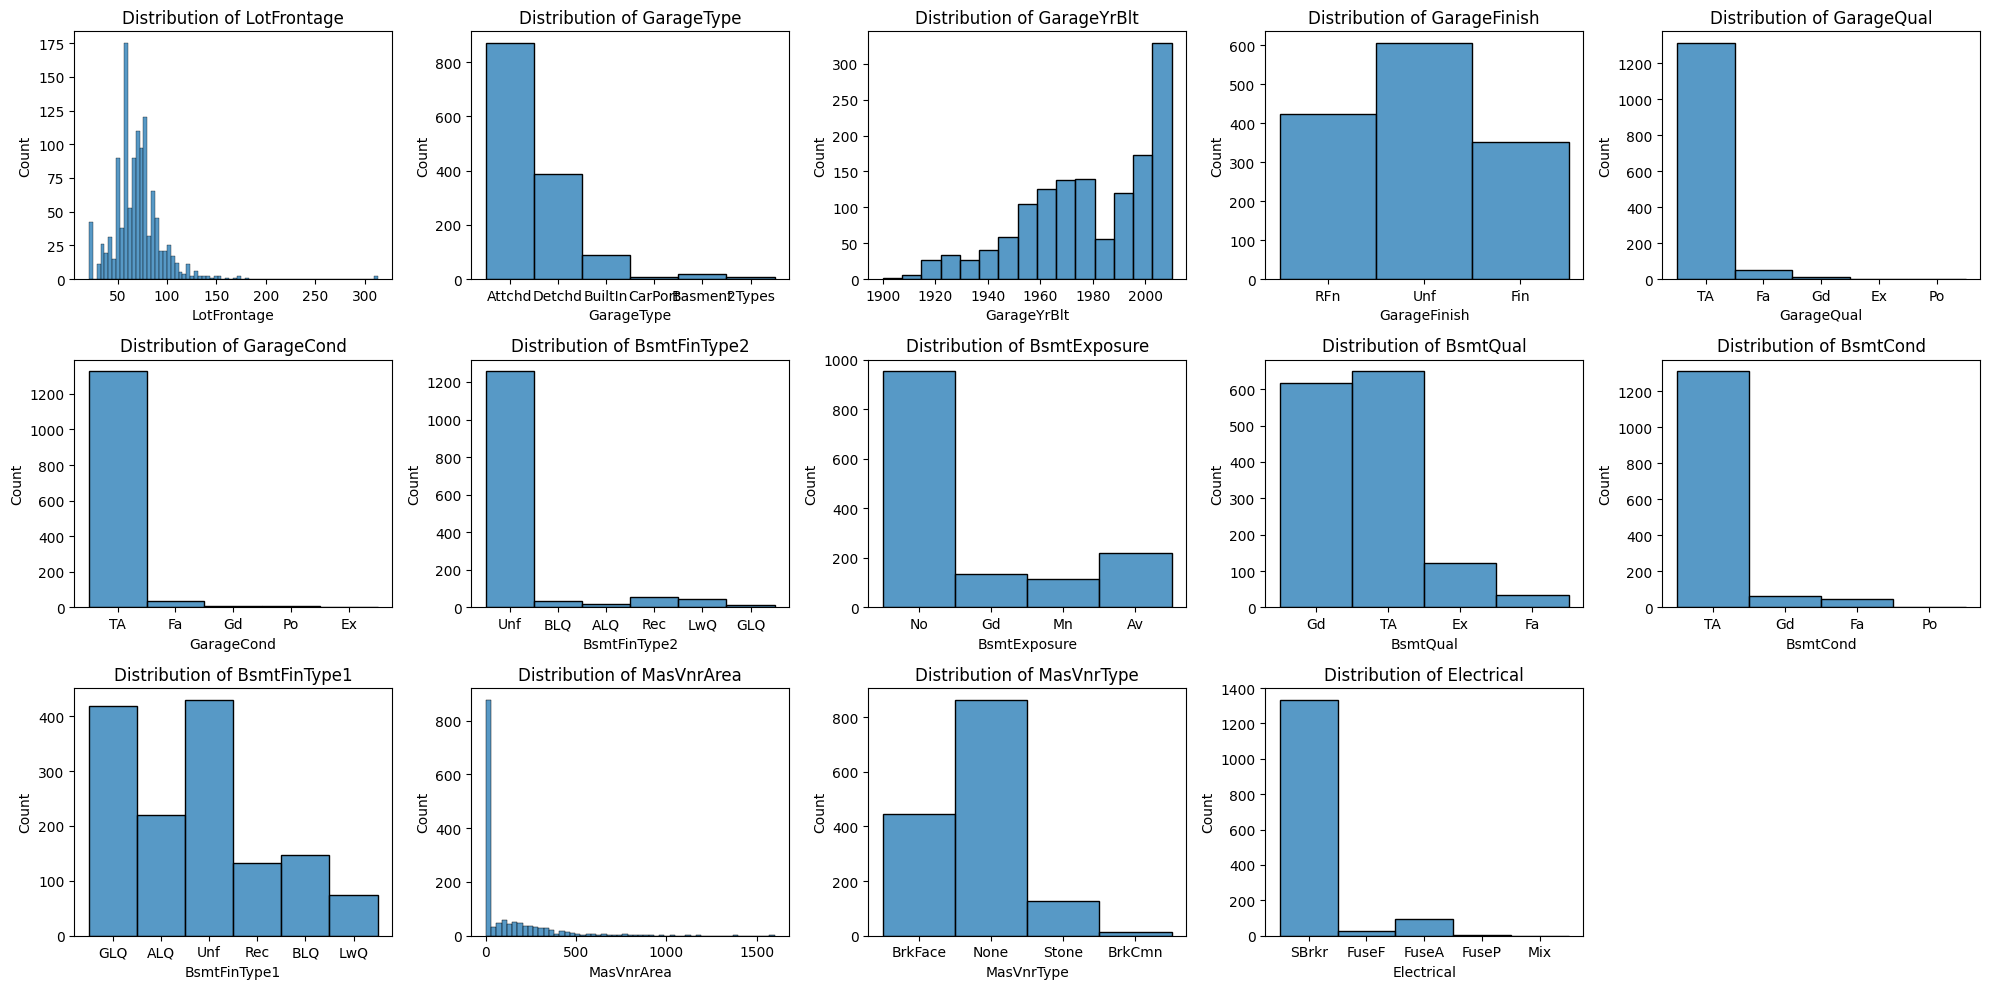

In [ ]:
# Determine the number of rows and columns for the grid
num_rows = 3
num_cols = 5

# Calculate the total number of plots
total_plots = num_rows * num_cols

# Ensure that the number of columns matches the number of columns with missing values
if len(columns_with_missing_values) < total_plots:
    num_cols = (len(columns_with_missing_values) + num_rows - 1) // num_rows

# Set the figure size
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(20, 10))

# Create distribution plots for columns with missing values
for i, column in enumerate(columns_with_missing_values.index):
    row = i // num_cols
    col = i % num_cols
    sns.histplot(df[column], ax=axes[row, col])
    axes[row, col].set_title(f'Distribution of {column}')
    axes[row, col].set_xlabel(column)

# Hide any unused subplots
for i in range(len(columns_with_missing_values), total_plots):
    row = i // num_cols
    col = i % num_cols
    fig.delaxes(axes[row, col])

plt.tight_layout()
plt.show()

In [ ]:
df_miss_cat = df[['GarageType', 'GarageCond','GarageFinish', 'GarageQual', 'BsmtFinType2', 'BsmtExposure','BsmtFinType1', 'BsmtCond', 'BsmtQual', 'MasVnrType','Electrical']]
df_miss_cat.describe()

GarageType GarageCond GarageFinish GarageQual BsmtFinType2  \
count        1379       1379         1379       1379         1422   
unique          6          5            3          5            6   
top        Attchd         TA          Unf         TA          Unf   
freq          870       1326          605       1311         1256   

       BsmtExposure BsmtFinType1 BsmtCond BsmtQual MasVnrType Electrical  
count          1422         1423     1423     1423       1452       1459  
unique            4            6        4        4          4          5  
top              No          Unf       TA       TA       None      SBrkr  
freq            953          430     1311      649        864       1334

In [ ]:
# Iterate over columns with missing values
for column in df_miss_cat:
    # Calculate mode
    mode_value = df[column].mode()[0]
    # Fill missing values with mode
    df[column].fillna(mode_value, inplace=True)

Observation : Replacing the Categorical missing values with mode value

In [ ]:
missing_percentage = (df.isna().sum() / len(df)) * 100
descending = missing_percentage.sort_values(ascending=False)

# Get columns where the percentage of missing values is greater than 0
columns_with_missing_values = descending[descending > 0]
columns_with_missing_values

LotFrontage    17.739726
GarageYrBlt     5.547945
MasVnrArea      0.547945
dtype: float64

In [ ]:
# Checking the best values to imput the continuous features
mean_LotFrontage = df['LotFrontage'].mean()
mean_GarageYrBlt = df['GarageYrBlt'].mean()
mean_MasVnrArea = df['MasVnrArea'].mean()

median_LotFrontage = df['LotFrontage'].median()
median_GarageYrBlt = df['GarageYrBlt'].median()
median_MasVnrArea = df['MasVnrArea'].median()

In [ ]:
df['mean_LotFrontage'] = df['LotFrontage'].fillna(mean_LotFrontage)
df['mean_GarageYrBlt'] = df['GarageYrBlt'].fillna(mean_GarageYrBlt)
df['mean_MasVnrArea'] = df['MasVnrArea'].fillna(mean_MasVnrArea)

df['median_LotFrontage'] = df['LotFrontage'].fillna(median_LotFrontage)
df['median_GarageYrBlt'] = df['GarageYrBlt'].fillna(median_GarageYrBlt)
df['median_MasVnrArea'] = df['MasVnrArea'].fillna(median_MasVnrArea)

In [ ]:
print("Original LotFrontage variance: ",df['LotFrontage'].var())
print("Mean LotFrontage variance: ",df['mean_LotFrontage'].var())
print("Median LotFrontage variance: ",df['median_LotFrontage'].var())
print("")
print("Original LotFrontage variance: ",df['GarageYrBlt'].var())
print("Mean LotFrontage variance: ",df['mean_GarageYrBlt'].var())
print("Median LotFrontage variance: ",df['median_GarageYrBlt'].var())
print("")
print("Original LotFrontage variance: ",df['MasVnrArea'].var())
print("Mean LotFrontage variance: ",df['mean_MasVnrArea'].var())
print("Median LotFrontage variance: ",df['median_MasVnrArea'].var())

Original LotFrontage variance:  589.7491687482653
Mean LotFrontage variance:  485.05757539267887
Median LotFrontage variance:  485.21855793515925

Original LotFrontage variance:  609.5825091487385
Mean LotFrontage variance:  575.7400257758476
Median LotFrontage variance:  575.8570422601331

Original LotFrontage variance:  32784.9711678846
Mean LotFrontage variance:  32605.204362303324
Median LotFrontage variance:  32663.829315913506


Observation : Finding the values close to original values

1. Median LotFrontage
2. Median LotFrontage
3. Median LotFrontage

Visualization the imputing values

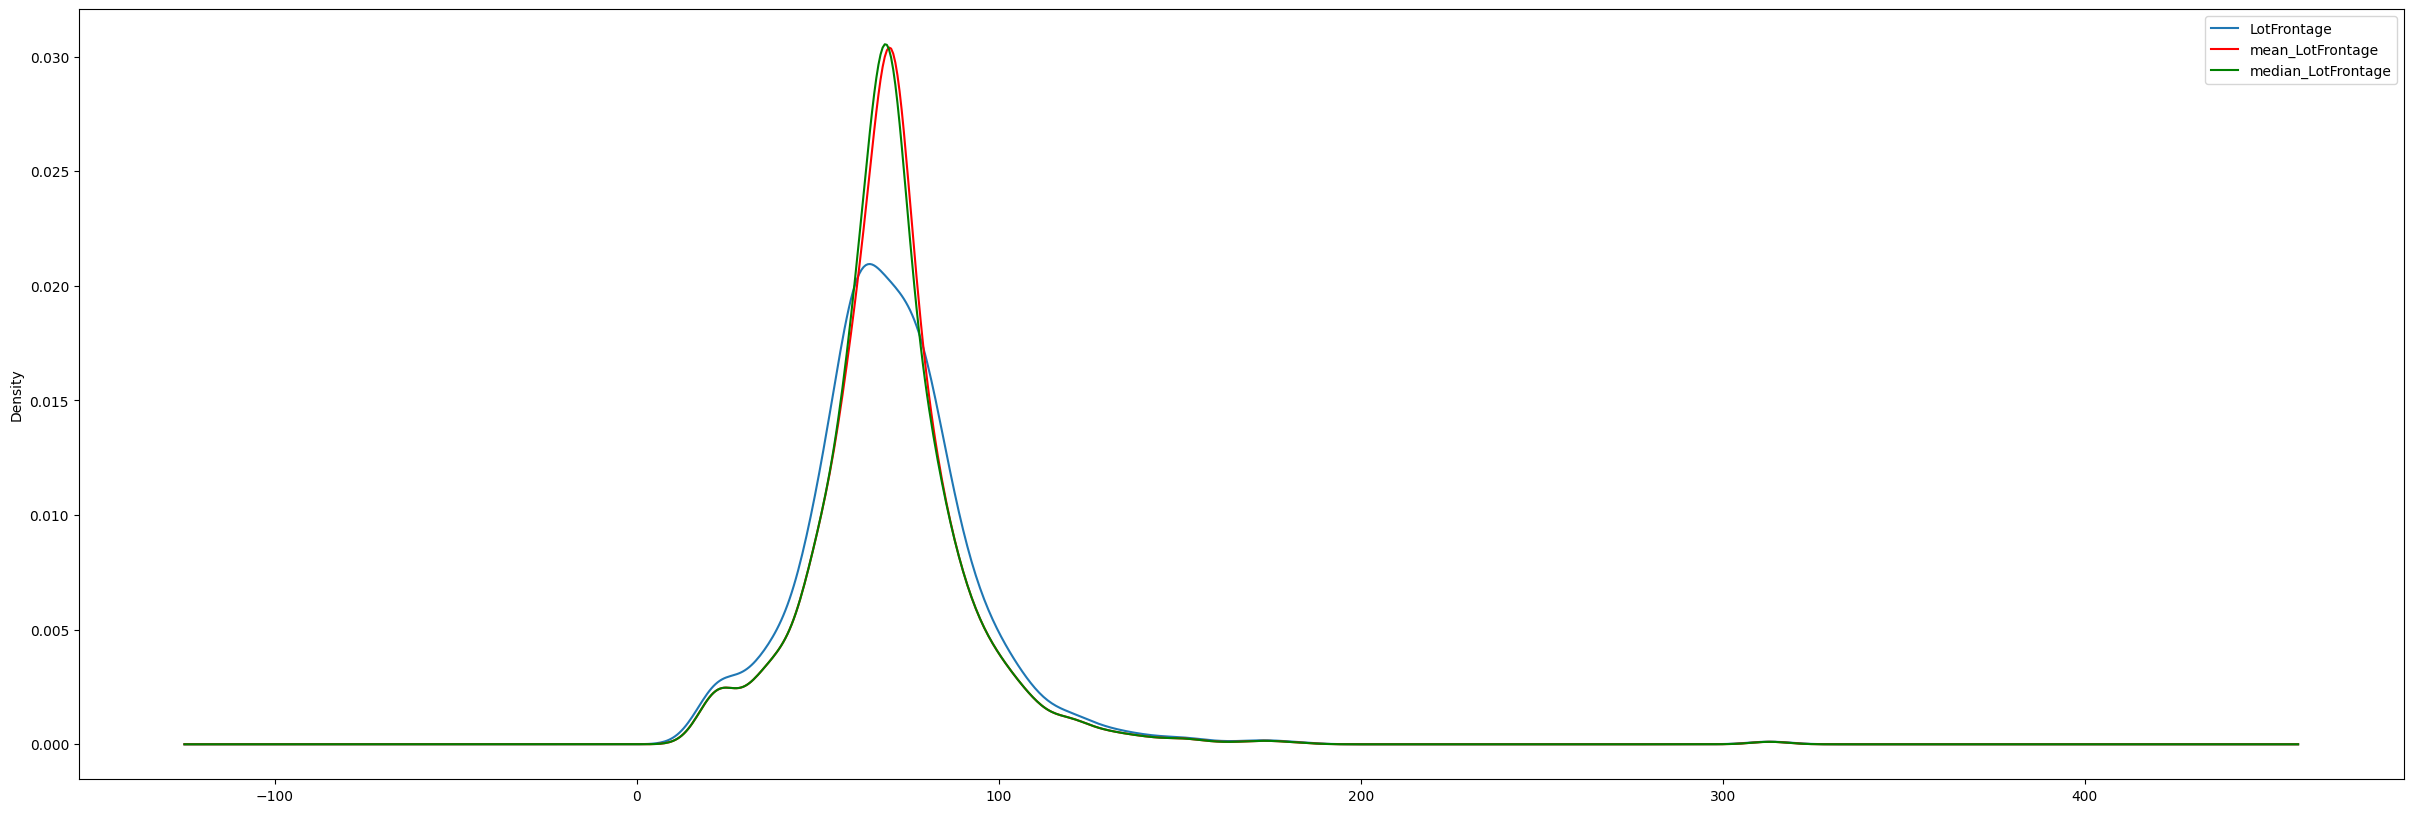

In [ ]:
fig = plt.figure(figsize=(30,10))
ax = fig.add_subplot(111)

df['LotFrontage'].plot(kind='kde', ax=ax)
df['mean_LotFrontage'].plot(kind='kde', ax=ax, color='red')
df['median_LotFrontage'].plot(kind='kde', ax=ax, color='green')

lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

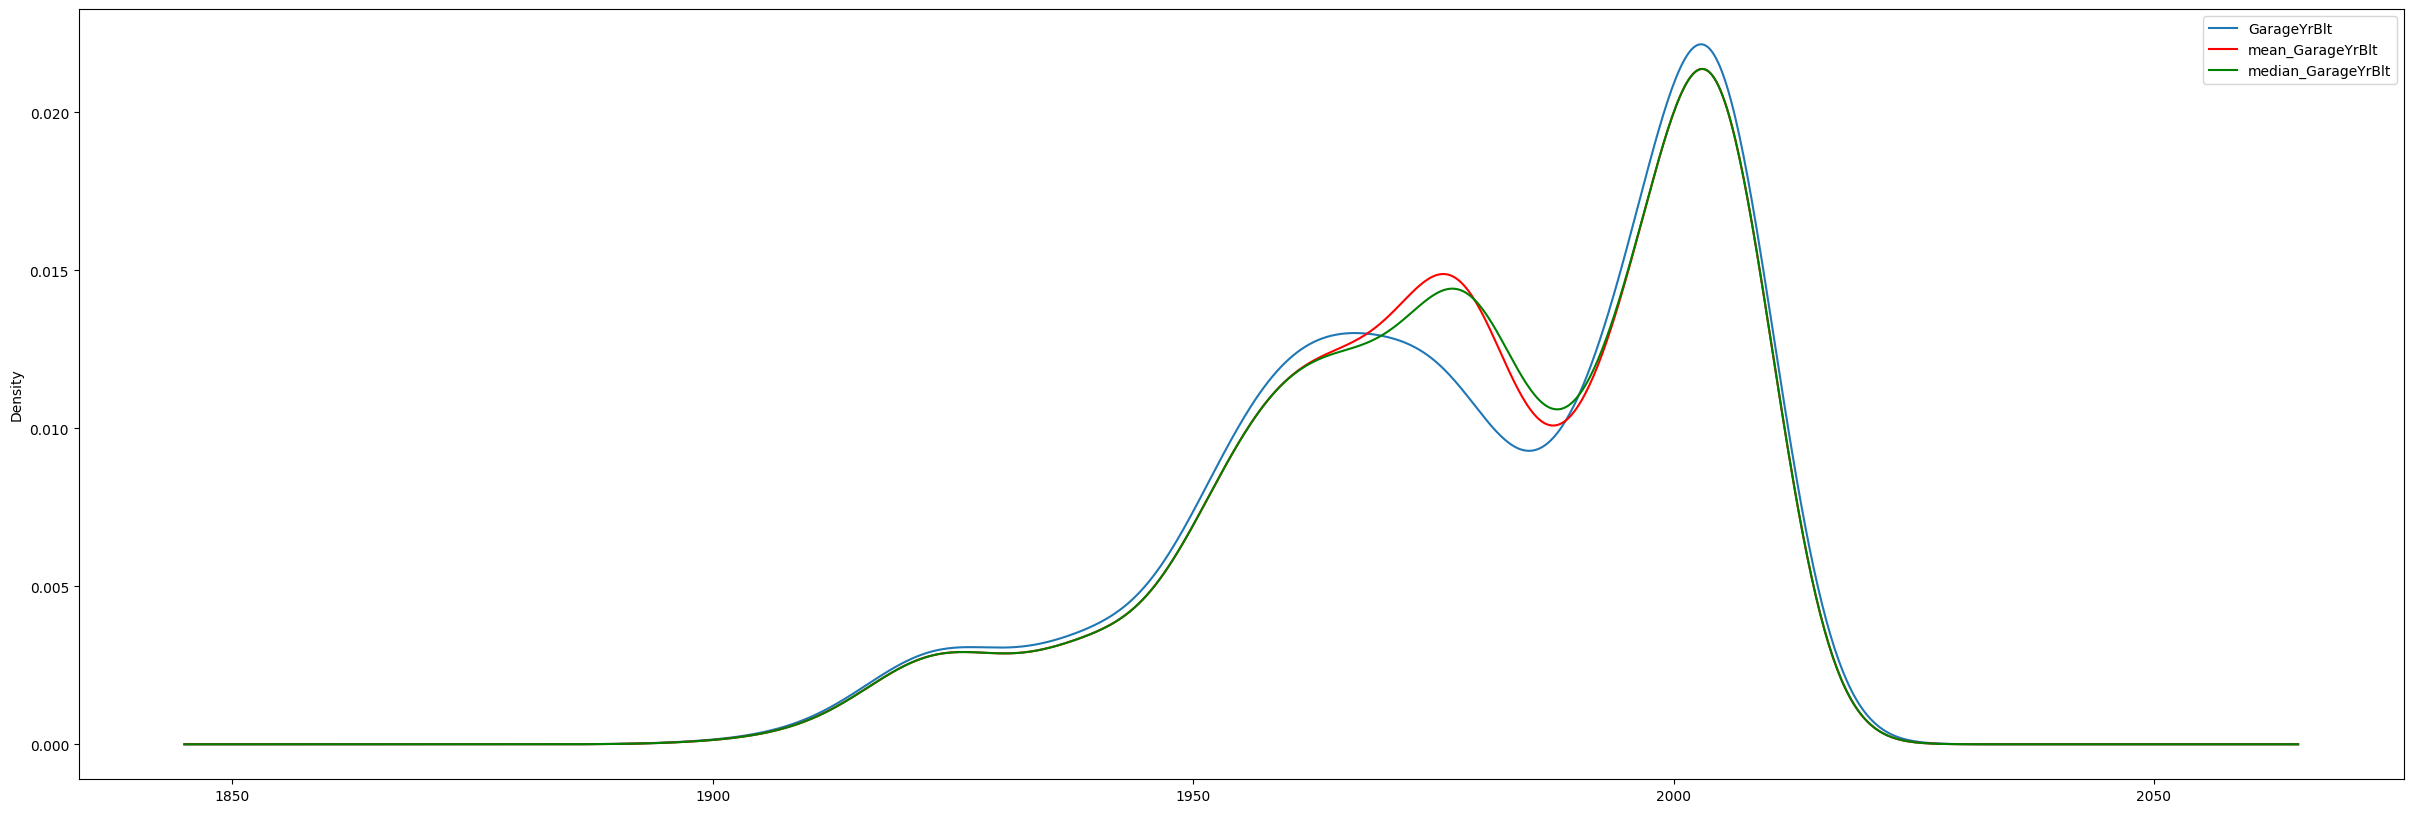

In [ ]:
fig = plt.figure(figsize=(30,10))
ax = fig.add_subplot(111)

df['GarageYrBlt'].plot(kind='kde', ax=ax)
df['mean_GarageYrBlt'].plot(kind='kde', ax=ax, color='red')
df['median_GarageYrBlt'].plot(kind='kde', ax=ax, color='green')

lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

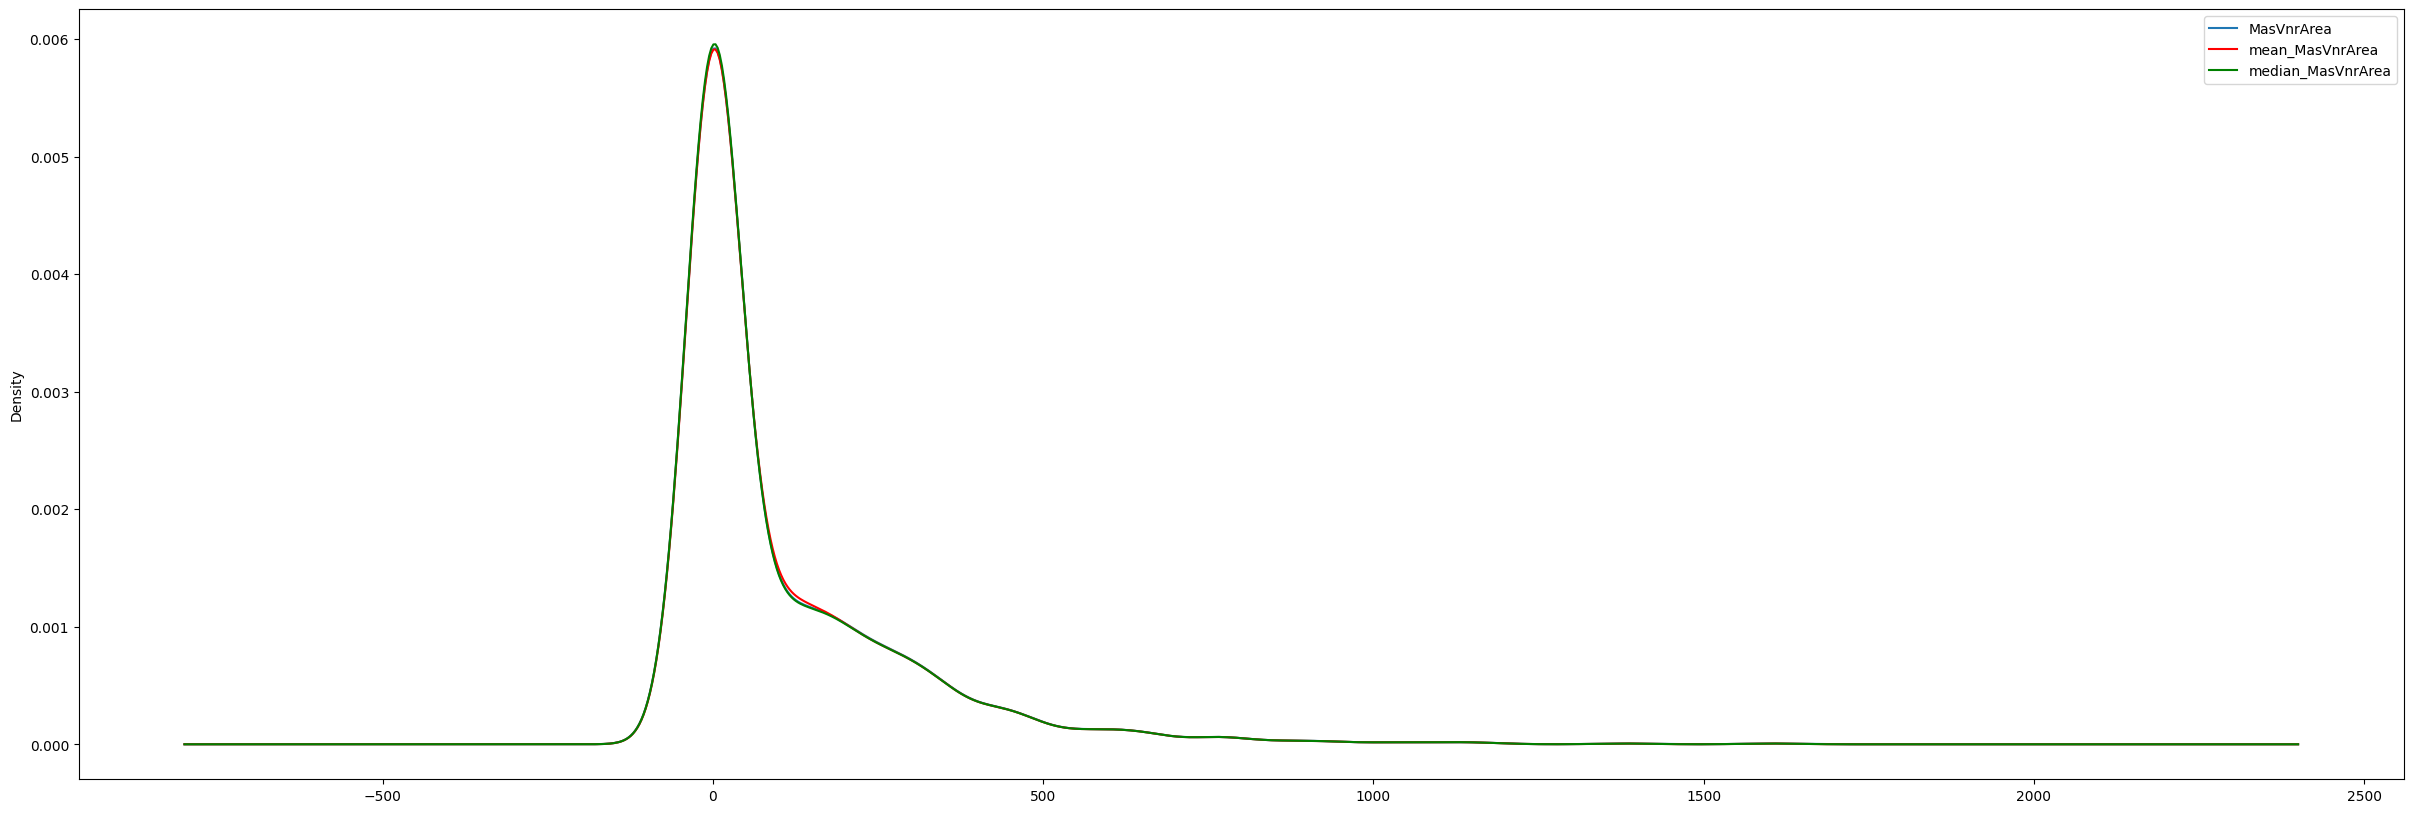

In [ ]:
fig = plt.figure(figsize=(30,10))
ax = fig.add_subplot(111)

df['MasVnrArea'].plot(kind='kde', ax=ax)
df['mean_MasVnrArea'].plot(kind='kde', ax=ax, color='red')
df['median_MasVnrArea'].plot(kind='kde', ax=ax, color='green')

lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

In [ ]:
# Dropping the unnecessary features

df.drop(['LotFrontage', 'mean_LotFrontage'], axis=1, inplace=True)
df.drop(['GarageYrBlt', 'mean_GarageYrBlt'], axis=1, inplace=True)
df.drop(['MasVnrArea', 'mean_MasVnrArea'], axis=1, inplace=True)

In [ ]:
df.isna().sum()

MSSubClass            0
MSZoning              0
LotArea               0
Street                0
LotShape              0
LandContour           0
Utilities             0
LotConfig             0
LandSlope             0
Neighborhood          0
Condition1            0
Condition2            0
BldgType              0
HouseStyle            0
OverallQual           0
OverallCond           0
YearBuilt             0
YearRemodAdd          0
RoofStyle             0
RoofMatl              0
Exterior1st           0
Exterior2nd           0
MasVnrType            0
ExterQual             0
ExterCond             0
Foundation            0
BsmtQual              0
BsmtCond              0
BsmtExposure          0
BsmtFinType1          0
BsmtFinSF1            0
BsmtFinType2          0
BsmtFinSF2            0
BsmtUnfSF             0
TotalBsmtSF           0
Heating               0
HeatingQC             0
CentralAir            0
Electrical            0
1stFlrSF              0
2ndFlrSF              0
LowQualFinSF    

In [ ]:
df.head()

MSSubClass MSZoning  LotArea Street LotShape LandContour Utilities  \
0          60       RL     8450   Pave      Reg         Lvl    AllPub   
1          20       RL     9600   Pave      Reg         Lvl    AllPub   
2          60       RL    11250   Pave      IR1         Lvl    AllPub   
3          70       RL     9550   Pave      IR1         Lvl    AllPub   
4          60       RL    14260   Pave      IR1         Lvl    AllPub   

  LotConfig LandSlope Neighborhood Condition1 Condition2 BldgType HouseStyle  \
0    Inside       Gtl      CollgCr       Norm       Norm     1Fam     2Story   
1       FR2       Gtl      Veenker      Feedr       Norm     1Fam     1Story   
2    Inside       Gtl      CollgCr       Norm       Norm     1Fam     2Story   
3    Corner       Gtl      Crawfor       Norm       Norm     1Fam     2Story   
4       FR2       Gtl      NoRidge       Norm       Norm     1Fam     2Story   

   OverallQual  OverallCond  YearBuilt  YearRemodAdd RoofStyle RoofMatl  \
0            7            5       2003          2003     Gable  CompShg   
1            6            8       1976          1976     Gable  CompShg   
2            7            5       2001          2002     Gable  CompShg   
3            7            5       1915          1970     Gable  CompShg   
4            8            5       2000          2000     Gable  CompShg   

  Exterior1st Exterior2nd MasVnrType ExterQual ExterCond Foundation BsmtQual  \
0     VinylSd     VinylSd    BrkFace        Gd        TA      PConc       Gd   
1     MetalSd     MetalSd       None        TA        TA     CBlock       Gd   
2     VinylSd     VinylSd    BrkFace        Gd        TA      PConc       Gd   
3     Wd Sdng     Wd Shng       None        TA        TA     BrkTil       TA   
4     VinylSd     VinylSd    BrkFace        Gd        TA      PConc       Gd   

  BsmtCond BsmtExposure BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  \
0       TA           No          GLQ         706          Unf           0   
1       TA           Gd          ALQ         978          Unf           0   
2       TA           Mn          GLQ         486          Unf           0   
3       Gd           No          ALQ         216          Unf           0   
4       TA           Av          GLQ         655          Unf           0   

   BsmtUnfSF  TotalBsmtSF Heating HeatingQC CentralAir Electrical  1stFlrSF  \
0        150          856    GasA        Ex          Y      SBrkr       856   
1        284         1262    GasA        Ex          Y      SBrkr      1262   
2        434          920    GasA        Ex          Y      SBrkr       920   
3        540          756    GasA        Gd          Y      SBrkr       961   
4        490         1145    GasA        Ex          Y      SBrkr      1145   

   2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  \
0       854             0       1710             1             0         2   
1         0             0       1262             0             1         2   
2       866             0       1786             1             0         2   
3       756             0       1717             1             0         1   
4      1053             0       2198             1             0         2   

   HalfBath  BedroomAbvGr  KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  \
0         1             3             1          Gd             8        Typ   
1         0             3             1          TA             6        Typ   
2         1             3             1          Gd             6        Typ   
3         0             3             1          Gd             7        Typ   
4         1             4             1          Gd             9        Typ   

   Fireplaces GarageType GarageFinish  GarageCars  GarageArea GarageQual  \
0           0     Attchd          RFn           2         548         TA   
1           1     Attchd          RFn           2         460         TA   
2           1     Attchd          R

2. Outlier Treatment

2.1 Outlier Treatment - Categorical feature

In [ ]:
# Extract categorical features
categorical_features = []
for column in df.columns:
    if df[column].dtype == 'object' or len(df[column].unique()) <= 13: # features with values count is 13 and less than that is considered as categorical
        categorical_features.append(column)

print("Categorical features:", categorical_features)

Categorical features: ['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'GarageType', 'GarageFinish', 'GarageCars', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolArea', 'MoSold', 'YrSold', 'SaleType', 'SaleCondition']


In [ ]:
cat_features = df[categorical_features]
print(cat_features.shape)
cat_features.head()

(1460, 52)


MSZoning Street LotShape LandContour Utilities LotConfig LandSlope  \
0       RL   Pave      Reg         Lvl    AllPub    Inside       Gtl   
1       RL   Pave      Reg         Lvl    AllPub       FR2       Gtl   
2       RL   Pave      IR1         Lvl    AllPub    Inside       Gtl   
3       RL   Pave      IR1         Lvl    AllPub    Corner       Gtl   
4       RL   Pave      IR1         Lvl    AllPub       FR2       Gtl   

  Neighborhood Condition1 Condition2 BldgType HouseStyle  OverallQual  \
0      CollgCr       Norm       Norm     1Fam     2Story            7   
1      Veenker      Feedr       Norm     1Fam     1Story            6   
2      CollgCr       Norm       Norm     1Fam     2Story            7   
3      Crawfor       Norm       Norm     1Fam     2Story            7   
4      NoRidge       Norm       Norm     1Fam     2Story            8   

   OverallCond RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0            5     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1            8     Gable  CompShg     MetalSd     MetalSd       None   
2            5     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3            5     Gable  CompShg     Wd Sdng     Wd Shng       None   
4            5     Gable  CompShg     VinylSd     VinylSd    BrkFace   

  ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1  \
0        Gd        TA      PConc       Gd       TA           No          GLQ   
1        TA        TA     CBlock       Gd       TA           Gd          ALQ   
2        Gd        TA      PConc       Gd       TA           Mn          GLQ   
3        TA        TA     BrkTil       TA       Gd           No          ALQ   
4        Gd        TA      PConc       Gd       TA           Av          GLQ   

  BsmtFinType2 Heating HeatingQC CentralAir Electrical  BsmtFullBath  \
0          Unf    GasA        Ex          Y      SBrkr             1   
1          Unf    GasA        Ex          Y      SBrkr             0   
2          Unf    GasA        Ex          Y      SBrkr             1   
3          Unf    GasA        Gd          Y      SBrkr             1   
4          Unf    GasA        Ex          Y      SBrkr             1   

   BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr KitchenQual  \
0             0         2         1             3             1          Gd   
1             1         2         0             3             1          TA   
2             0         2         1             3             1          Gd   
3             0         1         0             3             1          Gd   
4             0         2         1             4             1          Gd   

   TotRmsAbvGrd Functional  Fireplaces GarageType GarageFinish  GarageCars  \
0             8        Typ           0     Attchd          RFn           2   
1             6        Typ           1     Attchd          RFn           2   
2             6        Typ           1     Attchd          RFn           2   
3             7        Typ           1     Detchd          Unf           3   
4             9        Typ           1     Attchd          RFn           3   

  GarageQual GarageCond PavedDrive  PoolArea  MoSold  YrSold SaleType  \
0         TA         TA          Y         0       2    2008       WD   
1         TA         TA          Y         0       5    2007       WD   
2         TA         TA          Y         0       9    2008       WD   
3         TA         TA          Y         0       2    2006       WD   
4         TA         TA          Y         0      12    2008       WD   

  SaleCondition  
0        Normal  
1        Normal  
2        Normal  
3       Abnorml  
4        Normal

In [ ]:
# Create a new DataFrame with non-categorical features
non_cat_features = df.drop(columns=cat_features)
print(non_cat_features.shape)

(1460, 23)


The numbers of columns (52,)


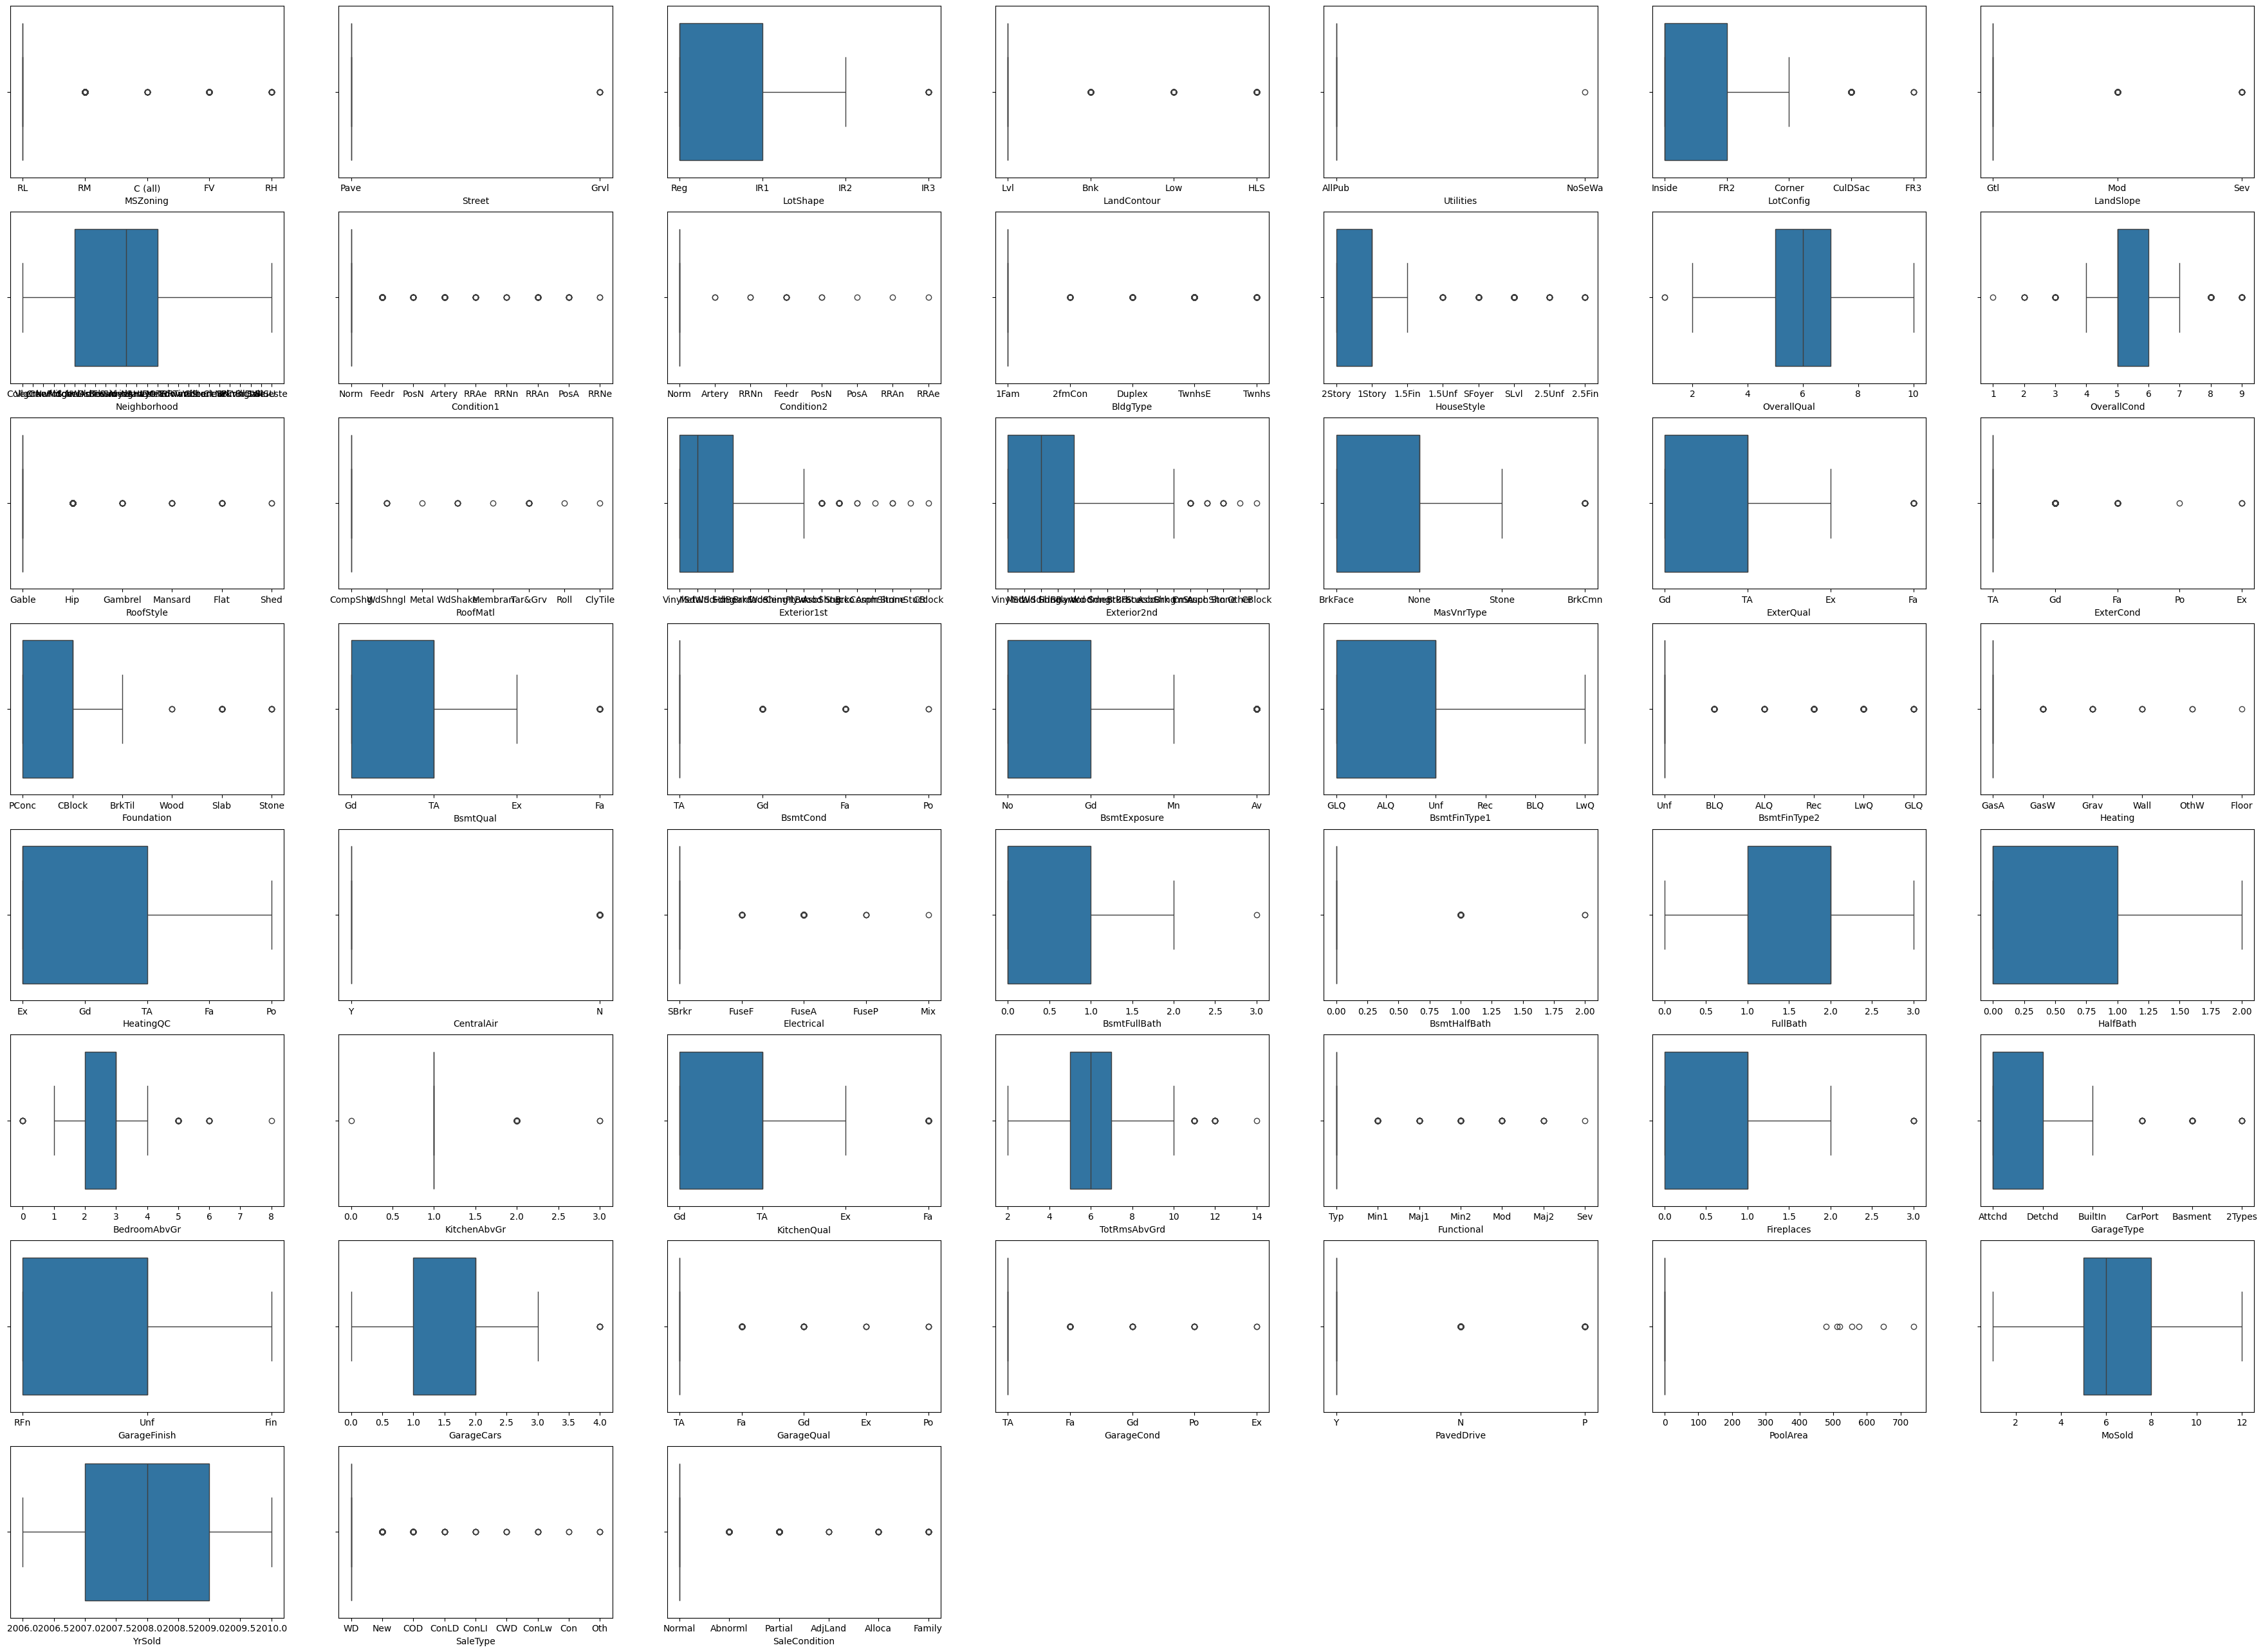

In [ ]:
# The data consists of
plt.figure(figsize=[45,45])
columns_to_plot = cat_features
print("The numbers of columns", cat_features.columns.shape)
for i, column in enumerate(columns_to_plot):
  plt.subplot(11,7,i+1)
  sns.boxplot(x=cat_features[column])
plt.show()

The numbers of columns (52,)


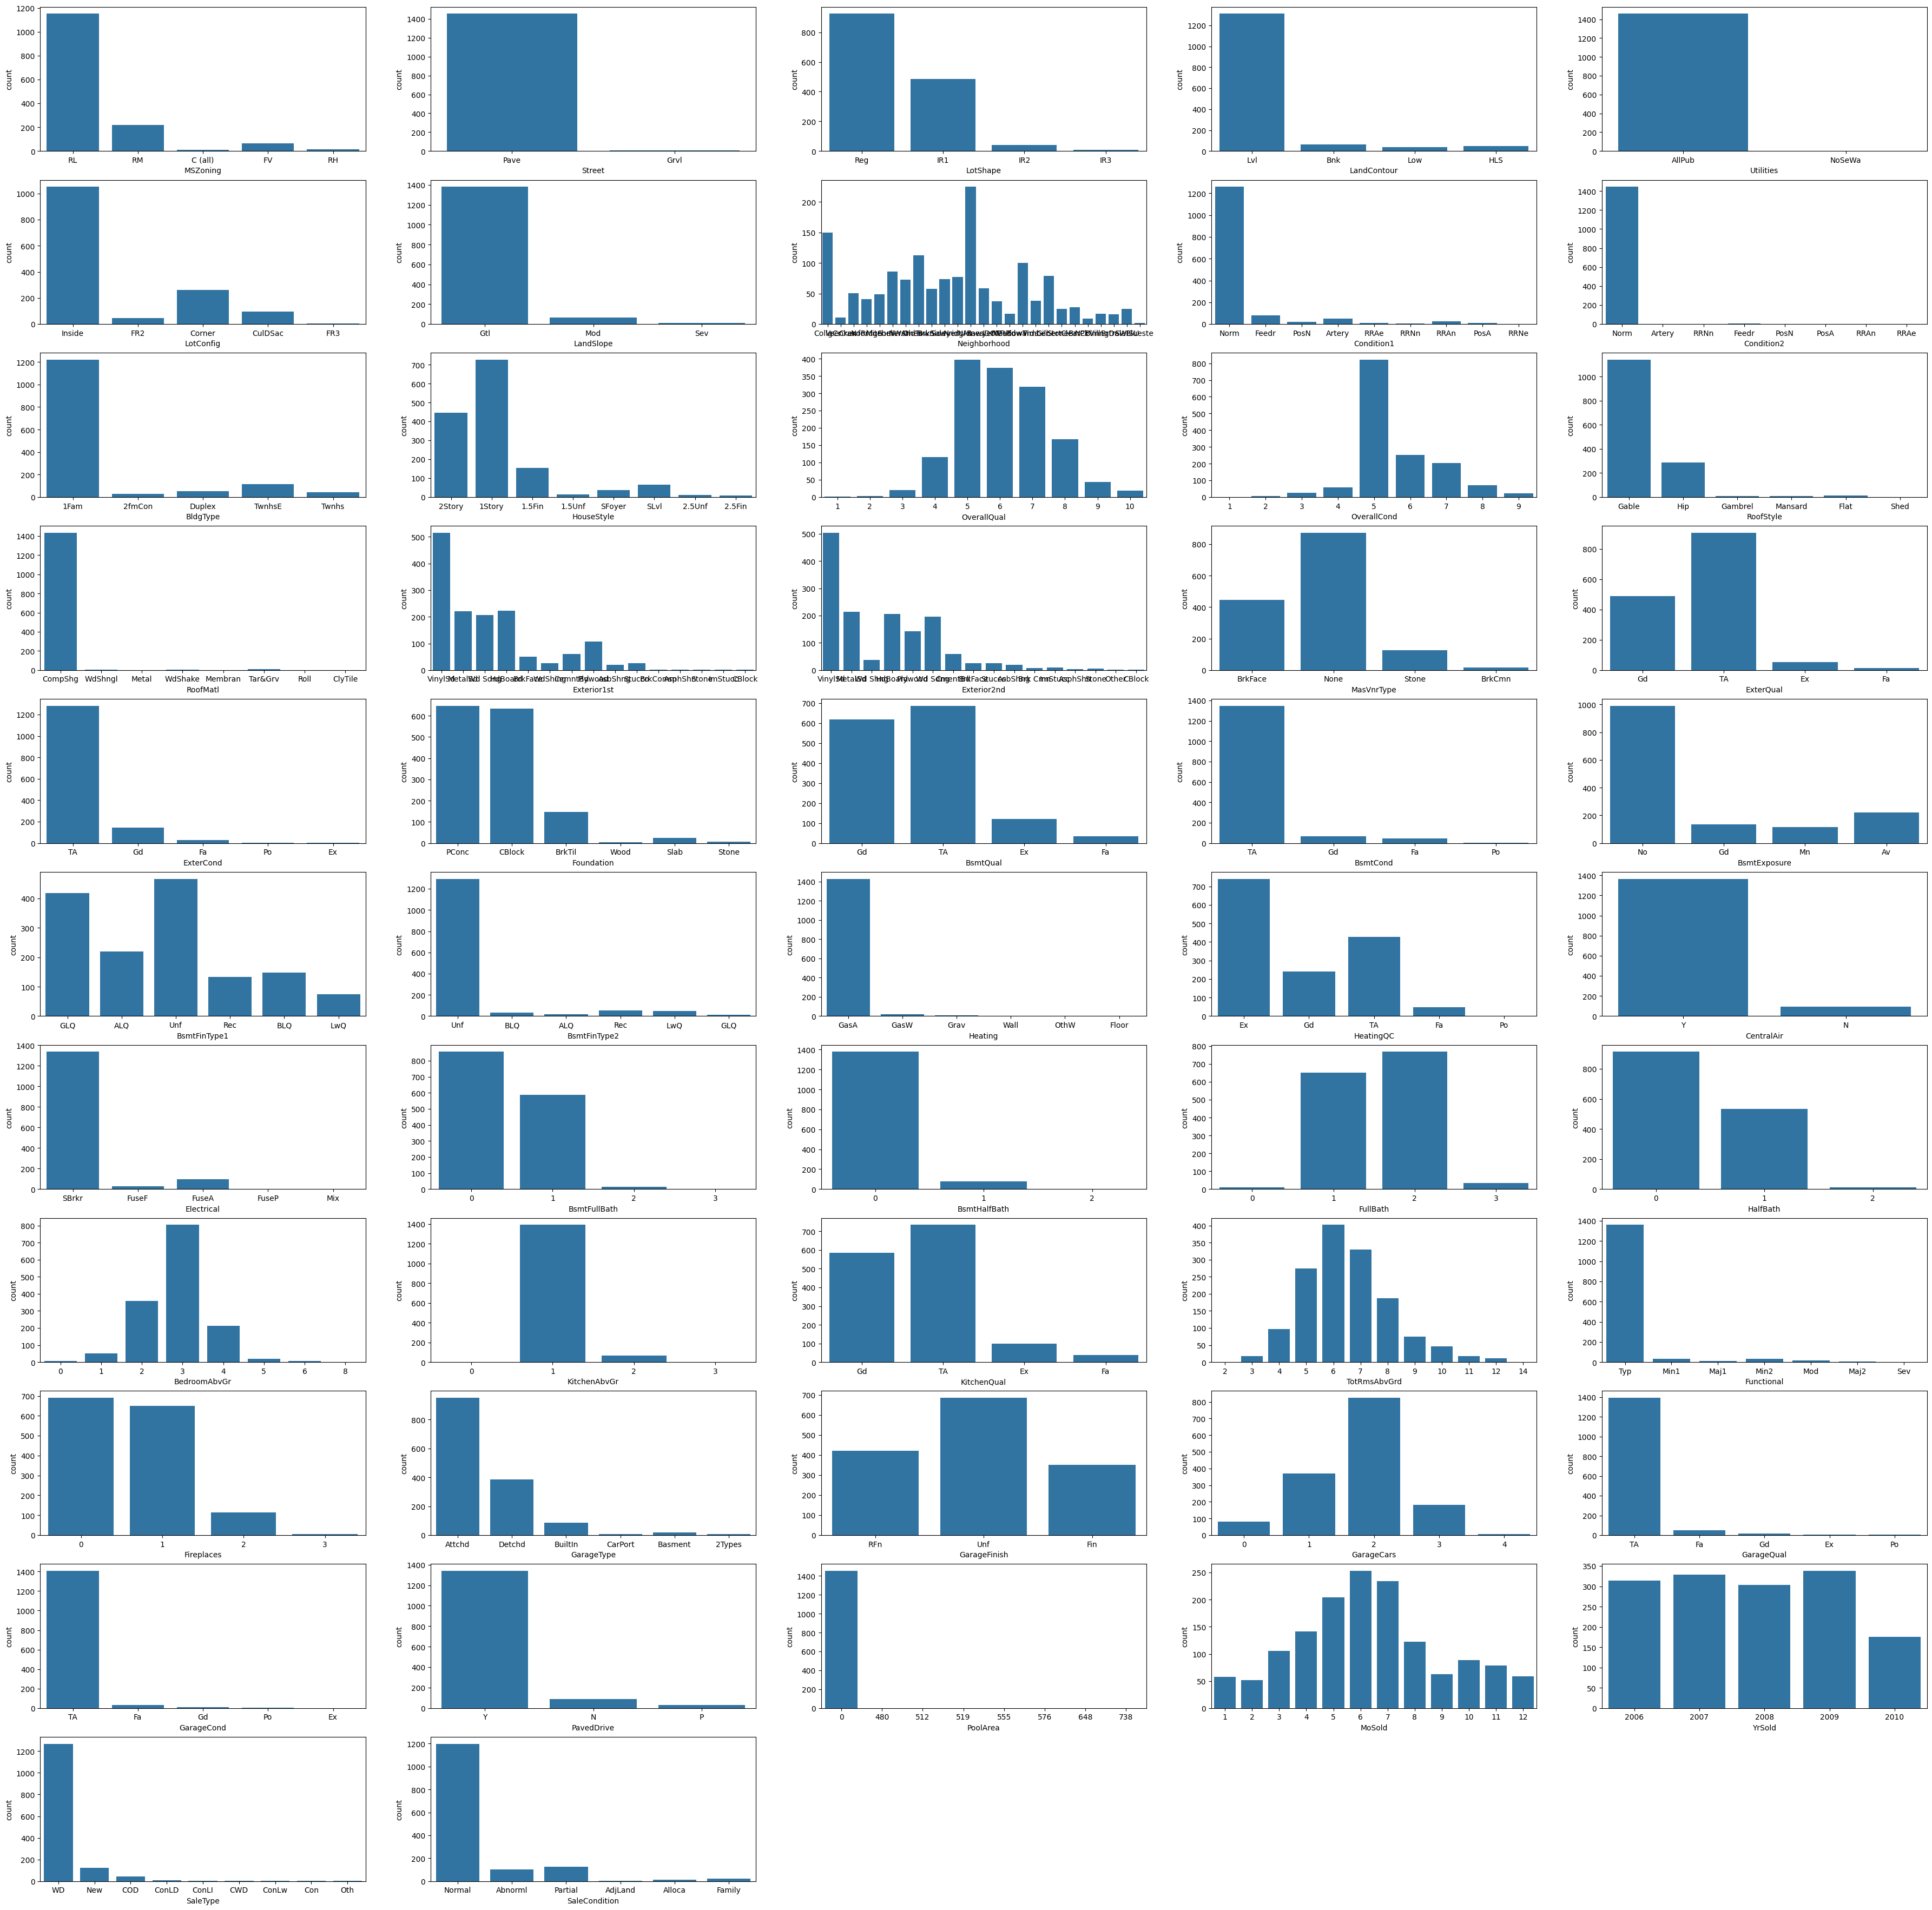

In [ ]:
# The data consists of
plt.figure(figsize=[45,45])
columns_to_plot = cat_features
print("The numbers of columns", cat_features.columns.shape)
for i, column in enumerate(columns_to_plot):
  plt.subplot(11,5,i+1)
  sns.countplot(x=cat_features[column])
plt.show()

In [ ]:
# Calculate the percentage of occurrence of each value in each column
value_counts = cat_features.apply(lambda x: x.value_counts(normalize=True).max())

# Filter columns where the maximum percentage is greater than 0.8
columns_above_80_percent = value_counts[value_counts > 0.8].index.tolist()

print("Columns where a single value is above 80%:")
print(columns_above_80_percent)

Columns where a single value is above 80%:
['Street', 'LandContour', 'Utilities', 'LandSlope', 'Condition1', 'Condition2', 'BldgType', 'RoofMatl', 'ExterCond', 'BsmtCond', 'BsmtFinType2', 'Heating', 'CentralAir', 'Electrical', 'BsmtHalfBath', 'KitchenAbvGr', 'Functional', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolArea', 'SaleType', 'SaleCondition']


In [ ]:
cols_above_80_miss = cat_features[columns_above_80_percent]
cols_above_80_miss.head()

Street LandContour Utilities LandSlope Condition1 Condition2 BldgType  \
0   Pave         Lvl    AllPub       Gtl       Norm       Norm     1Fam   
1   Pave         Lvl    AllPub       Gtl      Feedr       Norm     1Fam   
2   Pave         Lvl    AllPub       Gtl       Norm       Norm     1Fam   
3   Pave         Lvl    AllPub       Gtl       Norm       Norm     1Fam   
4   Pave         Lvl    AllPub       Gtl       Norm       Norm     1Fam   

  RoofMatl ExterCond BsmtCond BsmtFinType2 Heating CentralAir Electrical  \
0  CompShg        TA       TA          Unf    GasA          Y      SBrkr   
1  CompShg        TA       TA          Unf    GasA          Y      SBrkr   
2  CompShg        TA       TA          Unf    GasA          Y      SBrkr   
3  CompShg        TA       Gd          Unf    GasA          Y      SBrkr   
4  CompShg        TA       TA          Unf    GasA          Y      SBrkr   

   BsmtHalfBath  KitchenAbvGr Functional GarageQual GarageCond PavedDrive  \
0             0             1        Typ         TA         TA          Y   
1             1             1        Typ         TA         TA          Y   
2             0             1        Typ         TA         TA          Y   
3             0             1        Typ         TA         TA          Y   
4             0             1        Typ         TA         TA          Y   

   PoolArea SaleType SaleCondition  
0         0       WD        Normal  
1         0       WD        Normal  
2         0       WD        Normal  
3         0       WD       Abnorml  
4         0       WD        Normal

In [ ]:
def plot_countplot_with_percentage(df, columns_to_plot):

    # Set the figure size
    plt.figure(figsize=[45, 45])

    # Iterate through each column to plot
    for i, column in enumerate(columns_to_plot):
        # Create a subplot
        plt.subplot(7, 5, i+1)

        # Plot the countplot for the column
        ax = sns.countplot(x=df[column])

        # Annotate bars with value counts percentage
        total = len(df[column])
        for p in ax.patches:
            height = p.get_height()
            ax.text(p.get_x() + p.get_width() / 2., height + 0.5, '{:.2f}%'.format((height / total) * 100),
                    ha="center")

        # Set plot title
        plt.title(f"{column} - Value Counts")

    # Adjust layout
    plt.tight_layout()

    # Show the plots
    plt.show()

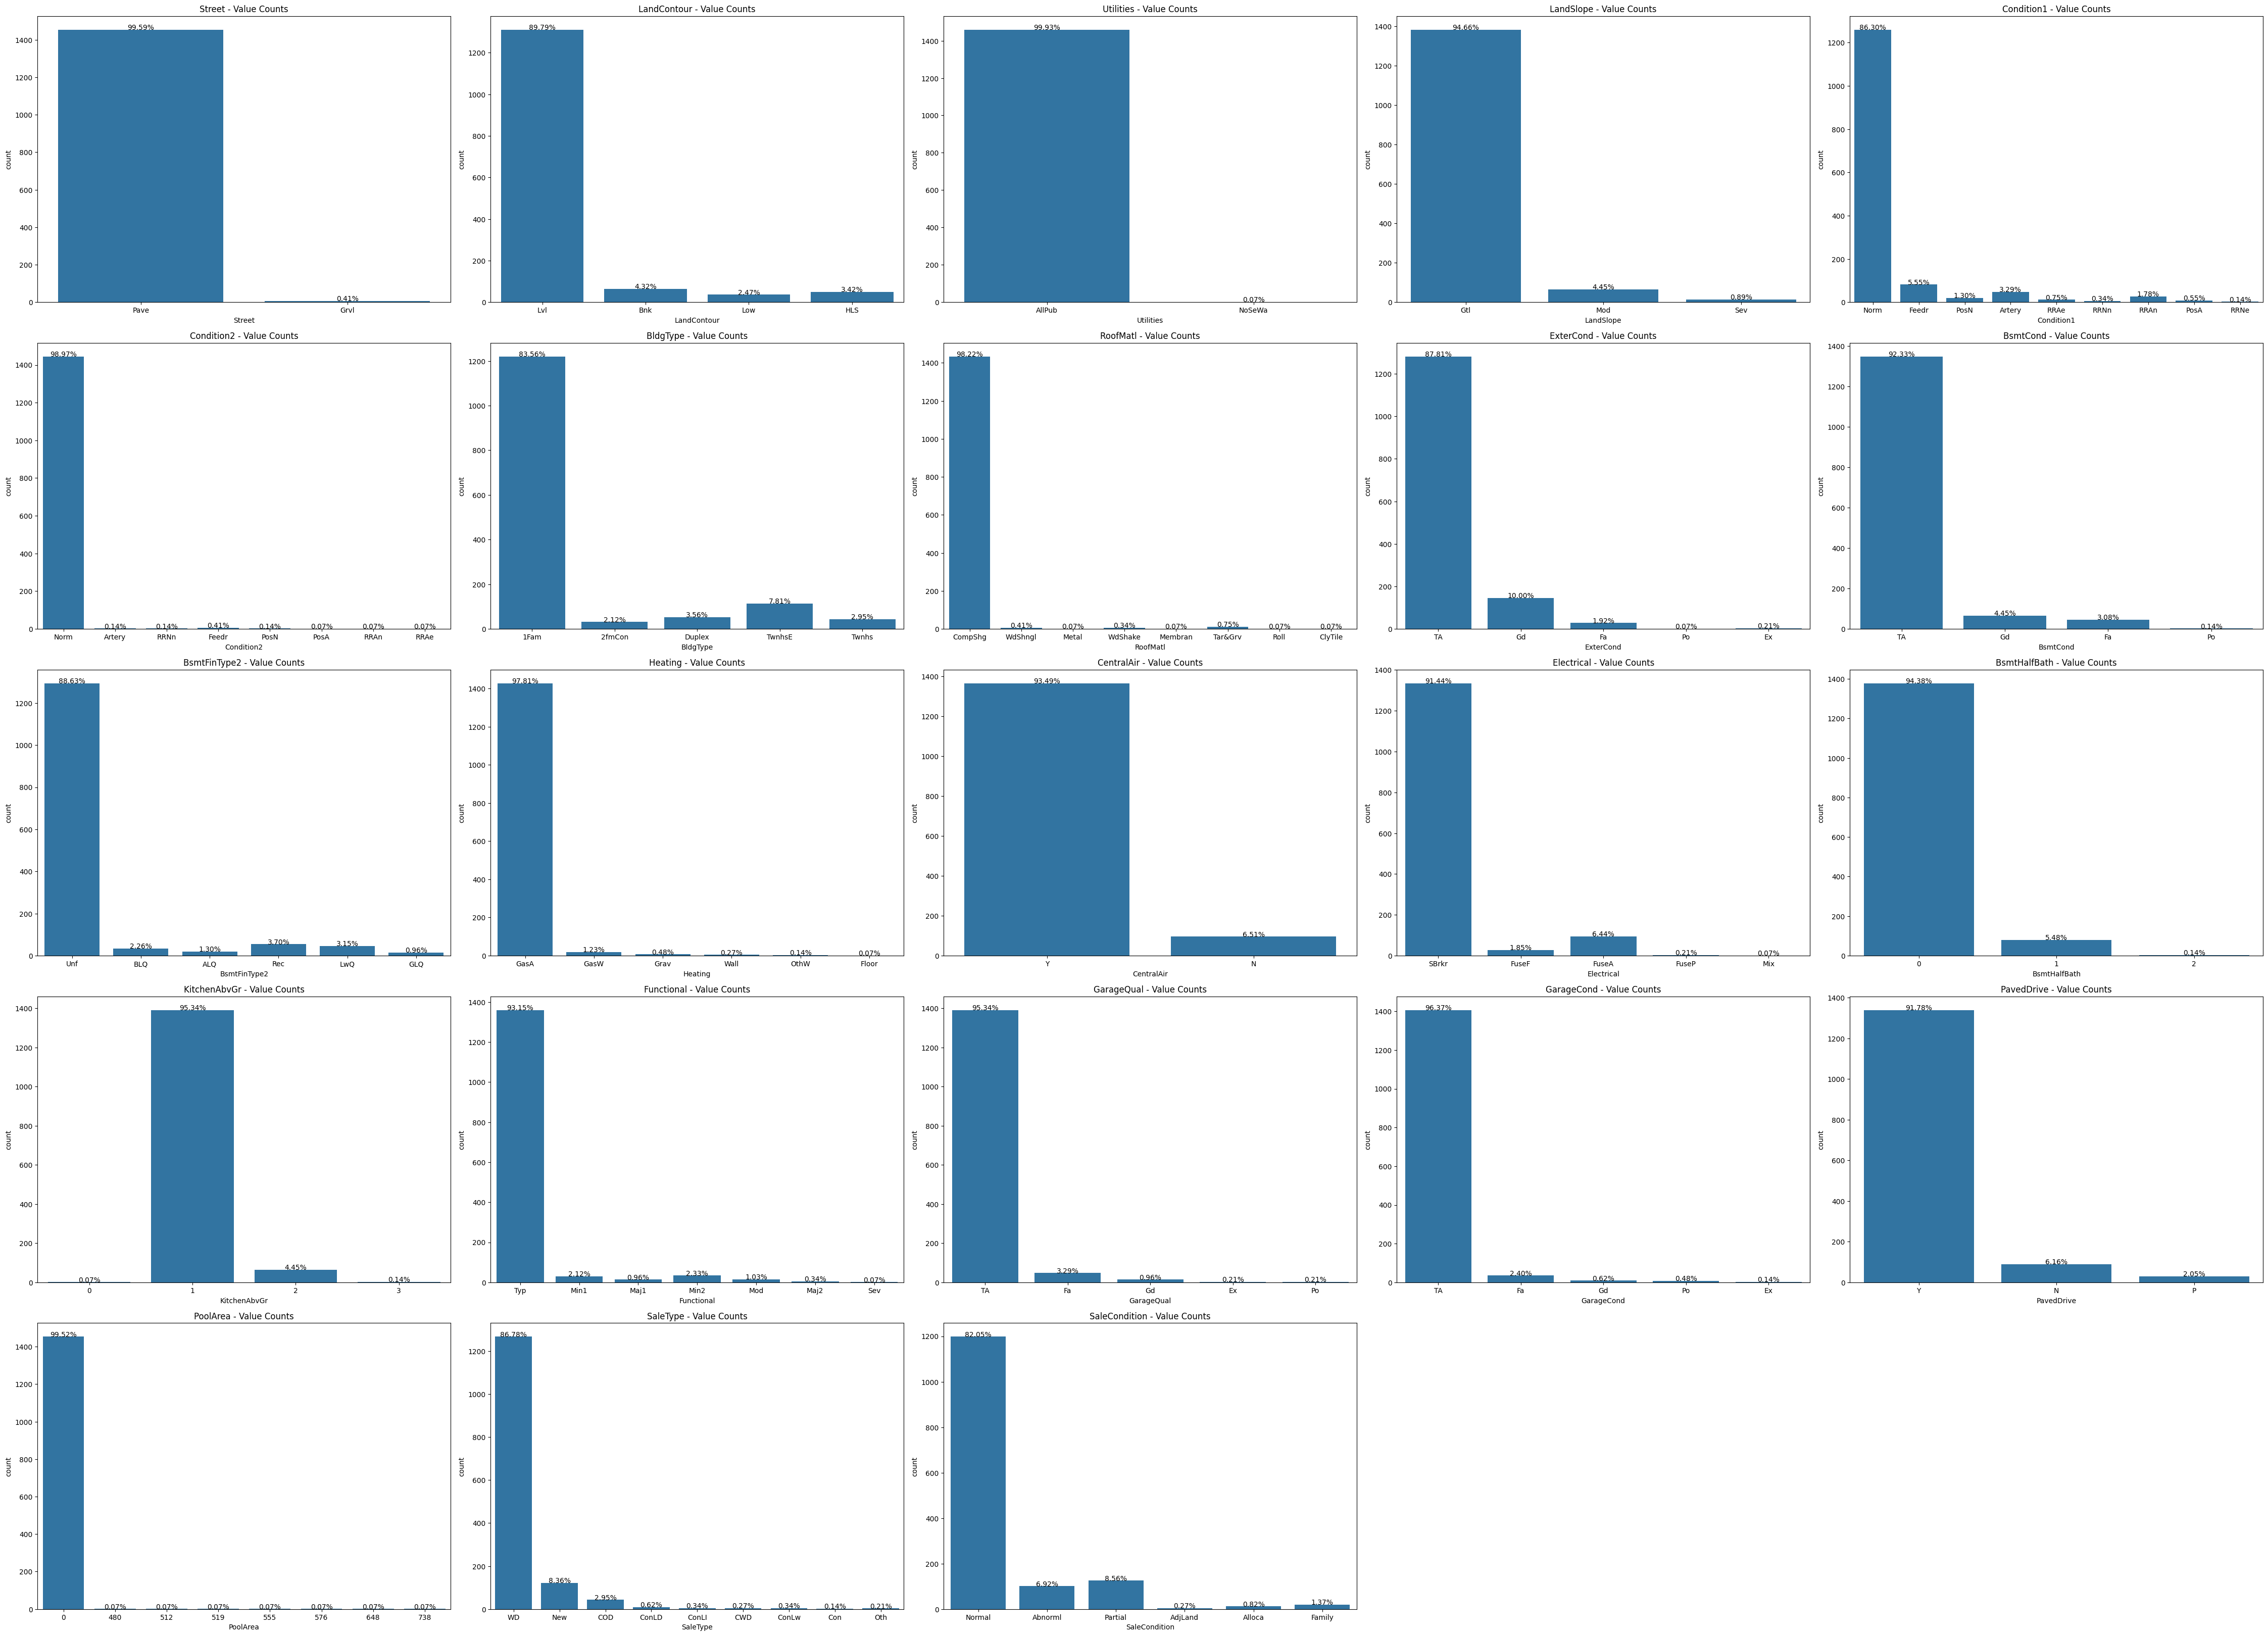

In [ ]:
plot_countplot_with_percentage(cols_above_80_miss, cols_above_80_miss.columns)

Observation : The above features consists of single class value above 80% than other classes. Considering to dropping those features as there don't be inisightful

In [ ]:
cat_features.drop(['Street', 'LandContour', 'Utilities', 'LandSlope', 'Condition1', 'Condition2', 'BldgType', 'RoofMatl', 'ExterCond', 'BsmtCond', 'BsmtFinType2', 'Heating', 'CentralAir', 'Electrical', 'BsmtHalfBath', 'KitchenAbvGr', 'Functional', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolArea', 'SaleType', 'SaleCondition'], axis=1, inplace=True)

<ipython-input-37-f7d3af4a9e09>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cat_features.drop(['Street', 'LandContour', 'Utilities', 'LandSlope', 'Condition1', 'Condition2', 'BldgType', 'RoofMatl', 'ExterCond', 'BsmtCond', 'BsmtFinType2', 'Heating', 'CentralAir', 'Electrical', 'BsmtHalfBath', 'KitchenAbvGr', 'Functional', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolArea', 'SaleType', 'SaleCondition'], axis=1, inplace=True)


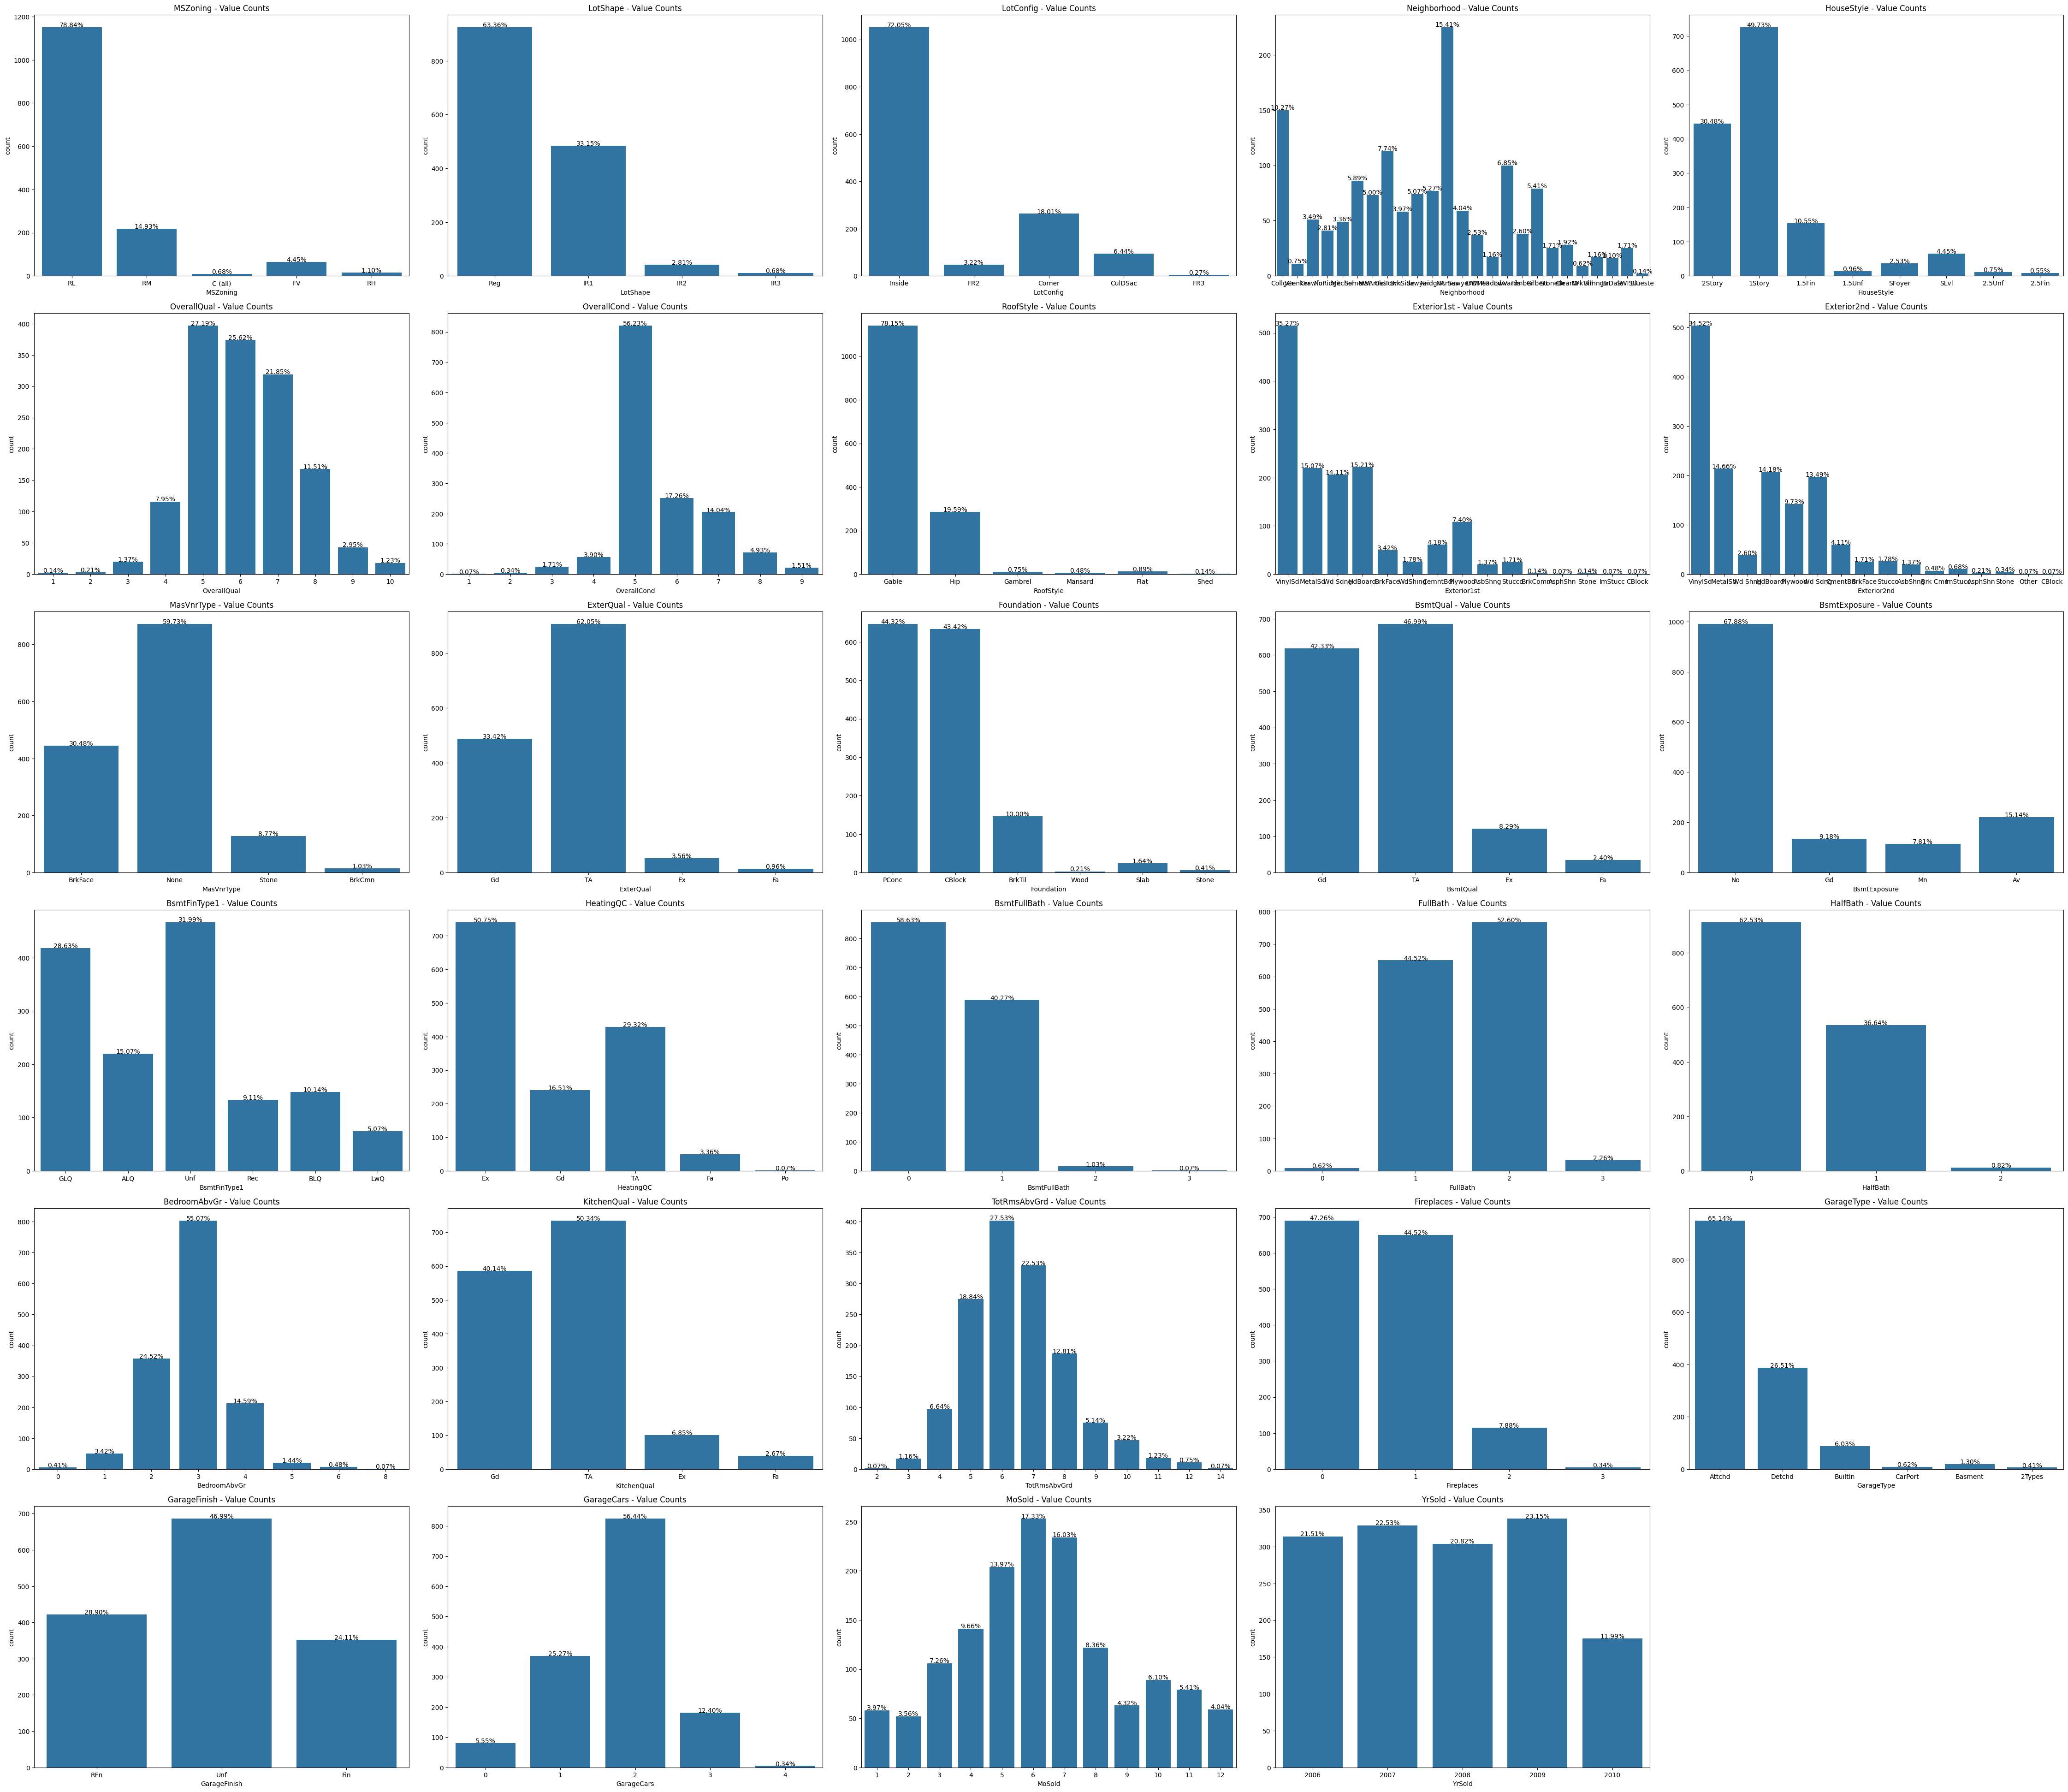

In [ ]:
plot_countplot_with_percentage(cat_features, cat_features.columns)

In [ ]:
# Finding the values of features those were less than 5%

for feature in cat_features.columns:
    # Calculate the frequency of each value
    value_counts = cat_features[feature].value_counts(normalize=True)

    # Identify values occurring less than 5% of the time
    infrequent_values = value_counts[value_counts < 0.05].index

    # Drop rows containing these values
    cat_features = cat_features[~cat_features[feature].isin(infrequent_values)]

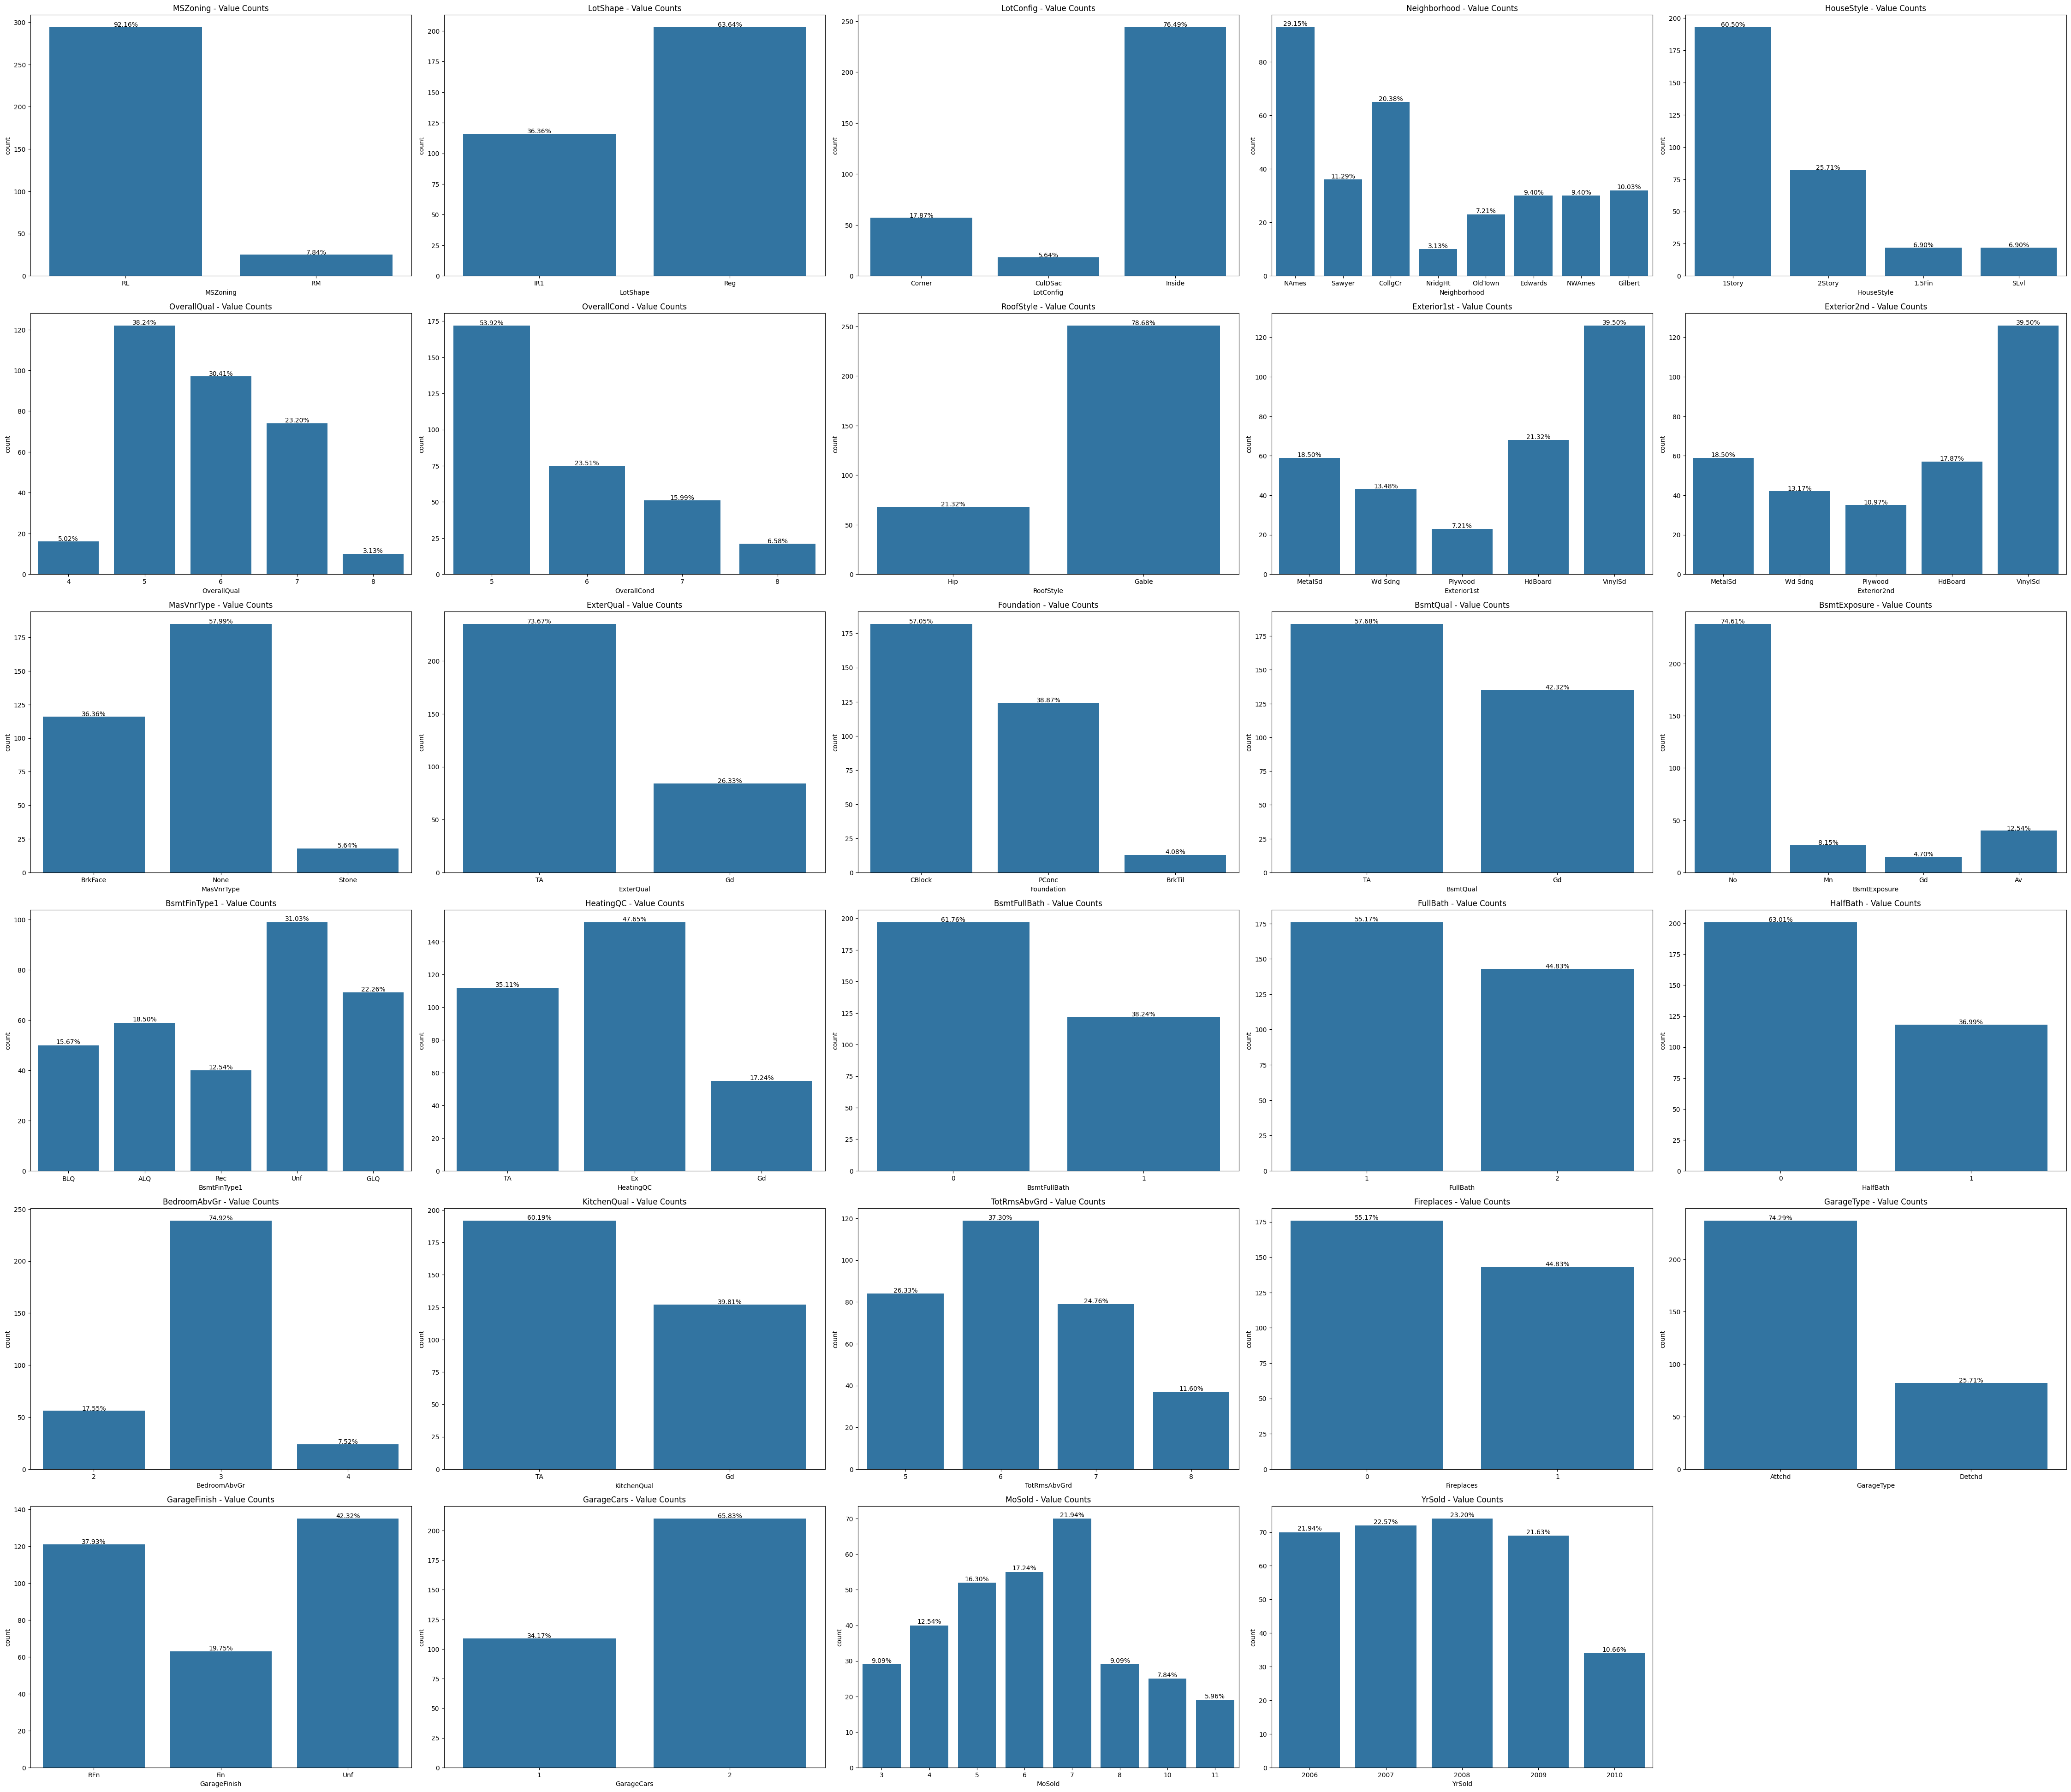

In [ ]:
plot_countplot_with_percentage(cat_features, cat_features.columns) # removed the featues values those were less than 5%

2.1 Chi - Square Test

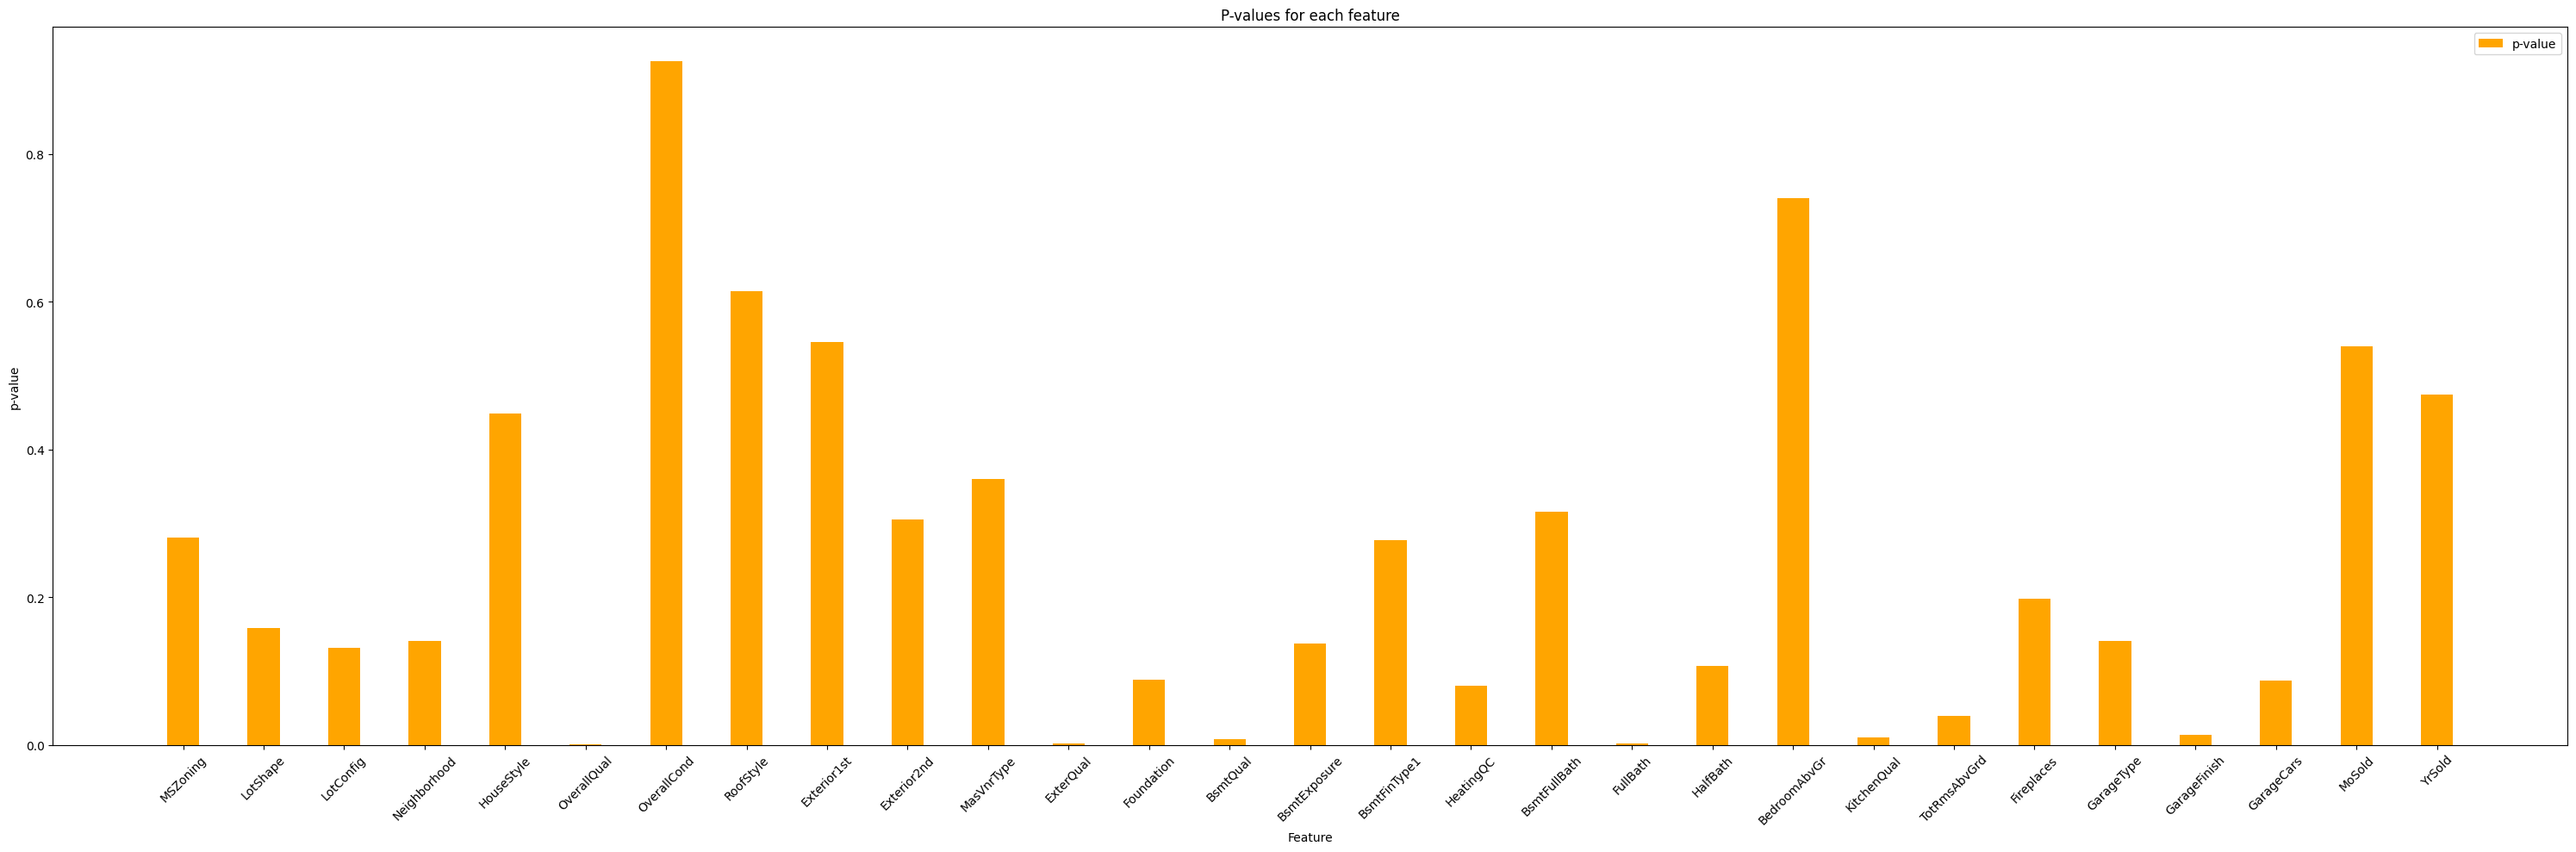

In [ ]:
from scipy.stats import chi2_contingency

# Initialize lists to store chi-square values and p-values
chi2_values = []
p_values = []

# Loop through each categorical feature
for column in cat_features.columns:  # Iterate directly through categorical features columns
    if column != 'SalePrice':  # Exclude the target column
        # Calculate chi-square value and p-value
        contingency_table = pd.crosstab(cat_features[column], df['SalePrice'])
        chi2, p, _, _ = chi2_contingency(contingency_table)

        # Append chi-square value and p-value to the lists
        chi2_values.append(chi2)
        p_values.append(p)

# Set up the figure and axes
fig, ax = plt.subplots(figsize=(30, 10))

# Plot p-values
bar_width = 0.4
index = np.arange(len(cat_features.columns))  # Adjusted to include all categorical features
ax.bar(index, p_values, bar_width, label='p-value', color='orange')

# Set labels and title
ax.set_xlabel('Feature')
ax.set_ylabel('p-value')
ax.set_title('P-values for each feature')
ax.set_xticks(index)
ax.set_xticklabels(cat_features.columns)
ax.legend()

# Rotate x-axis labels
plt.xticks(rotation=45)

# Adjust layout
plt.tight_layout()
plt.show()

In [ ]:
# Create DataFrame with feature names and p-values
df_p_values = pd.DataFrame({'Feature': cat_features.columns, 'p-value': p_values})

# Convert p-values to float format
df_p_values['p-value'] = df_p_values['p-value'].astype(float).round(4)

# Sort DataFrame by p-values
df_p_values_sorted = df_p_values.sort_values(by='p-value', ascending=False)
df_p_values_sorted

Feature  p-value
6    OverallCond   0.9257
20  BedroomAbvGr   0.7401
7      RoofStyle   0.6142
8    Exterior1st   0.5451
27        MoSold   0.5392
28        YrSold   0.4741
4     HouseStyle   0.4492
10    MasVnrType   0.3605
17  BsmtFullBath   0.3163
9    Exterior2nd   0.3054
0       MSZoning   0.2805
15  BsmtFinType1   0.2775
23    Fireplaces   0.1985
1       LotShape   0.1584
24    GarageType   0.1411
3   Neighborhood   0.1408
14  BsmtExposure   0.1369
2      LotConfig   0.1319
19      HalfBath   0.1075
12    Foundation   0.0879
26    GarageCars   0.0873
16     HeatingQC   0.0801
22  TotRmsAbvGrd   0.0392
25  GarageFinish   0.0142
21   KitchenQual   0.0103
13      BsmtQual   0.0082
11     ExterQual   0.0023
18      FullBath   0.0015
5    OverallQual   0.0012

In [ ]:
# Filter DataFrame to include only features with p-values less than 0.05
significant_features = df_p_values_sorted[df_p_values_sorted['p-value'] < 0.05]

# Print the significant features
print(significant_features)

         Feature  p-value
22  TotRmsAbvGrd   0.0392
25  GarageFinish   0.0142
21   KitchenQual   0.0103
13      BsmtQual   0.0082
11     ExterQual   0.0023
18      FullBath   0.0015
5    OverallQual   0.0012


In [ ]:
# Extract significant feature names
significant_feature_names = significant_features['Feature'].tolist()

print((cat_features.shape[1]), "categorical features are present in the data")
print(len(significant_feature_names), "features that shows statistical significance with Target feature by applying chi-sqaure ")

29 categorical features are present in the data
7 features that shows statistical significance with Target feature by applying chi-sqaure 


In [ ]:
chi_sqaure_features = df[significant_feature_names]
chi_sqaure_features.head()

TotRmsAbvGrd GarageFinish KitchenQual BsmtQual ExterQual  FullBath  \
0             8          RFn          Gd       Gd        Gd         2   
1             6          RFn          TA       Gd        TA         2   
2             6          RFn          Gd       Gd        Gd         2   
3             7          Unf          Gd       TA        TA         1   
4             9          RFn          Gd       Gd        Gd         2   

   OverallQual  
0            7  
1            6  
2            7  
3            7  
4            8

Observation : By applying the Chi Square method, we see there are only 26 features are of significance importance. Going ahead with performing the basic outlier removal to see if it creates any difference

The numbers of columns (7,)


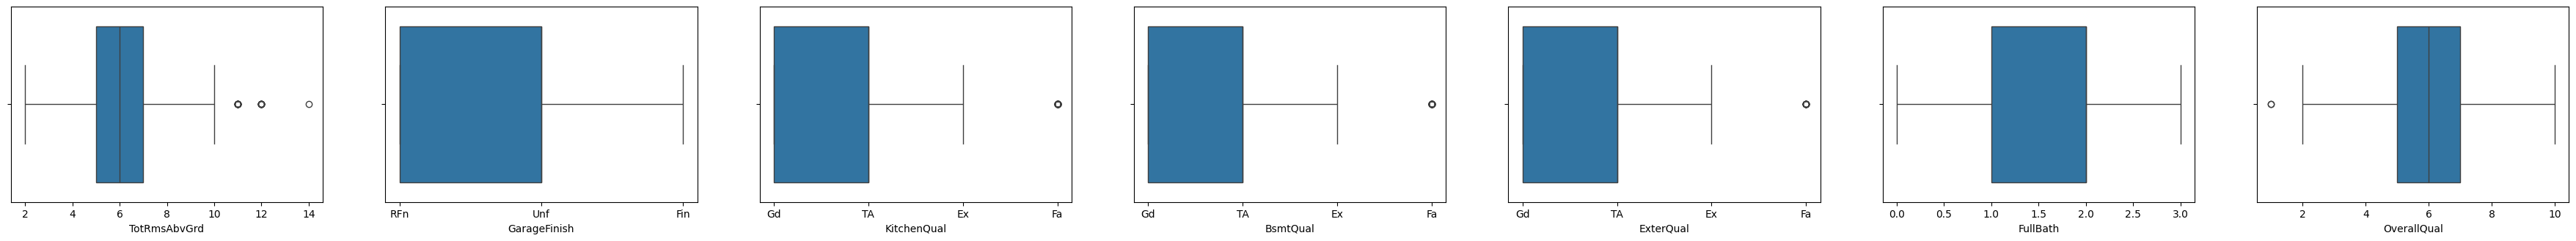

In [ ]:
# The data consists of
plt.figure(figsize=[45,45])
columns_to_plot = chi_sqaure_features
print("The numbers of columns", chi_sqaure_features.columns.shape)
for i, column in enumerate(columns_to_plot):
  plt.subplot(11,7,i+1)
  sns.boxplot(x=chi_sqaure_features[column])
plt.show()

The numbers of columns (7,)


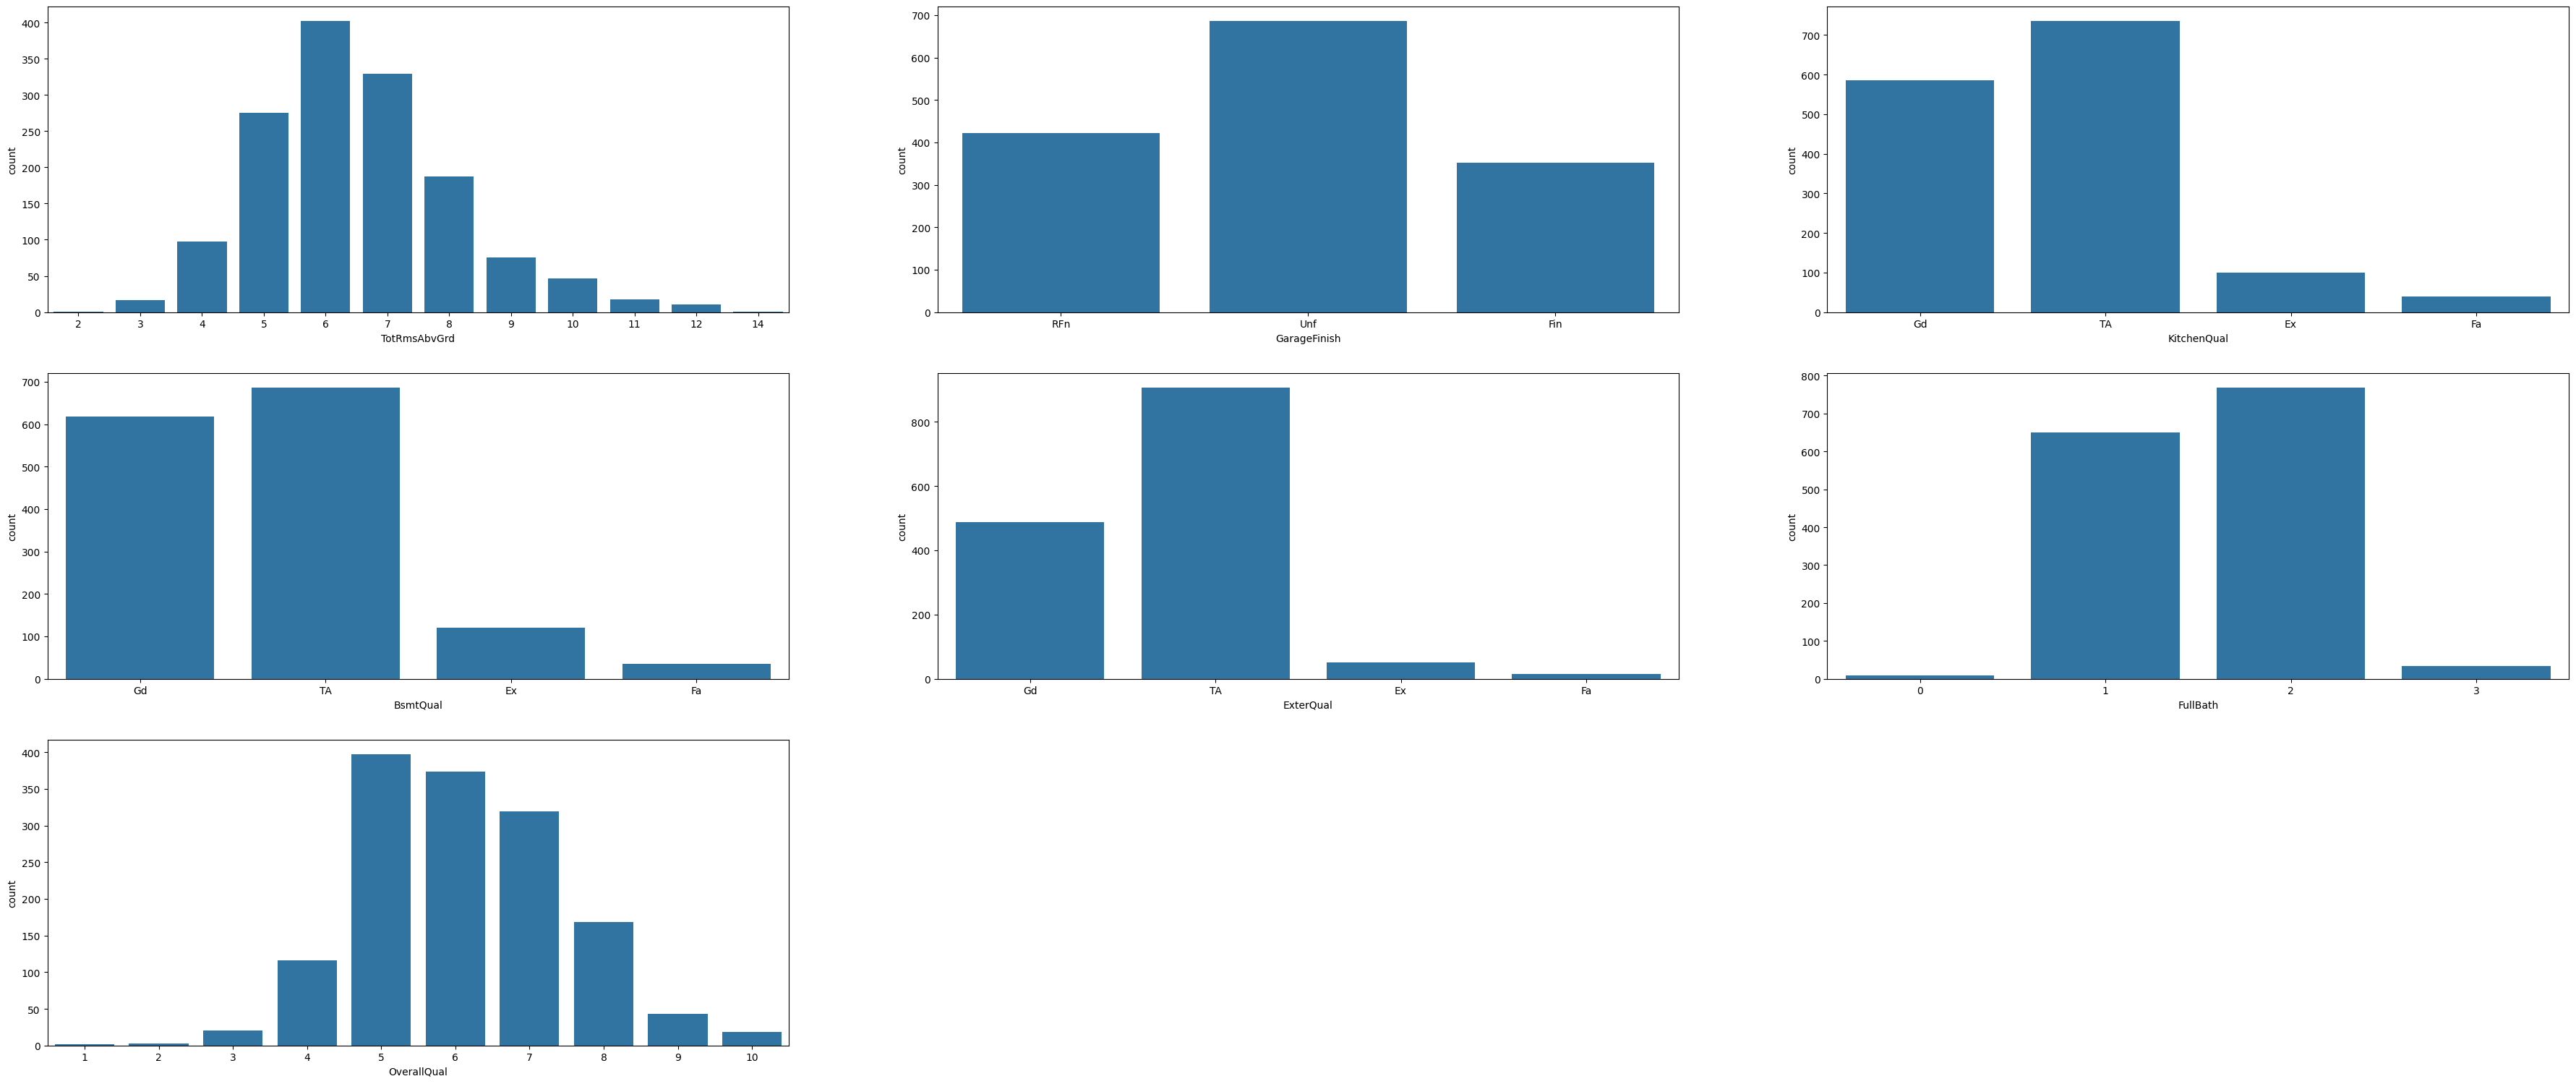

In [ ]:
# The data consists of
plt.figure(figsize=[45,45])
columns_to_plot = chi_sqaure_features
print("The numbers of columns", chi_sqaure_features.columns.shape)
for i, column in enumerate(columns_to_plot):
  plt.subplot(7,3,i+1)
  sns.countplot(x=chi_sqaure_features[column])
plt.show()

In [ ]:
# df = df[~df['BsmtHalfBath'].isin(['2'])]
# df = df[~df['Fireplaces'].isin(['2'])]
# df['SaleType'] = df['SaleType'].replace(['COD', 'ConLD', 'ConLw', 'ConLI', 'CWD', 'Oth', 'Con'], 'Others')
# df = df[~df['TotRmsAbvGrd'].isin(['10','11','3','12','2','14'])]
# df = df[~df['KitchenQual'].isin(['Fa'])]
# df = df[~df['GarageCars'].isin(['4'])]
# df['MSZoning'] = df['MSZoning'].replace(['FV', 'RH', 'C (all)'], 'Others')
# df = df[~df['HalfBath'].isin(['2'])]
# df['ExterCond'] = df['ExterCond'].replace(['Fa', 'Ex', 'Po'], 'Others') # class imbalance
# df['LotShape'] = df['LotShape'].replace(['IR2', 'IR3'], 'Others')
# df = df[~df['HalfBath'].isin(['2'])]
# # df['Neighborhood'] this feature has values count in incremental so avoiding it
# df = df[~df['OverallQual'].isin(['9','3', '10','2','1'])]
# df = df[~df['OverallQual'].isin(['9','3', '10','2','1'])]

In [ ]:
# # Dropping the Id feature
# df.drop(['Id'], axis=1, inplace=True)

2.2 Outlier Detection on Non Categorical data

In [ ]:
non_cat_features.head()

MSSubClass  LotArea  YearBuilt  YearRemodAdd  BsmtFinSF1  BsmtFinSF2  \
0          60     8450       2003          2003         706           0   
1          20     9600       1976          1976         978           0   
2          60    11250       2001          2002         486           0   
3          70     9550       1915          1970         216           0   
4          60    14260       2000          2000         655           0   

   BsmtUnfSF  TotalBsmtSF  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  \
0        150          856       856       854             0       1710   
1        284         1262      1262         0             0       1262   
2        434          920       920       866             0       1786   
3        540          756       961       756             0       1717   
4        490         1145      1145      1053             0       2198   

   GarageArea  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  \
0         548           0           61              0          0            0   
1         460         298            0              0          0            0   
2         608           0           42              0          0            0   
3         642           0           35            272          0            0   
4         836         192           84              0          0            0   

   MiscVal  SalePrice  median_LotFrontage  median_GarageYrBlt  \
0        0     208500                65.0              2003.0   
1        0     181500                80.0              1976.0   
2        0     223500                68.0              2001.0   
3        0     140000                60.0              1998.0   
4        0     250000                84.0              2000.0   

   median_MasVnrArea  
0              196.0  
1                0.0  
2              162.0  
3                0.0  
4              350.0

The numbers of columns (23,)


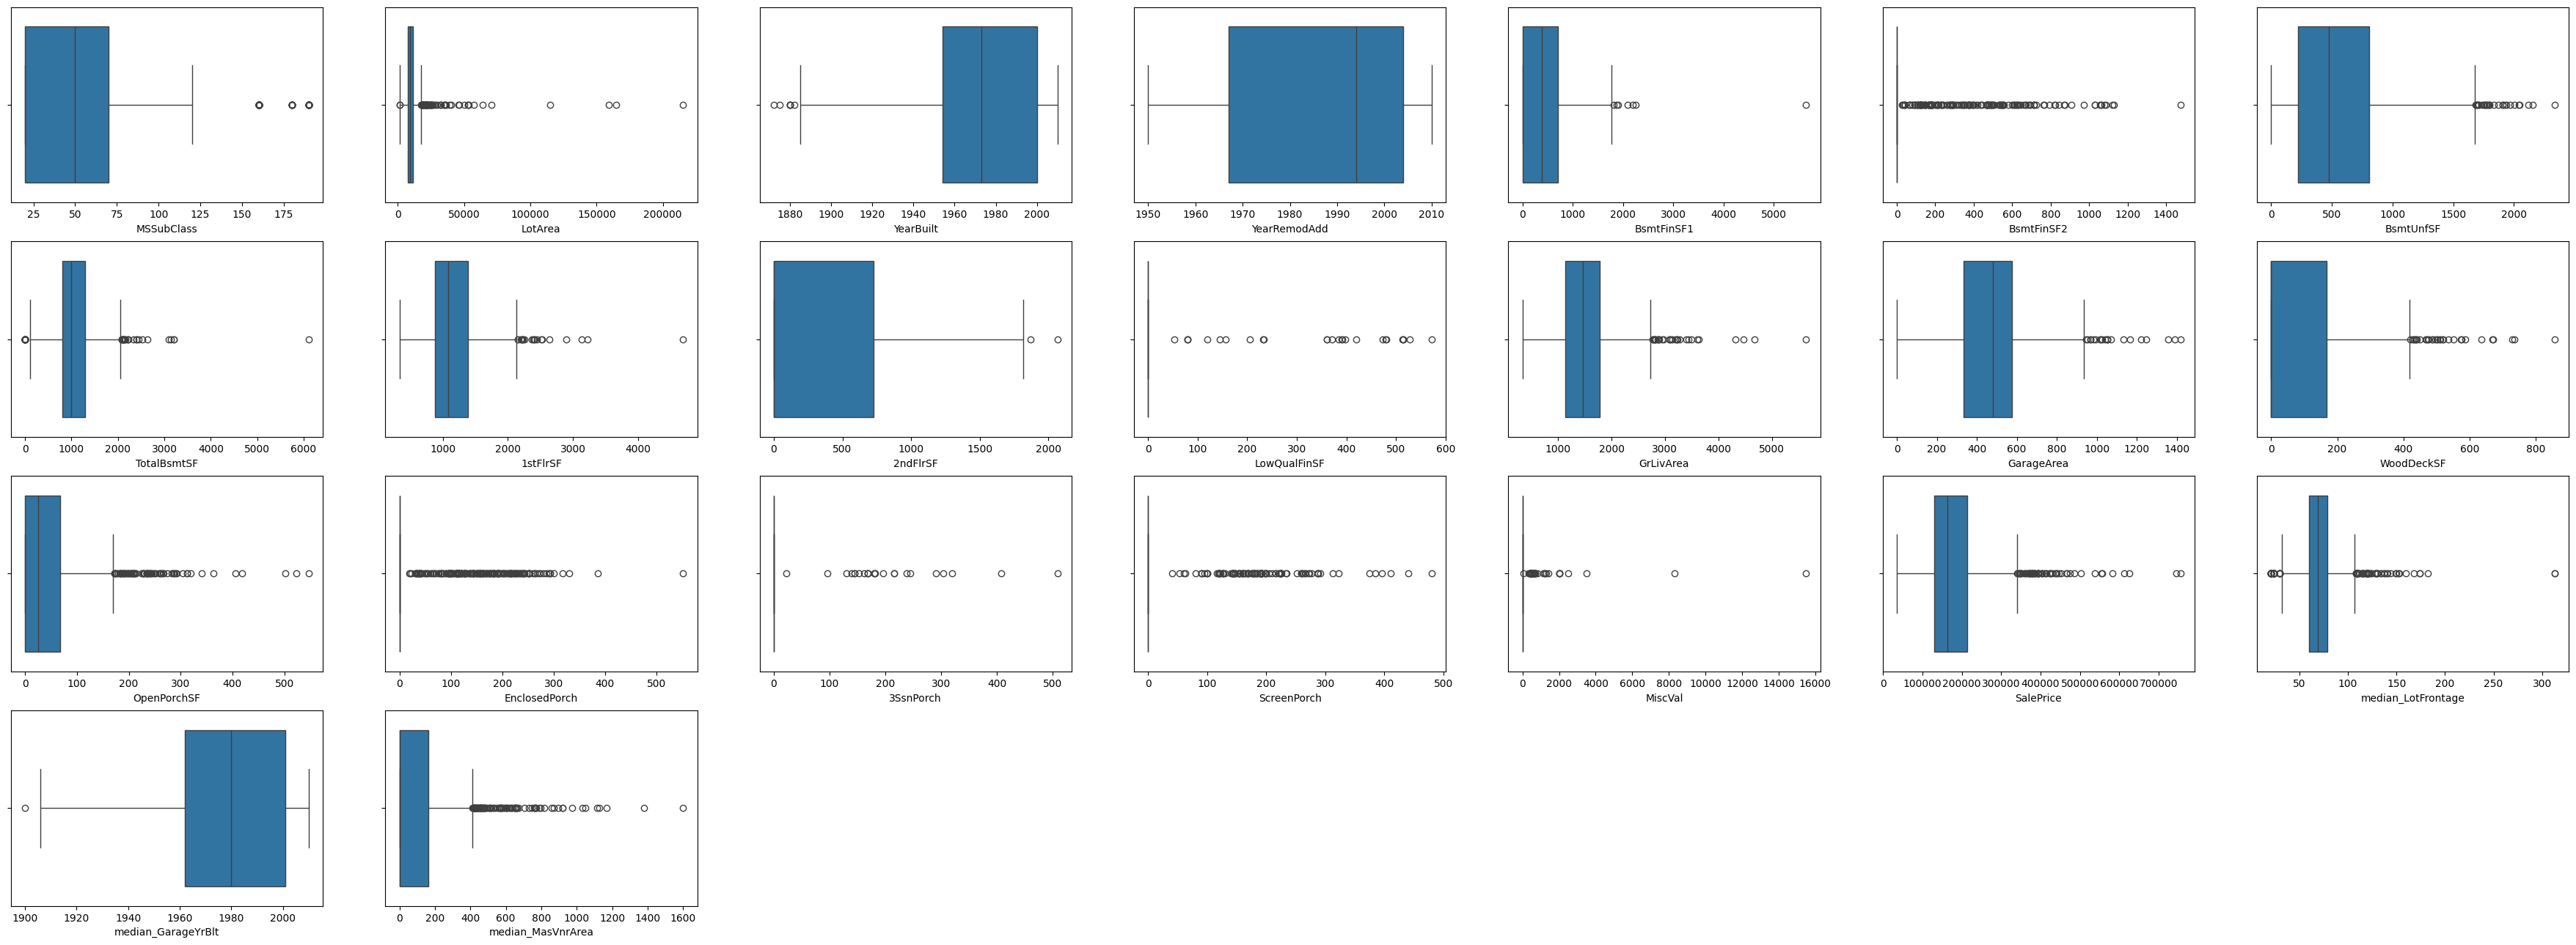

In [ ]:
# The data consists of
plt.figure(figsize=[45,45])
columns_to_plot = non_cat_features
print("The numbers of columns", non_cat_features.columns.shape)
for i, column in enumerate(columns_to_plot):
  plt.subplot(11,7,i+1)
  sns.boxplot(x=non_cat_features[column])
plt.show()

Observation : There are too many features to perform outlier detection, automatically trimming the outer quartile range can lead to data loss. Apply a basic outlier trim by capping the extreme values at quantile 90%

Lower range capping

In [ ]:
quantile_lower_range = 0.02

# List of features to cap
features_to_cap = [
    'LotArea', 'YearBuilt', 'TotalBsmtSF', 'median_LotFrontage', 'median_GarageYrBlt'
]

# Get count of values less than 1th percentile for each feature
values_less_than_quantile = {}
for feature in features_to_cap:
    count_less_than_quantile = (non_cat_features[feature] < non_cat_features[feature].quantile(quantile_lower_range)).sum()
    values_less_than_quantile[feature] = count_less_than_quantile

print("Count of values less than 1th percentile in each feature:")
print(values_less_than_quantile)

Count of values less than 1th percentile in each feature:
{'LotArea': 30, 'YearBuilt': 30, 'TotalBsmtSF': 0, 'median_LotFrontage': 23, 'median_GarageYrBlt': 17}


In [ ]:
# Cap each feature at the 5th percentile
for feature in features_to_cap:
    non_cat_features[feature] = non_cat_features[feature].apply(lambda x: max(x, non_cat_features[feature].quantile(quantile_lower_range)))

In [ ]:
features_to_cap_new = ['TotalBsmtSF', 'median_LotFrontage']

# Calculate the interquartile range (IQR) for each feature
Q1 = non_cat_features[features_to_cap_new].quantile(0.25)
Q3 = non_cat_features[features_to_cap_new].quantile(0.75)
IQR = Q3 - Q1

# Find values below the IQR for each feature and count them
below_IQR_count = (non_cat_features[features_to_cap_new] < (Q1 - 1.5 * IQR)).sum()

print("Count of data that falls below the IQR range:")
print(below_IQR_count)

Count of data that falls below the IQR range:
TotalBsmtSF           37
median_LotFrontage    48
dtype: int64


In [ ]:
# # Identify outlier rows for each feature
# outlier_indices = ((df[features_to_cap_new] < (Q1 - 1.5 * IQR))).any(axis=1)

# # Count the total number of outlier rows
# total_outliers = outlier_indices.sum()

# # Remove outlier rows from the DataFrame
# df = df[~outlier_indices]

# print("Total number of outlier rows removed:", total_outliers)

The numbers of columns (5,)


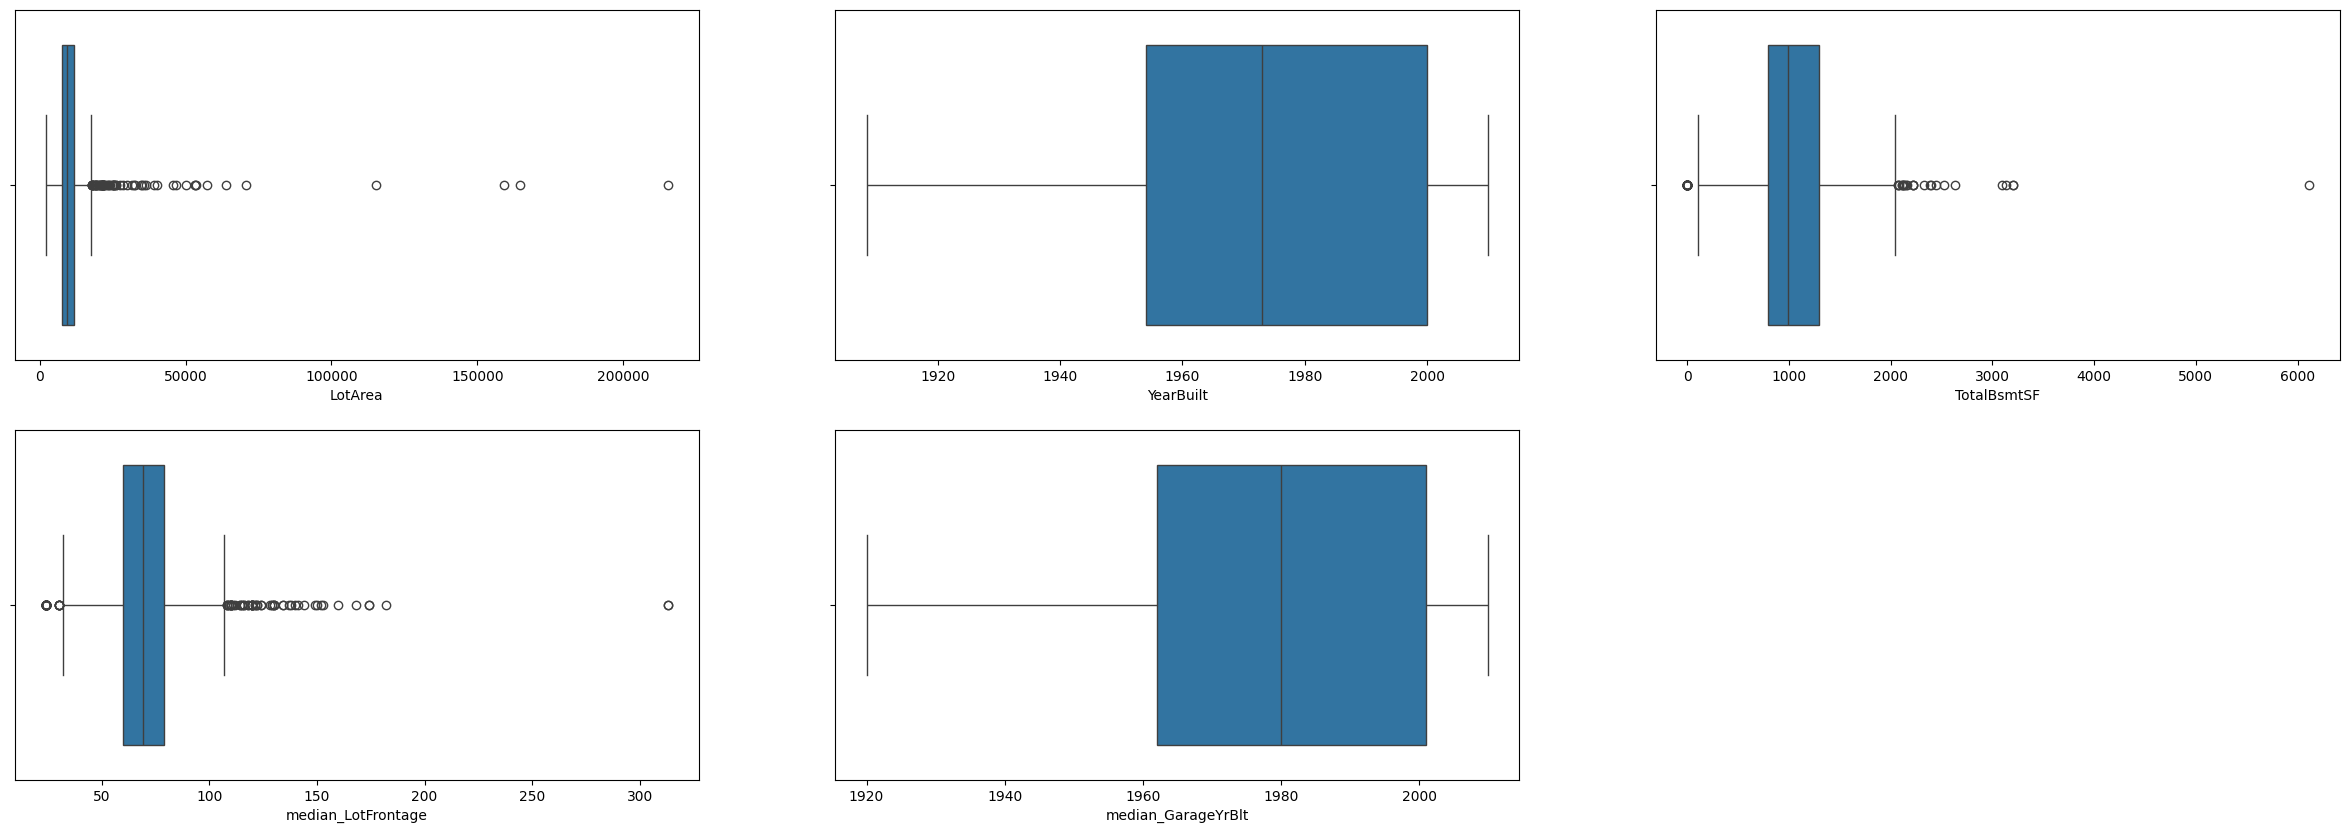

In [ ]:
# The data consists of 5 features

plt.figure(figsize=[30,10])
columns_to_plot = non_cat_features[features_to_cap]
print("The numbers of columns", non_cat_features[features_to_cap].columns.shape)
for i, column in enumerate(columns_to_plot):
  plt.subplot(2,3,i+1)
  sns.boxplot(x=non_cat_features[features_to_cap][column])
plt.show()

Upper range capping

In [ ]:
quantile_upper_range = 0.98

# List of features to cap
features_to_upper_cap = [
    'MSSubClass', 'LotArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'GarageArea',
    'WoodDeckSF', 'OpenPorchSF','EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'MiscVal', 'SalePrice','median_LotFrontage', 'median_MasVnrArea'
]

# Get count of values above 99th percentile for each feature
values_above_quantile = {}
for feature in features_to_upper_cap:
    count_above_quantile = (non_cat_features[feature] > non_cat_features[feature].quantile(quantile_upper_range)).sum()
    values_above_quantile[feature] = count_above_quantile

print("Count of values above 98th percentile in each feature:")
print(values_above_quantile)

Count of values above 99th percentile in each feature:
{'MSSubClass': 30, 'LotArea': 30, 'BsmtFinSF1': 30, 'BsmtFinSF2': 30, 'BsmtUnfSF': 30, 'TotalBsmtSF': 30, '1stFlrSF': 30, '2ndFlrSF': 30, 'LowQualFinSF': 26, 'GrLivArea': 30, 'GarageArea': 30, 'WoodDeckSF': 30, 'OpenPorchSF': 30, 'EnclosedPorch': 30, '3SsnPorch': 24, 'ScreenPorch': 30, 'MiscVal': 25, 'SalePrice': 30, 'median_LotFrontage': 30, 'median_MasVnrArea': 30}


In [ ]:
# Cap each feature at the 98th percentile
for feature in features_to_upper_cap:
    non_cat_features[feature] = non_cat_features[feature].apply(lambda x: min(x, non_cat_features[feature].quantile(quantile_upper_range)))

In [ ]:
features_to_upper_cap

# Calculate the interquartile range (IQR) for each feature
Q1 = non_cat_features[features_to_upper_cap].quantile(0.25)
Q3 = non_cat_features[features_to_upper_cap].quantile(0.75)
IQR = Q3 - Q1

# Find values above the IQR for each feature and count them
above_IQR_count = (non_cat_features[features_to_upper_cap] > (Q3 + 1.5 * IQR)).sum()

print("Count of data that falls above the IQR range:")
print(above_IQR_count)

Count of data that falls above the IQR range:
MSSubClass            103
LotArea                67
BsmtFinSF1              0
BsmtFinSF2            167
BsmtUnfSF               0
TotalBsmtSF             0
1stFlrSF                0
2ndFlrSF                0
LowQualFinSF            0
GrLivArea              31
GarageArea              0
WoodDeckSF             32
OpenPorchSF            77
EnclosedPorch         208
3SsnPorch               0
ScreenPorch           116
MiscVal                52
SalePrice              61
median_LotFrontage     58
median_MasVnrArea      98
dtype: int64


In [ ]:
# # Identify outlier rows for each feature
# outlier_indices = (df[features_to_upper_cap] > (Q3 + 1.5 * IQR)).any(axis=1)

# # Count the total number of outlier rows
# total_outliers = outlier_indices.sum()

# # Remove outlier rows from the DataFrame
# df = df[~outlier_indices]

# print("Total number of outlier rows removed:", total_outliers)

The numbers of columns (5,)


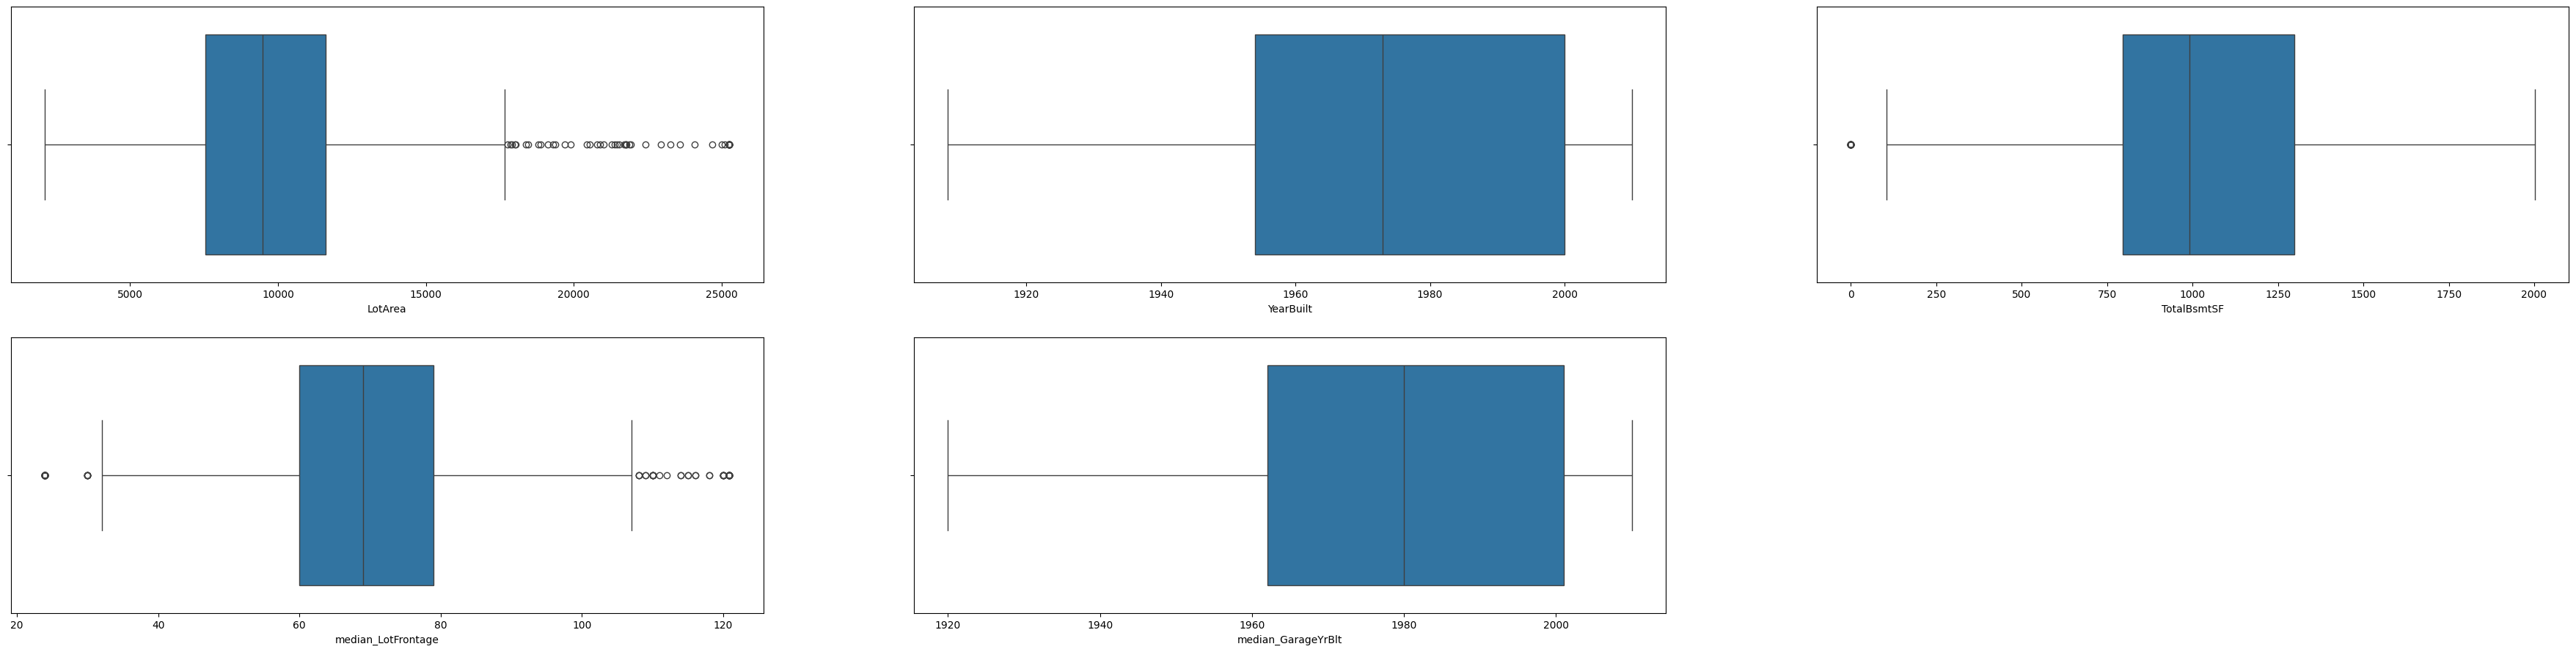

In [ ]:
plt.figure(figsize=[45,40])
columns_to_plot = non_cat_features[features_to_upper_cap]
print("The numbers of columns", non_cat_features[features_to_upper_cap].columns.shape)
for i, column in enumerate(columns_to_plot):
  plt.subplot(7,3,i+1)
  sns.boxplot(x=non_cat_features[features_to_upper_cap][column])
plt.show()

Observation : Performed the basic outlier capping for continous data at lower quantile range of 2% and upper quantile range  of 98% without much regious detailing to avoid data removal due to limited dataset records

In [ ]:
non_cat_features.shape

(1460, 23)

In [ ]:
non_cat_features.isna().sum()

MSSubClass            0
LotArea               0
YearBuilt             0
YearRemodAdd          0
BsmtFinSF1            0
BsmtFinSF2            0
BsmtUnfSF             0
TotalBsmtSF           0
1stFlrSF              0
2ndFlrSF              0
LowQualFinSF          0
GrLivArea             0
GarageArea            0
WoodDeckSF            0
OpenPorchSF           0
EnclosedPorch         0
3SsnPorch             0
ScreenPorch           0
MiscVal               0
SalePrice             0
median_LotFrontage    0
median_GarageYrBlt    0
median_MasVnrArea     0
dtype: int64

In [ ]:
new_df = pd.concat([chi_sqaure_features, non_cat_features], axis=1)

In [ ]:
print(new_df.shape)
new_df.head()

(1460, 30)


TotRmsAbvGrd GarageFinish KitchenQual BsmtQual ExterQual  FullBath  \
0             8          RFn          Gd       Gd        Gd         2   
1             6          RFn          TA       Gd        TA         2   
2             6          RFn          Gd       Gd        Gd         2   
3             7          Unf          Gd       TA        TA         1   
4             9          RFn          Gd       Gd        Gd         2   

   OverallQual  MSSubClass  LotArea  YearBuilt  YearRemodAdd  BsmtFinSF1  \
0            7        60.0   8450.0     2003.0          2003       706.0   
1            6        20.0   9600.0     1976.0          1976       978.0   
2            7        60.0  11250.0     2001.0          2002       486.0   
3            7        70.0   9550.0     1915.0          1970       216.0   
4            8        60.0  14260.0     2000.0          2000       655.0   

   BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0         0.0      150.0        856.0     856.0     854.0           0.0   
1         0.0      284.0       1262.0    1262.0       0.0           0.0   
2         0.0      434.0        920.0     920.0     866.0           0.0   
3         0.0      540.0        756.0     961.0     756.0           0.0   
4         0.0      490.0       1145.0    1145.0    1053.0           0.0   

   GrLivArea  GarageArea  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  \
0     1710.0       548.0         0.0         61.0           0.00        0.0   
1     1262.0       460.0       298.0          0.0           0.00        0.0   
2     1786.0       608.0         0.0         42.0           0.00        0.0   
3     1717.0       642.0         0.0         35.0         235.64        0.0   
4     2198.0       836.0       192.0         84.0           0.00        0.0   

   ScreenPorch  MiscVal  SalePrice  median_LotFrontage  median_GarageYrBlt  \
0          0.0      0.0   208500.0                65.0              2003.0   
1          0.0      0.0   181500.0                80.0              1976.0   
2          0.0      0.0   223500.0                68.0              2001.0   
3          0.0      0.0   140000.0                60.0              1998.0   
4          0.0      0.0   250000.0                84.0              2000.0   

   median_MasVnrArea  
0              196.0  
1                0.0  
2              162.0  
3                0.0  
4              350.0

3. One Hot Encoding

In [ ]:
object_column_values = new_df.select_dtypes(include=['object'])
object_column_values.columns

Index(['GarageFinish', 'KitchenQual', 'BsmtQual', 'ExterQual'], dtype='object')

In [ ]:
# new_df = pd.get_dummies(new_df, columns=['LotConfig', 'GarageFinish', 'KitchenQual', 'MSZoning', 'LotShape',
#        'BsmtQual', 'Foundation', 'ExterQual', 'MasVnrType', 'Neighborhood',
#        'BsmtExposure'], drop_first=True)

new_df = pd.get_dummies(new_df, columns=['GarageFinish', 'KitchenQual', 'BsmtQual', 'ExterQual'], drop_first=True)

In [ ]:
print(new_df.shape)
new_df.head()

(1460, 37)


TotRmsAbvGrd  FullBath  OverallQual  MSSubClass  LotArea  YearBuilt  \
0             8         2            7        60.0   8450.0     2003.0   
1             6         2            6        20.0   9600.0     1976.0   
2             6         2            7        60.0  11250.0     2001.0   
3             7         1            7        70.0   9550.0     1915.0   
4             9         2            8        60.0  14260.0     2000.0   

   YearRemodAdd  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  1stFlrSF  \
0          2003       706.0         0.0      150.0        856.0     856.0   
1          1976       978.0         0.0      284.0       1262.0    1262.0   
2          2002       486.0         0.0      434.0        920.0     920.0   
3          1970       216.0         0.0      540.0        756.0     961.0   
4          2000       655.0         0.0      490.0       1145.0    1145.0   

   2ndFlrSF  LowQualFinSF  GrLivArea  GarageArea  WoodDeckSF  OpenPorchSF  \
0     854.0           0.0     1710.0       548.0         0.0         61.0   
1       0.0           0.0     1262.0       460.0       298.0          0.0   
2     866.0           0.0     1786.0       608.0         0.0         42.0   
3     756.0           0.0     1717.0       642.0         0.0         35.0   
4    1053.0           0.0     2198.0       836.0       192.0         84.0   

   EnclosedPorch  3SsnPorch  ScreenPorch  MiscVal  SalePrice  \
0           0.00        0.0          0.0      0.0   208500.0   
1           0.00        0.0          0.0      0.0   181500.0   
2           0.00        0.0          0.0      0.0   223500.0   
3         235.64        0.0          0.0      0.0   140000.0   
4           0.00        0.0          0.0      0.0   250000.0   

   median_LotFrontage  median_GarageYrBlt  median_MasVnrArea  \
0                65.0              2003.0              196.0   
1                80.0              1976.0                0.0   
2                68.0              2001.0              162.0   
3                60.0              1998.0                0.0   
4                84.0              2000.0              350.0   

   GarageFinish_RFn  GarageFinish_Unf  KitchenQual_Fa  KitchenQual_Gd  \
0                 1                 0               0               1   
1                 1                 0               0               0   
2                 1                 0               0               1   
3                 0                 1               0               1   
4                 1                 0               0               1   

   KitchenQual_TA  BsmtQual_Fa  BsmtQual_Gd  BsmtQual_TA  ExterQual_Fa  \
0               0            0            1            0             0   
1               1            0            1            0             0   
2               0            0            1            0             0   
3               0            0            0            1             0   
4               0            0            1            0             0   

   ExterQual_Gd  ExterQual_TA  
0             1             0  
1             0             1  
2             1             0  
3             0             1  
4             1             0

In [ ]:
X = new_df.drop(columns=['SalePrice'])
y = new_df['SalePrice']

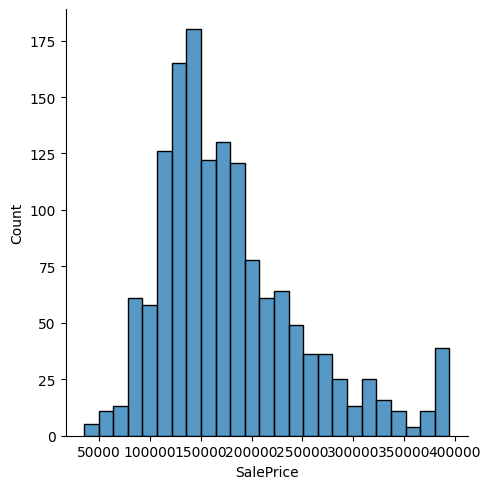

In [ ]:
sns.displot(y)

In [ ]:
# Applying the log1p transformation to the target variable
y_transformed = np.log1p(y)

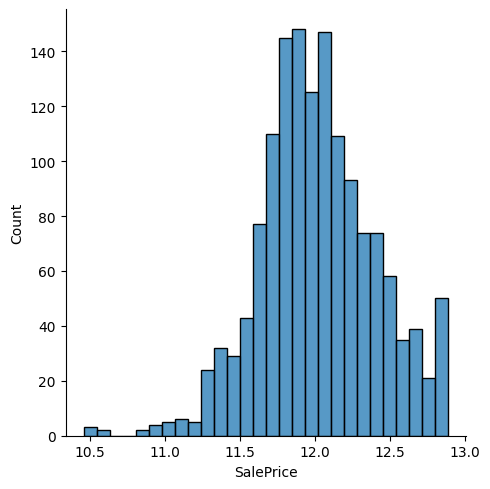

In [ ]:
sns.displot(y_transformed)

Train - Test Split

In [ ]:
from sklearn.model_selection import train_test_split

# Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y_transformed, test_size=0.2, random_state=42)

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1168, 36), (292, 36), (1168,), (292,))

In [ ]:
X_train.head()

TotRmsAbvGrd  FullBath  OverallQual  MSSubClass  LotArea  YearBuilt  \
254              5         1            5        20.0   8400.0     1957.0   
1066             7         2            6        60.0   7837.0     1993.0   
638              4         1            5        30.0   8777.0     1910.0   
799              7         1            5        50.0   7200.0     1937.0   
380              6         2            5        50.0   5000.0     1924.0   

      YearRemodAdd  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  1stFlrSF  \
254           1957       922.0         0.0      392.0       1314.0    1314.0   
1066          1994         0.0         0.0      799.0        799.0     799.0   
638           1950         0.0         0.0      796.0        796.0     796.0   
799           1950       569.0         0.0      162.0        731.0     981.0   
380           1950       218.0         0.0      808.0       1026.0    1026.0   

      2ndFlrSF  LowQualFinSF  GrLivArea  GarageArea  WoodDeckSF  OpenPorchSF  \
254        0.0           0.0     1314.0       294.0       250.0          0.0   
1066     772.0           0.0     1571.0       380.0         0.0         40.0   
638        0.0           0.0      796.0         0.0       328.0          0.0   
799      787.0           0.0     1768.0       240.0         0.0          0.0   
380      665.0           0.0     1691.0       308.0         0.0          0.0   

      EnclosedPorch  3SsnPorch  ScreenPorch  MiscVal  median_LotFrontage  \
254            0.00        0.0          0.0      0.0                70.0   
1066           0.00        0.0          0.0      0.0                59.0   
638          164.00        0.0          0.0      0.0                67.0   
799          235.64        0.0          0.0      0.0                60.0   
380          235.64        0.0          0.0      0.0                50.0   

      median_GarageYrBlt  median_MasVnrArea  GarageFinish_RFn  \
254               1957.0                0.0                 1   
1066              1993.0                0.0                 1   
638               1980.0                0.0                 0   
799               1939.0              252.0                 0   
380               1924.0                0.0                 0   

      GarageFinish_Unf  KitchenQual_Fa  KitchenQual_Gd  KitchenQual_TA  \
254                  0               0               0               1   
1066                 0               0               0               1   
638                  1               0               0               1   
799                  1               0               1               0   
380                  1               0               1               0   

      BsmtQual_Fa  BsmtQual_Gd  BsmtQual_TA  ExterQual_Fa  ExterQual_Gd  \
254             0            0            1             0             0   
1066            0            1            0             0             1   
638             1            0            0             0             0   
799             0            1            0             0             0   
380             0            0            1             0             0   

      ExterQual_TA  
254              1  
1066             0  
638              1  
799              1  
380              1

Scaling Transformation

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train[X_train.columns] = scaler.fit_transform(X_train[X_train.columns])

In [ ]:
# applying the scaling on test dataset
scaler = StandardScaler()
X_test[X_test.columns] = scaler.fit_transform(X_test[X_test.columns])

In [ ]:
X_train.head()

TotRmsAbvGrd  FullBath  OverallQual  MSSubClass   LotArea  YearBuilt  \
254      -0.964566 -1.055566    -0.820445   -0.868496 -0.369459  -0.480223   
1066      0.270755  0.773664    -0.088934    0.075363 -0.501861   0.727406   
638      -1.582227 -1.055566    -0.820445   -0.632531 -0.280798  -2.056851   
799       0.270755 -1.055566    -0.820445   -0.160602 -0.651666  -1.151129   
380      -0.346905  0.773664    -0.820445   -0.160602 -1.169047  -1.587217   

      YearRemodAdd  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  1stFlrSF  \
254      -1.346063    1.141932   -0.302811  -0.401617     0.659767  0.422954   
1066      0.439214   -1.036438   -0.302811   0.532307    -0.638655 -1.015266   
638      -1.683818   -1.036438   -0.302811   0.525423    -0.646218 -1.023644   
799      -1.683818    0.307914   -0.302811  -0.929387    -0.810097 -0.507002   
380      -1.683818   -0.521379   -0.302811   0.552959    -0.066341 -0.381332   

      2ndFlrSF  LowQualFinSF  GrLivArea  GarageArea  WoodDeckSF  OpenPorchSF  \
254  -0.810982           0.0  -0.421216   -0.880768    1.307312    -0.774284   
1066  0.983673           0.0   0.115228   -0.459353   -0.776997    -0.125610   
638  -0.810982           0.0  -1.502453   -2.321417    1.957617    -0.774284   
799   1.018543           0.0   0.526432   -1.145377   -0.776997    -0.774284   
380   0.734932           0.0   0.365707   -0.812165   -0.776997    -0.774284   

      EnclosedPorch  3SsnPorch  ScreenPorch   MiscVal  median_LotFrontage  \
254       -0.363233        0.0     -0.28955 -0.197011            0.030590   
1066      -0.363233        0.0     -0.28955 -0.197011           -0.556604   
638        2.493723        0.0     -0.28955 -0.197011           -0.129554   
799        3.741725        0.0     -0.28955 -0.197011           -0.503223   
380        3.741725        0.0     -0.28955 -0.197011           -1.037036   

      median_GarageYrBlt  median_MasVnrArea  GarageFinish_RFn  \
254            -0.919438          -0.627327          1.563786   
1066            0.596126          -0.627327          1.563786   
638             0.048839          -0.627327         -0.639474   
799            -1.677220           0.949739         -0.639474   
380            -2.308705          -0.627327         -0.639474   

      GarageFinish_Unf  KitchenQual_Fa  KitchenQual_Gd  KitchenQual_TA  \
254          -0.933700       -0.167836       -0.820581        0.991475   
1066         -0.933700       -0.167836       -0.820581        0.991475   
638           1.071008       -0.167836       -0.820581        0.991475   
799           1.071008       -0.167836        1.218649       -1.008599   
380           1.071008       -0.167836        1.218649       -1.008599   

      BsmtQual_Fa  BsmtQual_Gd  BsmtQual_TA  ExterQual_Fa  ExterQual_Gd  \
254     -0.159565    -0.854617     1.061840     -0.097506     -0.705291   
1066    -0.159565     1.170115    -0.941761     -0.097506      1.417854   
638      6.267046    -0.854617    -0.941761     -0.097506     -0.705291   
799     -0.159565     1.170115    -0.941761     -0.097506     -0.705291   
380     -0.159565    -0.854617     1.061840     -0.097506     -0.705291   

      ExterQual_TA  
254       0.778847  
1066     -1.283949  
638       0.778847  
799       0.778847  
380       0.778847

In [ ]:
X_test.head()

TotRmsAbvGrd  FullBath  OverallQual  MSSubClass   LotArea  YearBuilt  \
892      -0.209302 -0.916735    -0.007138   -0.897234 -0.273304  -0.344703   
1105      1.624185  0.856025     1.382350    0.070742  0.631637   0.768051   
413      -0.820464 -0.916735    -0.701882   -0.655240 -0.144699  -1.636934   
522       0.401860  0.856025    -0.007138   -0.171252 -1.077434  -0.919028   
1036     -0.209302  0.856025     2.077094   -0.897234  0.782853   1.234690   

      YearRemodAdd  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  1stFlrSF  \
892       0.900090    0.547104   -0.327691  -0.374001     0.066704 -0.166618   
1105      0.505752    1.408712   -0.327691  -0.289037     1.065989  1.031377   
413      -1.712399   -1.000988   -0.327691   1.111655    -0.059444 -0.277544   
522      -1.712399   -0.069331   -0.327691   0.133355    -0.069338 -0.344099   
1036      1.146551    1.385362   -0.327691   0.116362     1.454326  1.364153   

      2ndFlrSF  LowQualFinSF  GrLivArea  GarageArea  WoodDeckSF  OpenPorchSF  \
892  -0.776572           0.0  -0.787980   -0.903137    0.992206    -0.705166   
1105  1.921518           0.0   2.342525    1.207278    0.935339    -0.058077   
413  -0.776572           0.0  -0.868559   -0.450905   -0.827520    -0.705166   
522   0.810540           0.0   0.412651   -0.168260   -0.827520    -0.219849   
1036 -0.776572           0.0   0.324014    2.128041    1.333404    -0.705166   

      EnclosedPorch  3SsnPorch  ScreenPorch   MiscVal  median_LotFrontage  \
892       -0.399106        0.0    -0.255887 -0.158323            0.073842   
1105      -0.399106        0.0    -0.255887 -0.158323            1.575366   
413        1.966508        0.0    -0.255887 -0.158323           -0.676920   
522        0.255987        0.0    -0.255887 -0.158323           -0.998675   
1036      -0.399106        0.0    -0.255887 -0.158323            1.092733   

      median_GarageYrBlt  median_MasVnrArea  GarageFinish_RFn  \
892            -0.630330          -0.575400          1.586843   
1105            0.672055           1.701781          1.586843   
413            -2.142777          -0.575400         -0.630182   
522            -1.176492          -0.575400         -0.630182   
1036            1.260229          -0.135061         -0.630182   

      GarageFinish_Unf  KitchenQual_Fa  KitchenQual_Gd  KitchenQual_TA  \
892          -0.972968       -0.156721       -0.811844             1.0   
1105         -0.972968       -0.156721        1.231764            -1.0   
413           1.027783       -0.156721       -0.811844             1.0   
522           1.027783       -0.156721       -0.811844             1.0   
1036         -0.972968       -0.156721       -0.811844            -1.0   

      BsmtQual_Fa  BsmtQual_Gd  BsmtQual_TA  ExterQual_Fa  ExterQual_Gd  \
892     -0.144841    -0.865161     1.063667     -0.101885     -0.721688   
1105    -0.144841    -0.865161    -0.940144     -0.101885      1.385641   
413     -0.144841    -0.865161     1.063667     -0.101885     -0.721688   
522     -0.144841    -0.865161     1.063667     -0.101885     -0.721688   
1036    -0.144841    -0.865161    -0.940144     -0.101885      1.385641   

      ExterQual_TA  
892       0.794534  
1105     -1.258599  
413       0.794534  
522       0.794534  
1036     -1.258599

Feature Selection

In [ ]:
import statsmodels.api as sm

# Add a constant
X_train_sample = sm.add_constant(X_train)

# Create a first fitted model
lr1 = sm.OLS(y_train, X_train_sample).fit()

# Print a summary of the linear regression model obtained
print(lr1.summary())

#Drop the constant term
X_train_sample.drop(['const'], axis=1, inplace=True)

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.871
Model:                            OLS   Adj. R-squared:                  0.868
Method:                 Least Squares   F-statistic:                     225.9
Date:                Tue, 19 Mar 2024   Prob (F-statistic):               0.00
Time:                        11:50:12   Log-Likelihood:                 664.75
No. Observations:                1168   AIC:                            -1260.
Df Residuals:                    1133   BIC:                            -1082.
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 12.0275      0

In [ ]:
# Taking the hard copy of X_train and y_test

import copy

X_label = copy.deepcopy(X_train)

y_label = copy.deepcopy(y_train)

In [ ]:
X_label.shape

(1168, 36)

Performing the Feature Importance - Selection Technique

In [ ]:
# Technique 1 - Correlation Analysis

# Calculate correlation coefficients between features with target variable
correlations = X_label.corrwith(y_label)

# Convert Series to DataFrame
fi_df1 = pd.DataFrame({'feature': X_label.columns,'corr_importance': correlations}).sort_values(by='corr_importance', ascending=False).reset_index(drop=True)

# Display DataFrame
fi_df1

feature  corr_importance
0          OverallQual         0.806222
1            GrLivArea         0.712126
2           GarageArea         0.661958
3          TotalBsmtSF         0.631787
4             1stFlrSF         0.601724
5            YearBuilt         0.594846
6             FullBath         0.581599
7         YearRemodAdd         0.567405
8         TotRmsAbvGrd         0.512598
9         ExterQual_Gd         0.507438
10  median_GarageYrBlt         0.487658
11             LotArea         0.418694
12   median_MasVnrArea         0.413963
13      KitchenQual_Gd         0.407932
14         BsmtQual_Gd         0.350125
15          WoodDeckSF         0.350066
16          BsmtFinSF1         0.347896
17         OpenPorchSF         0.346717
18  median_LotFrontage         0.344506
19            2ndFlrSF         0.299676
20    GarageFinish_RFn         0.243919
21           BsmtUnfSF         0.227625
22         ScreenPorch         0.113595
23          BsmtFinSF2        -0.005543
24             MiscVal        -0.049568
25          MSSubClass        -0.079075
26         BsmtQual_Fa        -0.159325
27        ExterQual_Fa        -0.168824
28       EnclosedPorch        -0.188261
29      KitchenQual_Fa        -0.222981
30      KitchenQual_TA        -0.531205
31         BsmtQual_TA        -0.543835
32    GarageFinish_Unf        -0.579479
33        ExterQual_TA        -0.585725
34        LowQualFinSF              NaN
35           3SsnPorch              NaN

In [ ]:
# Technique 2 - Random Forest Feature Importance

from sklearn.ensemble import RandomForestRegressor

# Train a Random Forest regressor on label encoded data
rf_label = RandomForestRegressor(n_estimators=100, random_state=42)
rf_label.fit(X_label, y_label)

# Extract feature importance scores for label encoded data
fi_df2 = pd.DataFrame({
    'feature': X_label.columns,
    'rf_importance': rf_label.feature_importances_
}).sort_values(by='rf_importance', ascending=False)

fi_df2

feature  rf_importance
2          OverallQual       0.560985
14           GrLivArea       0.127822
10         TotalBsmtSF       0.050808
15          GarageArea       0.050287
7           BsmtFinSF1       0.026631
11            1stFlrSF       0.025531
5            YearBuilt       0.022616
4              LotArea       0.022427
6         YearRemodAdd       0.015714
26    GarageFinish_Unf       0.015442
22  median_LotFrontage       0.010770
17         OpenPorchSF       0.010393
9            BsmtUnfSF       0.009430
12            2ndFlrSF       0.007375
23  median_GarageYrBlt       0.007033
16          WoodDeckSF       0.006505
3           MSSubClass       0.004740
31         BsmtQual_Gd       0.003658
18       EnclosedPorch       0.003571
0         TotRmsAbvGrd       0.003418
24   median_MasVnrArea       0.003120
28      KitchenQual_Gd       0.001899
1             FullBath       0.001259
8           BsmtFinSF2       0.001165
29      KitchenQual_TA       0.001115
32         BsmtQual_TA       0.001076
27      KitchenQual_Fa       0.000976
35        ExterQual_TA       0.000935
34        ExterQual_Gd       0.000912
20         ScreenPorch       0.000758
25    GarageFinish_RFn       0.000574
30         BsmtQual_Fa       0.000514
21             MiscVal       0.000370
33        ExterQual_Fa       0.000171
19           3SsnPorch       0.000000
13        LowQualFinSF       0.000000

In [ ]:
# Technique 3 - Gradient Boosting Feature importances

from sklearn.ensemble import GradientBoostingRegressor

# Train a Random Forest regressor on label encoded data
gb_label = GradientBoostingRegressor()
gb_label.fit(X_label, y_label)

# Extract feature importance scores for label encoded data
fi_df3 = pd.DataFrame({
    'feature': X_label.columns,
    'gb_importance': gb_label.feature_importances_
}).sort_values(by='gb_importance', ascending=False)

fi_df3

feature  gb_importance
2          OverallQual       0.464333
14           GrLivArea       0.190703
10         TotalBsmtSF       0.054376
15          GarageArea       0.049358
26    GarageFinish_Unf       0.041131
6         YearRemodAdd       0.036148
5            YearBuilt       0.035573
7           BsmtFinSF1       0.032946
4              LotArea       0.028587
11            1stFlrSF       0.014816
29      KitchenQual_TA       0.009562
12            2ndFlrSF       0.006193
23  median_GarageYrBlt       0.005643
17         OpenPorchSF       0.005572
1             FullBath       0.004295
22  median_LotFrontage       0.003896
16          WoodDeckSF       0.003636
20         ScreenPorch       0.002690
9            BsmtUnfSF       0.002666
0         TotRmsAbvGrd       0.001497
24   median_MasVnrArea       0.001359
32         BsmtQual_TA       0.001129
8           BsmtFinSF2       0.001038
18       EnclosedPorch       0.000873
33        ExterQual_Fa       0.000529
30         BsmtQual_Fa       0.000349
27      KitchenQual_Fa       0.000344
34        ExterQual_Gd       0.000191
25    GarageFinish_RFn       0.000160
3           MSSubClass       0.000131
31         BsmtQual_Gd       0.000117
35        ExterQual_TA       0.000106
28      KitchenQual_Gd       0.000051
21             MiscVal       0.000002
19           3SsnPorch       0.000000
13        LowQualFinSF       0.000000

In [ ]:
# Technique 4 - Permutation Importance

from sklearn.inspection import permutation_importance
from sklearn.model_selection import train_test_split

X_train_label, X_test_label, y_train_label, y_test_label = train_test_split(X_label, y_label, test_size=0.2, random_state=42)

# Train a Random Forest regressor on label encoded data
rf_label = RandomForestRegressor(n_estimators=100, random_state=42)
rf_label.fit(X_train_label, y_train_label)

# Calculate Permutation Importance
perm_importance = permutation_importance(rf_label, X_test_label, y_test_label, n_repeats=30, random_state=42)

# Organize results into a DataFrame
fi_df4 = pd.DataFrame({
    'feature': X_label.columns,
    'permutation_importance': perm_importance.importances_mean
}).sort_values(by='permutation_importance', ascending=False)

fi_df4

feature  permutation_importance
2          OverallQual                0.349222
14           GrLivArea                0.153353
10         TotalBsmtSF                0.022782
15          GarageArea                0.018517
7           BsmtFinSF1                0.014125
11            1stFlrSF                0.012437
5            YearBuilt                0.010407
6         YearRemodAdd                0.010230
4              LotArea                0.005686
26    GarageFinish_Unf                0.005077
12            2ndFlrSF                0.004695
9            BsmtUnfSF                0.003812
3           MSSubClass                0.002527
17         OpenPorchSF                0.002284
23  median_GarageYrBlt                0.001660
29      KitchenQual_TA                0.001306
1             FullBath                0.001149
34        ExterQual_Gd                0.000892
28      KitchenQual_Gd                0.000834
0         TotRmsAbvGrd                0.000426
8           BsmtFinSF2                0.000414
20         ScreenPorch                0.000141
25    GarageFinish_RFn                0.000060
21             MiscVal                0.000012
33        ExterQual_Fa                0.000002
19           3SsnPorch                0.000000
13        LowQualFinSF                0.000000
30         BsmtQual_Fa               -0.000165
32         BsmtQual_TA               -0.000313
18       EnclosedPorch               -0.000349
35        ExterQual_TA               -0.000566
24   median_MasVnrArea               -0.000667
31         BsmtQual_Gd               -0.000745
16          WoodDeckSF               -0.000766
22  median_LotFrontage               -0.000975
27      KitchenQual_Fa               -0.000999

In [ ]:
# Technique 5 - LASSO

from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler

# # Standardize the features
# scaler = StandardScaler()
# X_scaled = scaler.fit_transform(X_label)

# Train a LASSO regression model
# We'll use a relatively small value for alpha (the regularization strength) for demonstration purposes
lasso = Lasso(alpha=0.01, random_state=42)
lasso.fit(X_label, y_label)

# Extract coefficients
fi_df5 = pd.DataFrame({
    'feature': X_label.columns,
    'lasso_coeff': lasso.coef_
}).sort_values(by='lasso_coeff', ascending=False)

fi_df5

feature  lasso_coeff
14           GrLivArea     0.114251
2          OverallQual     0.112340
5            YearBuilt     0.041823
6         YearRemodAdd     0.038877
15          GarageArea     0.037466
7           BsmtFinSF1     0.037282
10         TotalBsmtSF     0.035882
4              LotArea     0.030797
20         ScreenPorch     0.008367
16          WoodDeckSF     0.008366
24   median_MasVnrArea     0.000000
22  median_LotFrontage     0.000000
23  median_GarageYrBlt    -0.000000
0         TotRmsAbvGrd     0.000000
25    GarageFinish_RFn     0.000000
28      KitchenQual_Gd     0.000000
30         BsmtQual_Fa    -0.000000
31         BsmtQual_Gd     0.000000
34        ExterQual_Gd     0.000000
21             MiscVal    -0.000000
18       EnclosedPorch    -0.000000
19           3SsnPorch     0.000000
1             FullBath     0.000000
17         OpenPorchSF     0.000000
13        LowQualFinSF     0.000000
12            2ndFlrSF     0.000000
11            1stFlrSF     0.000000
9            BsmtUnfSF    -0.000000
8           BsmtFinSF2     0.000000
35        ExterQual_TA    -0.000000
27      KitchenQual_Fa    -0.000959
32         BsmtQual_TA    -0.003709
33        ExterQual_Fa    -0.003786
3           MSSubClass    -0.008768
29      KitchenQual_TA    -0.011900
26    GarageFinish_Unf    -0.018066

In [ ]:
# Technique 6 - RFE

from sklearn.feature_selection import RFE

# Initialize the base estimator
estimator = RandomForestRegressor()

# Apply RFE on the label-encoded and standardized training data
selector_label = RFE(estimator, n_features_to_select=X_label.shape[1], step=1)
selector_label = selector_label.fit(X_label, y_label)

# Get the selected features based on RFE
selected_features = X_label.columns[selector_label.support_]

# Extract the coefficients for the selected features from the underlying linear regression model
selected_coefficients = selector_label.estimator_.feature_importances_

# Organize the results into a DataFrame
fi_df6 = pd.DataFrame({
    'feature': selected_features,
    'rfe_score': selected_coefficients
}).sort_values(by='rfe_score', ascending=False)

fi_df6

feature  rfe_score
2          OverallQual   0.559593
14           GrLivArea   0.132441
10         TotalBsmtSF   0.051004
15          GarageArea   0.047223
11            1stFlrSF   0.031127
7           BsmtFinSF1   0.026343
5            YearBuilt   0.024328
4              LotArea   0.020373
6         YearRemodAdd   0.018612
17         OpenPorchSF   0.009874
9            BsmtUnfSF   0.009765
22  median_LotFrontage   0.009632
26    GarageFinish_Unf   0.009486
23  median_GarageYrBlt   0.007574
12            2ndFlrSF   0.006458
3           MSSubClass   0.005039
16          WoodDeckSF   0.005021
24   median_MasVnrArea   0.003999
31         BsmtQual_Gd   0.003699
18       EnclosedPorch   0.003508
0         TotRmsAbvGrd   0.003423
1             FullBath   0.001631
28      KitchenQual_Gd   0.001392
35        ExterQual_TA   0.001197
27      KitchenQual_Fa   0.001141
29      KitchenQual_TA   0.000994
8           BsmtFinSF2   0.000987
34        ExterQual_Gd   0.000905
25    GarageFinish_RFn   0.000761
20         ScreenPorch   0.000674
32         BsmtQual_TA   0.000631
30         BsmtQual_Fa   0.000545
33        ExterQual_Fa   0.000336
21             MiscVal   0.000287
19           3SsnPorch   0.000000
13        LowQualFinSF   0.000000

In [ ]:
# Technique 7 - Linear Regression Weights

from sklearn.linear_model import LinearRegression

# Train a linear regression model
lin_reg = LinearRegression()
lin_reg.fit(X_label, y_label)

# Extract coefficients
fi_df7 = pd.DataFrame({
    'feature': X_label.columns,
    'reg_coeffs': lin_reg.coef_
}).sort_values(by='reg_coeffs', ascending=False)

fi_df7

feature    reg_coeffs
14           GrLivArea  1.875112e-01
10         TotalBsmtSF  1.090053e-01
2          OverallQual  1.042162e-01
5            YearBuilt  6.048979e-02
6         YearRemodAdd  4.328246e-02
15          GarageArea  3.935410e-02
4              LotArea  3.108116e-02
20         ScreenPorch  1.629719e-02
16          WoodDeckSF  1.412619e-02
34        ExterQual_Gd  3.639353e-03
18       EnclosedPorch  1.238206e-03
35        ExterQual_TA  1.186240e-03
25    GarageFinish_RFn  8.950488e-04
17         OpenPorchSF  1.147076e-04
21             MiscVal  3.215912e-05
19           3SsnPorch  6.591949e-17
13        LowQualFinSF -2.498002e-16
22  median_LotFrontage -1.426504e-03
1             FullBath -3.825166e-03
0         TotRmsAbvGrd -4.043768e-03
24   median_MasVnrArea -7.282782e-03
30         BsmtQual_Fa -8.015323e-03
33        ExterQual_Fa -9.073839e-03
31         BsmtQual_Gd -9.470894e-03
28      KitchenQual_Gd -9.814226e-03
27      KitchenQual_Fa -1.048561e-02
26    GarageFinish_Unf -1.769747e-02
3           MSSubClass -1.911715e-02
32         BsmtQual_TA -2.240608e-02
8           BsmtFinSF2 -2.443566e-02
23  median_GarageYrBlt -2.719126e-02
29      KitchenQual_TA -3.015767e-02
7           BsmtFinSF1 -4.040550e-02
11            1stFlrSF -4.722388e-02
12            2ndFlrSF -5.239583e-02
9            BsmtUnfSF -8.693155e-02

In [ ]:
# Technique 8 - SHAP

In [ ]:
!pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 538.2/538.2 kB 6.0 MB/s eta 0:00:00


In [ ]:
import shap

# Compute SHAP values using the trained Random Forest model
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_label, y_label)

explainer = shap.TreeExplainer(rf)
shap_values = explainer.shap_values(X_label)

# Summing the absolute SHAP values across all samples to get an overall measure of feature importance
shap_sum = np.abs(shap_values).mean(axis=0)

shap_values

array([[-1.63088437e-03, -1.43604772e-03, -1.43794681e-01, ...,
         3.64093345e-05,  1.41517742e-04, -5.38505466e-04],
       [-6.03821524e-04,  1.80554981e-03, -8.45923283e-02, ...,
         3.20592175e-05,  3.57935243e-04,  2.28310155e-04],
       [-1.73940784e-03, -1.82484345e-03, -2.10443653e-01, ...,
         8.58875081e-05,  5.13706005e-05,  2.51520269e-04],
       ...,
       [-1.28219824e-03, -1.17946468e-03, -1.91577374e-01, ...,
         1.68114318e-04,  6.41909685e-05, -3.70057518e-04],
       [-1.30723992e-03, -1.59824753e-03,  1.97966481e-01, ...,
         6.40106928e-05,  7.56796460e-04,  1.01863311e-03],
       [-2.20125851e-03,  8.24950571e-04,  1.11927915e-01, ...,
         4.13792997e-05,  2.37047435e-04,  8.49768644e-04]])

In [ ]:
fi_df8 = pd.DataFrame({
    'feature': X_label.columns,
    'SHAP_score': np.abs(shap_values).mean(axis=0)
}).sort_values(by='SHAP_score', ascending=False)

fi_df8

feature  SHAP_score
2          OverallQual    0.188822
14           GrLivArea    0.082505
10         TotalBsmtSF    0.030095
15          GarageArea    0.026117
7           BsmtFinSF1    0.025238
5            YearBuilt    0.016990
6         YearRemodAdd    0.016273
4              LotArea    0.015914
26    GarageFinish_Unf    0.015793
11            1stFlrSF    0.013949
12            2ndFlrSF    0.006381
9            BsmtUnfSF    0.005783
17         OpenPorchSF    0.004810
16          WoodDeckSF    0.004080
22  median_LotFrontage    0.003907
23  median_GarageYrBlt    0.003714
3           MSSubClass    0.003692
31         BsmtQual_Gd    0.002317
18       EnclosedPorch    0.002198
24   median_MasVnrArea    0.001780
0         TotRmsAbvGrd    0.001470
29      KitchenQual_TA    0.001440
28      KitchenQual_Gd    0.001297
1             FullBath    0.001265
32         BsmtQual_TA    0.001188
35        ExterQual_TA    0.000726
20         ScreenPorch    0.000690
34        ExterQual_Gd    0.000569
27      KitchenQual_Fa    0.000521
25    GarageFinish_RFn    0.000412
8           BsmtFinSF2    0.000354
30         BsmtQual_Fa    0.000309
21             MiscVal    0.000198
33        ExterQual_Fa    0.000068
19           3SsnPorch    0.000000
13        LowQualFinSF    0.000000

In [ ]:
final_fi_df = fi_df1.merge(fi_df2,on='feature').merge(fi_df3,on='feature').merge(fi_df4,on='feature').merge(fi_df5,on='feature').merge(fi_df6,on='feature').merge(fi_df7,on='feature').merge(fi_df8,on='feature').set_index('feature')

In [ ]:
# normalize the score
final_fi_df = final_fi_df.divide(final_fi_df.sum(axis=0), axis=1)
final_fi_df

corr_importance  rf_importance  gb_importance  \
feature                                                             
OverallQual                0.108710       0.560985       0.464333   
GrLivArea                  0.096022       0.127822       0.190703   
GarageArea                 0.089258       0.050287       0.049358   
TotalBsmtSF                0.085189       0.050808       0.054376   
1stFlrSF                   0.081136       0.025531       0.014816   
YearBuilt                  0.080208       0.022616       0.035573   
FullBath                   0.078422       0.001259       0.004295   
YearRemodAdd               0.076508       0.015714       0.036148   
TotRmsAbvGrd               0.069118       0.003418       0.001497   
ExterQual_Gd               0.068422       0.000912       0.000191   
median_GarageYrBlt         0.065755       0.007033       0.005643   
LotArea                    0.056456       0.022427       0.028587   
median_MasVnrArea          0.055818       0.003120       0.001359   
KitchenQual_Gd             0.055005       0.001899       0.000051   
BsmtQual_Gd                0.047211       0.003658       0.000117   
WoodDeckSF                 0.047203       0.006505       0.003636   
BsmtFinSF1                 0.046910       0.026631       0.032946   
OpenPorchSF                0.046751       0.010393       0.005572   
median_LotFrontage         0.046453       0.010770       0.003896   
2ndFlrSF                   0.040408       0.007375       0.006193   
GarageFinish_RFn           0.032890       0.000574       0.000160   
BsmtUnfSF                  0.030693       0.009430       0.002666   
ScreenPorch                0.015317       0.000758       0.002690   
BsmtFinSF2                -0.000747       0.001165       0.001038   
MiscVal                   -0.006684       0.000370       0.000002   
MSSubClass                -0.010662       0.004740       0.000131   
BsmtQual_Fa               -0.021483       0.000514       0.000349   
ExterQual_Fa              -0.022764       0.000171       0.000529   
EnclosedPorch             -0.025385       0.003571       0.000873   
KitchenQual_Fa            -0.030067       0.000976       0.000344   
KitchenQual_TA            -0.071627       0.001115       0.009562   
BsmtQual_TA               -0.073330       0.001076       0.001129   
GarageFinish_Unf          -0.078136       0.015442       0.041131   
ExterQual_TA              -0.078979       0.000935       0.000106   
LowQualFinSF                    NaN       0.000000       0.000000   
3SsnPorch                       NaN       0.000000       0.000000   

                    permutation_importance  lasso_coeff  rfe_score  \
feature                                                              
OverallQual                       0.566453     0.268587   0.559593   
GrLivArea                         0.248745     0.273157   0.132441   
GarageArea                        0.030036     0.089577   0.047223   
TotalBsmtSF                       0.036954     0.085789   0.051004   
1stFlrSF                          0.020173     0.000000   0.031127   
YearBuilt                         0.016880     0.099992   0.024328   
FullBath                          0.001864     0.000000   0.001631   
YearRemodAdd                      0.016593     0.092948   0.018612   
TotRmsAbvGrd                      0.000691     0.000000   0.003423   
ExterQual_Gd                      0.001447     0.000000   0.000905   
median_GarageYrBlt                0.002693    -0.000000   0.007574   
LotArea                           0.009222     0.073630   0.020373   
median_MasVnrArea                -0.001081     0.000000   0.003999   
KitchenQual_Gd                    0.001353     0.000000   0.001392   
BsmtQual_Gd                      -0.001208     0.000000   0.003699   
WoodDeckSF                       -0.001243     0.020002   0.005021   
BsmtFinSF1                        0.022911     0.089134   0.026343   
OpenPorchSF                       0.003705     0.000000   0.009874 

In [ ]:
Best_extracted_features = final_fi_df[['rf_importance','gb_importance','permutation_importance','rfe_score','SHAP_score']].mean(axis=1).sort_values(ascending=False)
print(len(Best_extracted_features))
Best_extracted_features

36


feature
OverallQual           0.508807
GrLivArea             0.174257
TotalBsmtSF           0.051145
GarageArea            0.046243
BsmtFinSF1            0.032263
YearBuilt             0.026946
YearRemodAdd          0.024181
1stFlrSF              0.024131
LotArea               0.022741
GarageFinish_Unf      0.021427
2ndFlrSF              0.008182
BsmtUnfSF             0.008014
OpenPorchSF           0.007909
median_LotFrontage    0.006168
median_GarageYrBlt    0.006133
WoodDeckSF            0.004481
MSSubClass            0.004337
KitchenQual_TA        0.003357
TotRmsAbvGrd          0.002417
EnclosedPorch         0.002392
FullBath              0.002336
median_MasVnrArea     0.002220
BsmtQual_Gd           0.002217
KitchenQual_Gd        0.001479
ScreenPorch           0.001157
BsmtQual_TA           0.000960
ExterQual_Gd          0.000928
BsmtFinSF2            0.000919
ExterQual_TA          0.000566
GarageFinish_RFn      0.000490
KitchenQual_Fa        0.000385
BsmtQual_Fa           0.000357


Insight : Based on feature importance the top 10 features hold the major significance compared to other features going ahead with selecting only those relevant features

In [ ]:
Top_features = Best_extracted_features.index[:10] # set the no of the features
Top_features

Index(['OverallQual', 'GrLivArea', 'TotalBsmtSF', 'GarageArea', 'BsmtFinSF1',
       'YearBuilt', 'YearRemodAdd', '1stFlrSF', 'LotArea', 'GarageFinish_Unf'],
      dtype='object', name='feature')

In [ ]:
X_train_Top_features = X_train[Top_features] # Train data
X_test_Top_features = X_test[Top_features] # Test data

In [ ]:
print(X_train_Top_features.shape)
X_train_Top_features.head()

(1168, 10)


OverallQual  GrLivArea  TotalBsmtSF  GarageArea  BsmtFinSF1  YearBuilt  \
254     -0.820445  -0.421216     0.659767   -0.880768    1.141932  -0.480223   
1066    -0.088934   0.115228    -0.638655   -0.459353   -1.036438   0.727406   
638     -0.820445  -1.502453    -0.646218   -2.321417   -1.036438  -2.056851   
799     -0.820445   0.526432    -0.810097   -1.145377    0.307914  -1.151129   
380     -0.820445   0.365707    -0.066341   -0.812165   -0.521379  -1.587217   

      YearRemodAdd  1stFlrSF   LotArea  GarageFinish_Unf  
254      -1.346063  0.422954 -0.369459         -0.933700  
1066      0.439214 -1.015266 -0.501861         -0.933700  
638      -1.683818 -1.023644 -0.280798          1.071008  
799      -1.683818 -0.507002 -0.651666          1.071008  
380      -1.683818 -0.381332 -1.169047          1.071008

In [ ]:
print(X_test_Top_features.shape)
X_test_Top_features.head()

(292, 10)


OverallQual  GrLivArea  TotalBsmtSF  GarageArea  BsmtFinSF1  YearBuilt  \
892     -0.007138  -0.787980     0.066704   -0.903137    0.547104  -0.344703   
1105     1.382350   2.342525     1.065989    1.207278    1.408712   0.768051   
413     -0.701882  -0.868559    -0.059444   -0.450905   -1.000988  -1.636934   
522     -0.007138   0.412651    -0.069338   -0.168260   -0.069331  -0.919028   
1036     2.077094   0.324014     1.454326    2.128041    1.385362   1.234690   

      YearRemodAdd  1stFlrSF   LotArea  GarageFinish_Unf  
892       0.900090 -0.166618 -0.273304         -0.972968  
1105      0.505752  1.031377  0.631637         -0.972968  
413      -1.712399 -0.277544 -0.144699          1.027783  
522      -1.712399 -0.344099 -1.077434          1.027783  
1036      1.146551  1.364153  0.782853         -0.972968

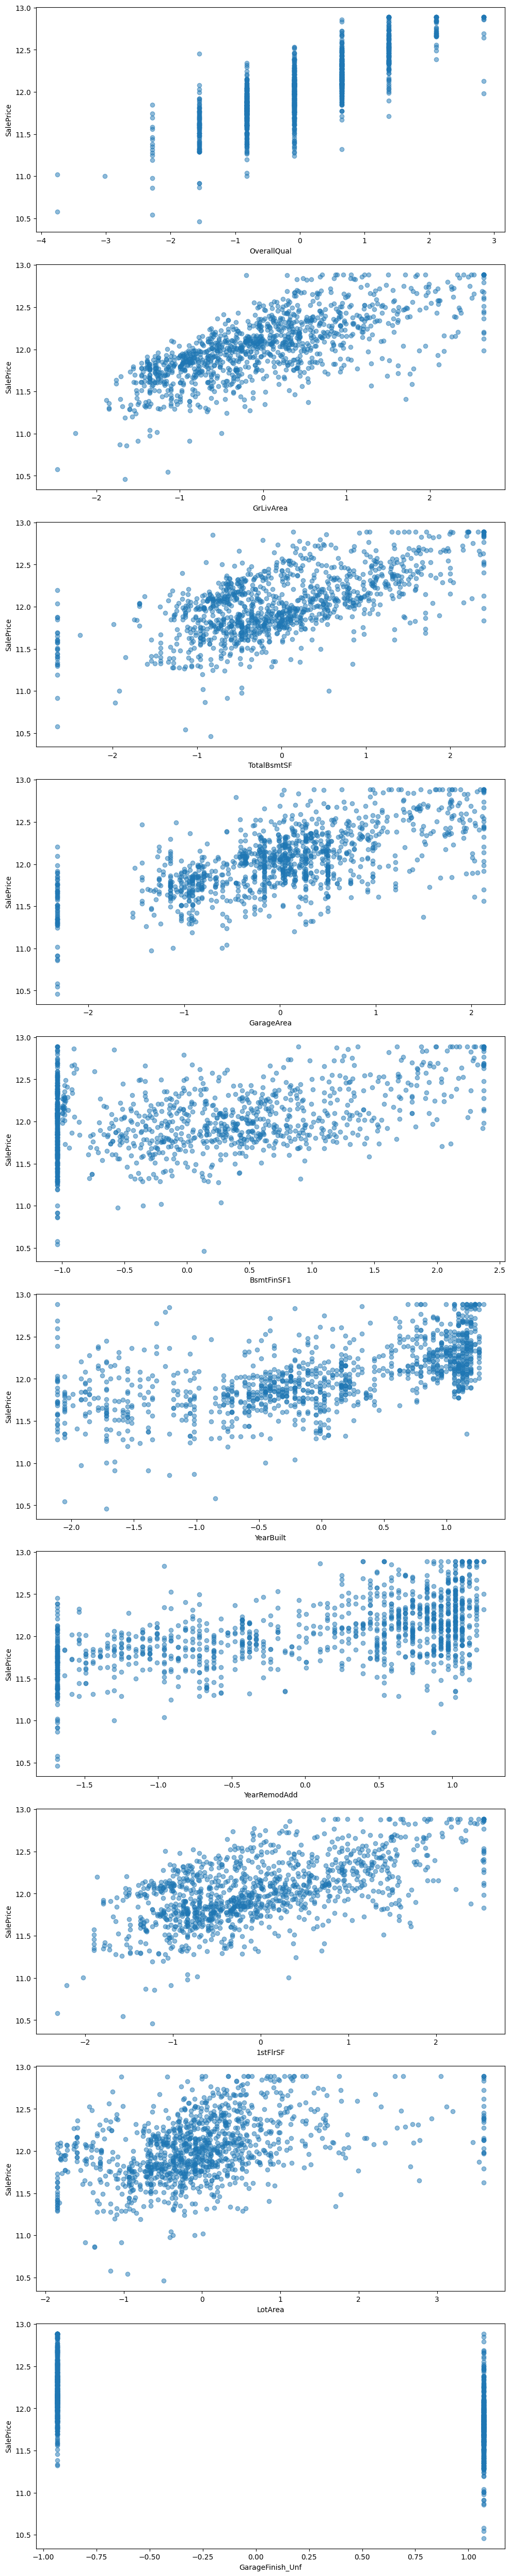

In [ ]:
# Reviewing if the features has linear relation with y-train
data = pd.concat([X_train_Top_features, y_train], axis=1)

# Get the number of features
num_features = len(X_train_Top_features.columns)

# Create subplots to plot each feature
fig, axes = plt.subplots(num_features, 1, figsize=(10, 5*num_features))

# Iterate through each feature and plot its relationship with the target variable
for i, feature in enumerate(X_train_Top_features.columns):
    ax = axes[i] if num_features > 1 else axes  # Adjusting for the case when there's only one feature
    ax.scatter(data[feature], data[y_train.name], alpha=0.5)
    ax.set_xlabel(feature)
    ax.set_ylabel(y_train.name)

plt.tight_layout()
plt.show()

In [ ]:
# Function for VIF Calculation

def calculateVIF(df):
    vif = pd.DataFrame()
    vif['Features'] = df.columns
    vif['VIF'] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif

Reviewing the Statistical Significance & multicollinarity

In [ ]:
import statsmodels.api as sm

# Add a constant
X_train_Top_features_sm = sm.add_constant(X_train_Top_features)

# Create a first fitted model
lr1 = sm.OLS(y_train, X_train_Top_features_sm).fit()

# Print a summary of the linear regression model obtained
print(lr1.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.860
Model:                            OLS   Adj. R-squared:                  0.859
Method:                 Least Squares   F-statistic:                     790.5
Date:                Tue, 19 Mar 2024   Prob (F-statistic):               0.00
Time:                        11:54:54   Log-Likelihood:                 614.95
No. Observations:                1168   AIC:                            -1210.
Df Residuals:                    1158   BIC:                            -1159.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               12.0275      0.004  

In [ ]:
#Drop the constant term
X_train_Top_features_sm.drop(['const'], axis=1, inplace=True)

In [ ]:
calculateVIF(X_train_Top_features_sm)

Features   VIF
0       OverallQual  2.66
5         YearBuilt  2.53
1         GrLivArea  1.96
2       TotalBsmtSF  1.85
8  GarageFinish_Unf  1.84
3        GarageArea  1.81
6      YearRemodAdd  1.75
7           LotArea  1.39
4        BsmtFinSF1  1.29

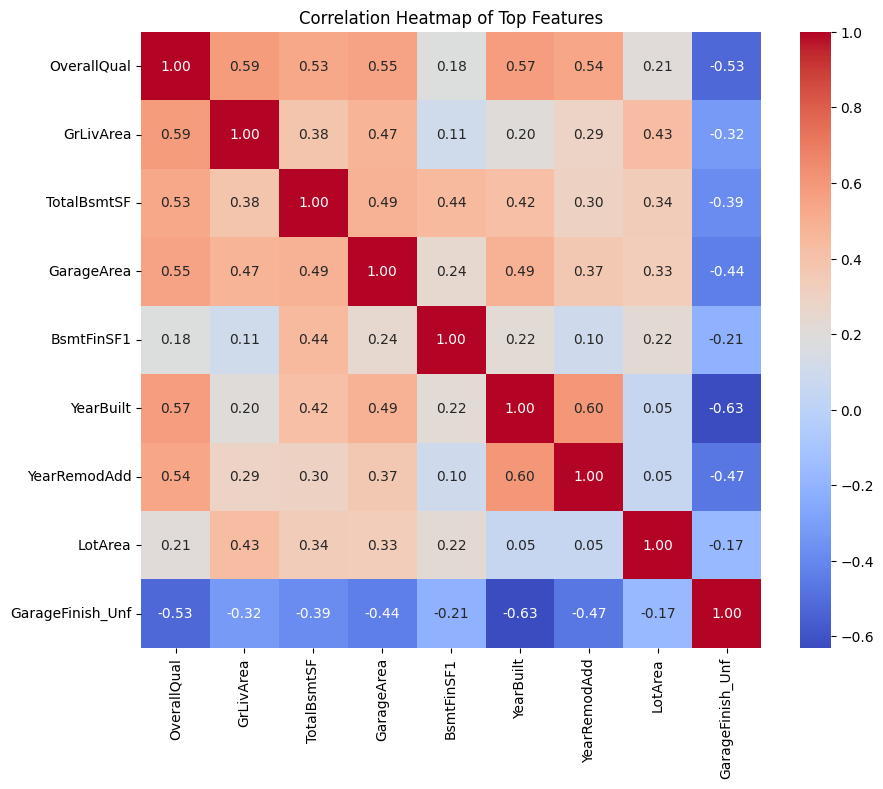

In [ ]:
# Compute the correlation matrix
corr = X_train_Top_features_sm.corr()

# Plot the correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 10})
plt.title('Correlation Heatmap of Top Features')
plt.show()

Insights : Removing the features based on the multicollinearity and statistical significance of the features

In [ ]:
X_train_Top_features.drop(['1stFlrSF'],axis=1,inplace=True)

<ipython-input-112-8384dbe5a89e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train_Top_features.drop(['1stFlrSF'],axis=1,inplace=True)


In [ ]:
X_test_Top_features = X_test_Top_features[X_train_Top_features.columns] # make sure that X test as same columns as X train

Assumptions of Linear Regression model

* Linear relation between independant and dependant features

* No multicollinearity

* Normal Residuals distribution

* Homoscedasticity - unform scatter spread of residuals  

* No auto-corelation between residuals

Condition number: 4.014159361694316
Anderson-Darling test statistic: 23.184686020606932
Anderson-Darling test p-value: 0.0


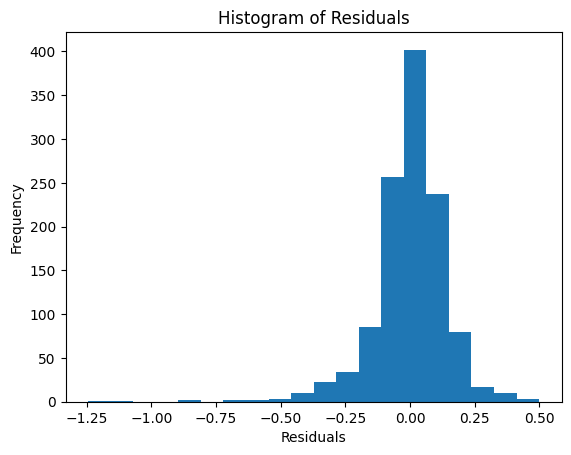

Breusch-Pagan test p-value: 6.113641927262158e-07
Goldfeld-Quandt test p-value: 0.9903562211181984
Durbin-Watson statistic: 1.9623908840320536


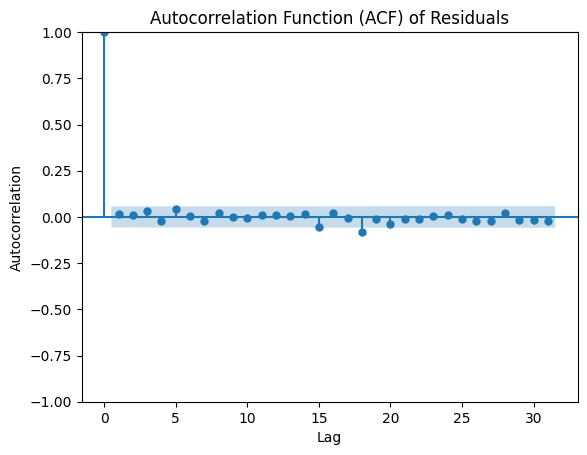

In [ ]:
from statsmodels.stats.diagnostic import het_breuschpagan, het_goldfeldquandt, normal_ad
from statsmodels.stats.stattools import durbin_watson
from statsmodels.graphics.tsaplots import plot_acf


# Assuming X_train_Top_features and y_train are already defined

# Step 1: Check for the linear relationship
# Fitting the OLS (Ordinary Least Squares) regression model
X = sm.add_constant(X_train_Top_features)
model = sm.OLS(y_train, X).fit()

# Step 2: Check for multicollinearity
corr_matrix = np.corrcoef(X_train_Top_features, rowvar=False)
eigenvalues, _ = np.linalg.eig(corr_matrix)
condition_number = np.sqrt(eigenvalues.max() / eigenvalues.min())
print("Condition number:", condition_number)

# Step 3: Check for normality of residuals
residuals = model.resid
ad_statistic, p_ad = normal_ad(residuals)
print("Anderson-Darling test statistic:", ad_statistic)
print("Anderson-Darling test p-value:", p_ad)
plt.hist(residuals, bins=20)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Histogram of Residuals')
plt.show()

# Step 4: Check for homoscedasticity
_, p_bp, _, _ = het_breuschpagan(residuals, X)
print("Breusch-Pagan test p-value:", p_bp)

_, p_gq, _ = het_goldfeldquandt(y_train, X)
print("Goldfeld-Quandt test p-value:", p_gq)

# Step 5: Check for autocorrelation between residuals
dw_statistic = durbin_watson(model.resid)
print("Durbin-Watson statistic:", dw_statistic)

# Plot autocorrelation function
plot_acf(model.resid)
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.title('Autocorrelation Function (ACF) of Residuals')
plt.show()


Parametric Model

Model 1 : **Linear Regression**

In [ ]:
from sklearn.linear_model import Ridge, Lasso, LinearRegression

lr= LinearRegression()

# Train the pipeline
lr_model = lr.fit(X_train_Top_features, y_train)

# Predict using the pipeline
y_pred_train_lr =  np.expm1(lr_model.predict(X_train_Top_features))
y_pred_test_lr =  np.expm1(lr_model.predict(X_test_Top_features))

In [ ]:
# Evaluate the pipeline
lr_mse_train = mean_squared_error(np.expm1(y_train), y_pred_train_lr)
lr_rmse_train = np.sqrt(lr_mse_train)
lr_r2_train = r2_score(np.expm1(y_train), y_pred_train_lr)
lr_mae_train = mean_absolute_error(np.expm1(y_train), y_pred_train_lr)


lr_mse_test = mean_squared_error(np.expm1(y_test), y_pred_test_lr)
lr_rmse_test = np.sqrt(lr_mse_test)
lr_r2_test = r2_score(np.expm1(y_test), y_pred_test_lr)
lr_mae_test = mean_absolute_error(np.expm1(y_test), y_pred_test_lr)

print("Linear Regression Pipeline Training Results:")
print("Mean Squared Error (MSE):", lr_mse_train)
print("Root Mean Squared Error (RMSE):", lr_rmse_train)
print("R-squared (R2) Score:", lr_r2_train)
print("Mean Absolute Error (MAE):", lr_mae_train)

print("\nLinear Regression Pipeline Test Results:")
print("Mean Squared Error (MSE):", lr_mse_test)
print("Root Mean Squared Error (RMSE):", lr_rmse_test)
print("R-squared (R2) Score:", lr_r2_test)
print("Mean Absolute Error (MAE):", lr_mae_test)

Linear Regression Pipeline Training Results:
Mean Squared Error (MSE): 810009125.3327085
Root Mean Squared Error (RMSE): 28460.659256818148
R-squared (R2) Score: 0.8401058567879929
Mean Absolute Error (MAE): 16728.68355229

Linear Regression Pipeline Test Results:
Mean Squared Error (MSE): 576765998.8176928
Root Mean Squared Error (RMSE): 24015.95300665149
R-squared (R2) Score: 0.8965135248180383
Mean Absolute Error (MAE): 16853.19065271876


Model 2 : **Ridge Regression**

In [ ]:
from sklearn.linear_model import Ridge


ridge_model = Ridge(alpha=0.1)

# Train the Ridge regression model
ridge_model.fit(X_train_Top_features, y_train)

# Predict on training and testing data
y_pred_train_ridge =  np.expm1(ridge_model.predict(X_train_Top_features))
y_pred_test_ridge =  np.expm1(ridge_model.predict(X_test_Top_features))

In [ ]:
# Evaluate the pipeline
ridge_mse_train = mean_squared_error(np.expm1(y_train), y_pred_train_ridge)
ridge_rmse_train = np.sqrt(ridge_mse_train)
ridge_r2_train = r2_score(np.expm1(y_train), y_pred_train_ridge)
ridge_mae_train = mean_absolute_error(np.expm1(y_train), y_pred_train_ridge)


ridge_mse_test = mean_squared_error(np.expm1(y_test), y_pred_test_ridge)
ridge_rmse_test = np.sqrt(ridge_mse_test)
ridge_r2_test = r2_score(np.expm1(y_test), y_pred_test_ridge)
ridge_mae_test = mean_absolute_error(np.expm1(y_test), y_pred_test_ridge)

print("Linear Regression Pipeline Training Results:")
print("Mean Squared Error (MSE):", ridge_mse_train)
print("Root Mean Squared Error (RMSE):", ridge_rmse_train)
print("R-squared (R2) Score:", ridge_r2_train)
print("Mean Absolute Error (MAE):", ridge_mae_train)

print("\nLinear Regression Pipeline Test Results:")
print("Mean Squared Error (MSE):", ridge_mse_test)
print("Root Mean Squared Error (RMSE):", ridge_rmse_test)
print("R-squared (R2) Score:", ridge_r2_test)
print("Mean Absolute Error (MAE):", ridge_mae_test)

Linear Regression Pipeline Training Results:
Mean Squared Error (MSE): 809982304.6696211
Root Mean Squared Error (RMSE): 28460.188064551174
R-squared (R2) Score: 0.8401111511319831
Mean Absolute Error (MAE): 16728.675093531354

Linear Regression Pipeline Test Results:
Mean Squared Error (MSE): 576744690.7294761
Root Mean Squared Error (RMSE): 24015.509378930026
R-squared (R2) Score: 0.8965173480304796
Mean Absolute Error (MAE): 16852.887949674416


Model 3 : **Lasso Regression**

In [ ]:
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler


lasso_model = Lasso(alpha=0.1)

# Train the Lasso regression model
lasso_model.fit(X_train_Top_features, y_train)

# Predict on training and testing data
y_pred_train_lasso = np.expm1(lasso_model.predict(X_train_Top_features))
y_pred_test_lasso =  np.expm1(lasso_model.predict(X_test_Top_features))

In [ ]:
# Evaluate the pipeline
ridge_mse_train = mean_squared_error(np.expm1(y_train), y_pred_train_lasso)
ridge_rmse_train = np.sqrt(ridge_mse_train)
ridge_r2_train = r2_score(np.expm1(y_train), y_pred_train_lasso)
ridge_mae_train = mean_absolute_error(np.expm1(y_train), y_pred_train_lasso)


ridge_mse_test = mean_squared_error(np.expm1(y_test), y_pred_test_lasso)
ridge_rmse_test = np.sqrt(ridge_mse_test)
ridge_r2_test = r2_score(np.expm1(y_test), y_pred_test_lasso)
ridge_mae_test = mean_absolute_error(np.expm1(y_test), y_pred_test_lasso)

print("Linear Regression Pipeline Training Results:")
print("Mean Squared Error (MSE):", ridge_mse_train)
print("Root Mean Squared Error (RMSE):", ridge_rmse_train)
print("R-squared (R2) Score:", ridge_r2_train)
print("Mean Absolute Error (MAE):", ridge_mae_train)

print("\nLinear Regression Pipeline Test Results:")
print("Mean Squared Error (MSE):", ridge_mse_test)
print("Root Mean Squared Error (RMSE):", ridge_rmse_test)
print("R-squared (R2) Score:", ridge_r2_test)
print("Mean Absolute Error (MAE):", ridge_mae_test)

Linear Regression Pipeline Training Results:
Mean Squared Error (MSE): 1619277957.765535
Root Mean Squared Error (RMSE): 40240.25295354808
R-squared (R2) Score: 0.6803578458790063
Mean Absolute Error (MAE): 28059.148423773

Linear Regression Pipeline Test Results:
Mean Squared Error (MSE): 1532081551.0846126
Root Mean Squared Error (RMSE): 39141.8133341394
R-squared (R2) Score: 0.7251056412165959
Mean Absolute Error (MAE): 28050.62988681196


Model 4 : **Artifical Neural Network**

In [ ]:
from sklearn.neural_network import MLPRegressor
from sklearn.pipeline import Pipeline

# Define additional parameters for MLPRegressor
mlp_params = {
    'hidden_layer_sizes': (512, 64),
    'max_iter': 500,
    'activation': 'relu',
    'solver': 'adam'
}
# Define the steps in the pipeline
steps = [
    ('mlp', MLPRegressor(**mlp_params))  # Define MLPRegressor with additional parameters
]

# Create the pipeline
ann_pipeline = Pipeline(steps)

# Train the pipeline (X_train_Top_50 and y_train are your training data)
ann_pipeline.fit(X_train_Top_features, y_train)

# Predict using the pipeline and inverse-transform the predictions
y_pred_train_ann = np.expm1(ann_pipeline.predict(X_train_Top_features))  # Predictions on the training set
y_pred_test_ann = np.expm1(ann_pipeline.predict(X_test_Top_features))    # Predictions on the test set

In [ ]:
# Evaluate the pipeline
ann_mse_train = mean_squared_error(np.expm1(y_train), y_pred_train_ann)
ann_rmse_train = np.sqrt(ann_mse_train)
ann_r2_train = r2_score(np.expm1(y_train), y_pred_train_ann)
ann_mae_train = mean_absolute_error(np.expm1(y_train), y_pred_train_ann)


ann_mse_test = mean_squared_error(np.expm1(y_test), y_pred_test_ann)
ann_rmse_test = np.sqrt(ann_mse_test)
ann_r2_test = r2_score(np.expm1(y_test), y_pred_test_ann)
ann_mae_test = mean_absolute_error(np.expm1(y_test), y_pred_test_ann)

print("ANN Pipeline Training Results:")
print("Mean Squared Error (MSE):", ann_mse_train)
print("Root Mean Squared Error (RMSE):", ann_rmse_train)
print("R-squared (R2) Score:", ann_r2_train)
print("Mean Absolute Error (MAE):", ann_mae_train)


print("\nANN Pipeline Test Results:")
print("Mean Squared Error (MSE):", ann_mse_test)
print("Root Mean Squared Error (RMSE):", ann_rmse_test)
print("R-squared (R2) Score:", ann_r2_test)
print("Mean Absolute Error (MAE):", ann_mae_test)

ANN Pipeline Training Results:
Mean Squared Error (MSE): 661813332.4072502
Root Mean Squared Error (RMSE): 25725.73288377321
R-squared (R2) Score: 0.8693594029473738
Mean Absolute Error (MAE): 17907.666158890996

ANN Pipeline Test Results:
Mean Squared Error (MSE): 2249803448.539585
Root Mean Squared Error (RMSE): 47432.093022969006
R-squared (R2) Score: 0.5963280962836786
Mean Absolute Error (MAE): 37285.364210068394


Parametric model Results : Linear Regression

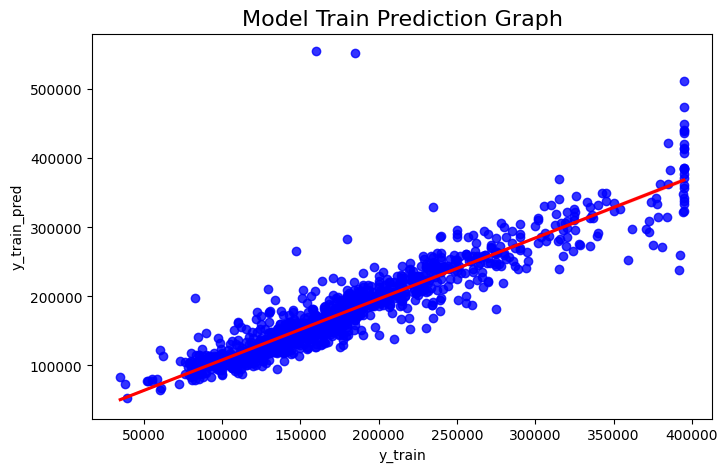

In [ ]:
#Regression plot
plt.figure(figsize=(8,5))
sns.regplot(x=np.expm1(y_train), y=y_pred_train_lr, ci=68, fit_reg=True,scatter_kws={"color": "blue"}, line_kws={"color": "red"})

plt.title('Model Train Prediction Graph', fontsize=16)
plt.xlabel('y_train', fontsize=10)
plt.ylabel('y_train_pred', fontsize=10)
plt.show()

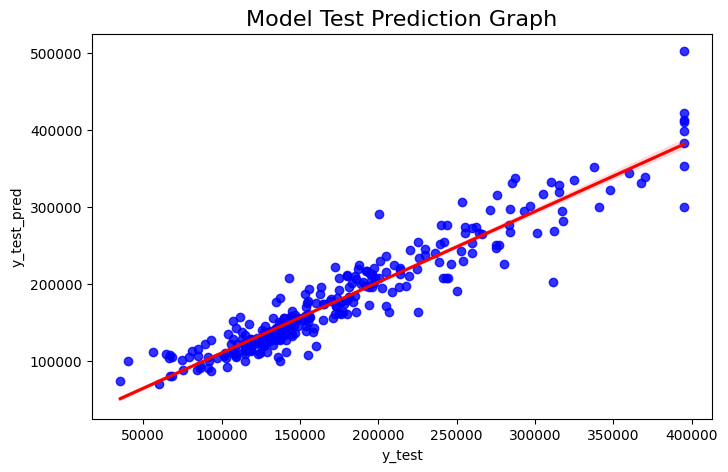

In [ ]:
#Regression plot
plt.figure(figsize=(8,5))
sns.regplot(x=np.expm1(y_test), y=y_pred_test_lr, ci=68, fit_reg=True,scatter_kws={"color": "blue"}, line_kws={"color": "red"})

plt.title('Model Test Prediction Graph', fontsize=16)
plt.xlabel('y_test', fontsize=10)
plt.ylabel('y_test_pred', fontsize=10)
plt.show()

Observation and Results:

Linear and Ridge Regression almost had similar predictions 84% r2 score in training and 89% r2 score in testing.

- While the model was expected to have an error of $16,728 from the actual value.

- Whereas the testing data shows an error of $16,853 from the actual value.
  
- Despite the errors, the results still seems significant especially considering the median house prices of approximately $163,000.

Future Scope to improve the model

- Outliers were eliminated by capping them at the lower and upper quantiles of 2% and 98% respectively. However, a more stringent outlier removal process would necessitate the specific business requirements.

- Bussiness understanding to perform feature engineering to add more relevant columns

Non - Parametric Models

Insights : The non parametric models are general robust to outliers, multicollinarity and the statistical significance of the feature however, the same data was continued to train the non-parametric models



Model 1 : **RandomForest Regressor**

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

# Define additional parameters for RandomForestRegressor for tuning
# Define the parameter grid to search
param_grid = {
    'tree_reg__n_estimators': [25, 50, 75,  100, 125, 150],
    'tree_reg__max_depth': [None, 1, 2, 3, 4],  # Set the max_depth parameter for the RandomForestRegressor
    'tree_reg__min_samples_split': [2, 4, 6, 8],
    'tree_reg__max_features': ["auto", "log2"]
}

# Create the RandomForestRegressor model with fixed parameters (criterion)
rf_regressor = RandomForestRegressor()  # or 'mae' if you prefer

# Define the steps in the pipeline
steps_tree = [
    ('tree_reg', rf_regressor)  # Define the tree-based regressor with fixed parameters
]

# Create the pipeline
tree_pipeline = Pipeline(steps_tree)

# Use GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(tree_pipeline, param_grid, cv=10, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train_Top_features, y_train)  # Fit the grid search to find the best parameters

# Get the best parameters found by GridSearchCV
best_params = grid_search.best_params_

# Train the pipeline with the best parameters
tree_pipeline.set_params(**best_params)
tree_pipeline.fit(X_train_Top_features, y_train)  # Already applied np.log1p to y_train

# Predict using the pipeline and inverse-transform the predictions
y_pred_train_tree = np.expm1(tree_pipeline.predict(X_train_Top_features))  # Predictions on the training set
y_pred_test_tree = np.expm1(tree_pipeline.predict(X_test_Top_features))    # Predictions on the test set

In [ ]:
best_params

{'tree_reg__max_depth': None,
 'tree_reg__max_features': 'log2',
 'tree_reg__min_samples_split': 2,
 'tree_reg__n_estimators': 150}

In [ ]:
# Evaluate the pipeline
tree_mse_train = mean_squared_error(np.expm1(y_train), y_pred_train_tree)
tree_rmse_train = np.sqrt(tree_mse_train)
tree_r2_train = r2_score(np.expm1(y_train), y_pred_train_tree)
tree_mae_train = mean_absolute_error(np.expm1(y_train), y_pred_train_tree)


tree_mse_test = mean_squared_error(np.expm1(y_test), y_pred_test_tree)
tree_rmse_test = np.sqrt(tree_mse_test)
tree_r2_test = r2_score(np.expm1(y_test), y_pred_test_tree)
tree_mae_test = mean_absolute_error(np.expm1(y_test), y_pred_test_tree)


print("Tree Regressor Pipeline Training Results:")
print("Mean Squared Error (MSE):", tree_mse_train)
print("Root Mean Squared Error (RMSE):", tree_rmse_train)
print("R-squared (R2) Score:", tree_r2_train)
print("Mean Absolute Error (MAE):", tree_mae_train)

print("\nTree Regressor Pipeline Test Results:")
print("Mean Squared Error (MSE):", tree_mse_test)
print("Root Mean Squared Error (RMSE):", tree_rmse_test)
print("R-squared (R2) Score:", tree_r2_test)
print("Mean Absolute Error (MAE):", tree_mae_test)

Tree Regressor Pipeline Training Results:
Mean Squared Error (MSE): 91512615.22717078
Root Mean Squared Error (RMSE): 9566.222620615245
R-squared (R2) Score: 0.9819355970849978
Mean Absolute Error (MAE): 6302.952529551379

Tree Regressor Pipeline Test Results:
Mean Squared Error (MSE): 551587409.8097817
Root Mean Squared Error (RMSE): 23485.898105241402
R-squared (R2) Score: 0.9010312034465033
Mean Absolute Error (MAE): 16778.261642755126




Model 2 :**XGBoost (Extreme Gradient Boosting)**

In [ ]:
import xgboost as xgb

# Define additional parameters for XGBoost for tuning
param_grid = {
    'xgb__n_estimators': [100, 200, 300],
    'xgb__max_depth': [1, 2, 3, 4, 5, 6, 7],
    'xgb__learning_rate': [0.001, 0.01, 0.1],
    'xgb__subsample': [0.6, 0.7, 0.8, 0.9],
    'xgb__colsample_bytree': [0.6, 0.7, 0.8, 0.9]
}

# Create the XGBRegressor model
xgb_regressor = xgb.XGBRegressor()

# Define the steps in the pipeline
steps_xgb = [
    ('xgb', xgb_regressor)
]

# Create the pipeline
xgb_pipeline = Pipeline(steps_xgb)

# Use GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(xgb_pipeline, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Get the best parameters found by GridSearchCV
best_params = grid_search.best_params_

# Train the pipeline with the best parameters
xgb_pipeline.set_params(**best_params)
xgb_pipeline.fit(X_train, y_train)

# Predict using the pipeline and inverse-transform the predictions
y_pred_train_xgb = np.expm1(xgb_pipeline.predict(X_train))
y_pred_test_xgb = np.expm1(xgb_pipeline.predict(X_test))

In [ ]:
best_params

{'xgb__colsample_bytree': 0.6,
 'xgb__learning_rate': 0.1,
 'xgb__max_depth': 4,
 'xgb__n_estimators': 100,
 'xgb__subsample': 0.9}

In [ ]:
# Evaluate the pipeline
xgb_mse_train = mean_squared_error(np.expm1(y_train), y_pred_train_xgb)
xgb_rmse_train = np.sqrt(xgb_mse_train)
xgb_r2_train = r2_score(np.expm1(y_train), y_pred_train_xgb)
xgb_mae_train = mean_absolute_error(np.expm1(y_train), y_pred_train_xgb)


xgb_mse_test = mean_squared_error(np.expm1(y_test), y_pred_test_xgb)
xgb_rmse_test = np.sqrt(xgb_mse_test)
xgb_r2_test = r2_score(np.expm1(y_test), y_pred_test_xgb)
xgb_mae_test = mean_absolute_error(np.expm1(y_test), y_pred_test_xgb)


print("xgb Regressor Pipeline Training Results:")
print("Mean Squared Error (MSE):", xgb_mse_train)
print("Root Mean Squared Error (RMSE):", xgb_rmse_train)
print("R-squared (R2) Score:", xgb_r2_train)
print("Mean Absolute Error (MAE):", xgb_mae_train)

print("\nxgb Regressor Pipeline Test Results:")
print("Mean Squared Error (MSE):", xgb_mse_test)
print("Root Mean Squared Error (RMSE):", xgb_rmse_test)
print("R-squared (R2) Score:", xgb_r2_test)
print("Mean Absolute Error (MAE):", xgb_mae_test)

xgb Regressor Pipeline Training Results:
Mean Squared Error (MSE): 167836299.71343613
Root Mean Squared Error (RMSE): 12955.164982100232
R-squared (R2) Score: 0.9668694580057593
Mean Absolute Error (MAE): 9062.82427185895

xgb Regressor Pipeline Test Results:
Mean Squared Error (MSE): 530705250.70175475
Root Mean Squared Error (RMSE): 23037.04084082317
R-squared (R2) Score: 0.9047779933833382
Mean Absolute Error (MAE): 16682.84000642123


Model 1 : Random Forest Regressor model Results

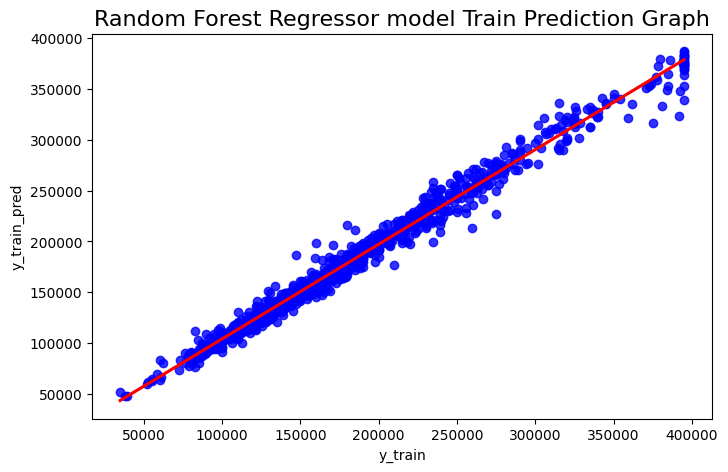

In [ ]:
#Regression plot
plt.figure(figsize=(8,5))
sns.regplot(x=np.expm1(y_train), y=y_pred_train_tree, ci=68, fit_reg=True,scatter_kws={"color": "blue"}, line_kws={"color": "red"})

plt.title('Random Forest Regressor model Train Prediction Graph', fontsize=16)
plt.xlabel('y_train', fontsize=10)
plt.ylabel('y_train_pred', fontsize=10)
plt.show()

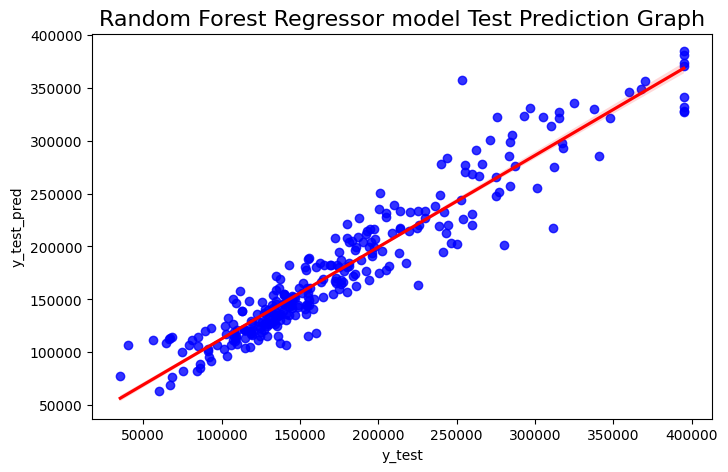

In [ ]:
#Regression plot
plt.figure(figsize=(8,5))
sns.regplot(x=np.expm1(y_test), y=y_pred_test_tree, ci=68, fit_reg=True,scatter_kws={"color": "blue"}, line_kws={"color": "red"})

plt.title('Random Forest Regressor model Test Prediction Graph', fontsize=16)
plt.xlabel('y_test', fontsize=10)
plt.ylabel('y_test_pred', fontsize=10)
plt.show()

Model 2 : XGBoost (Extreme Gradient Boosting) model Results

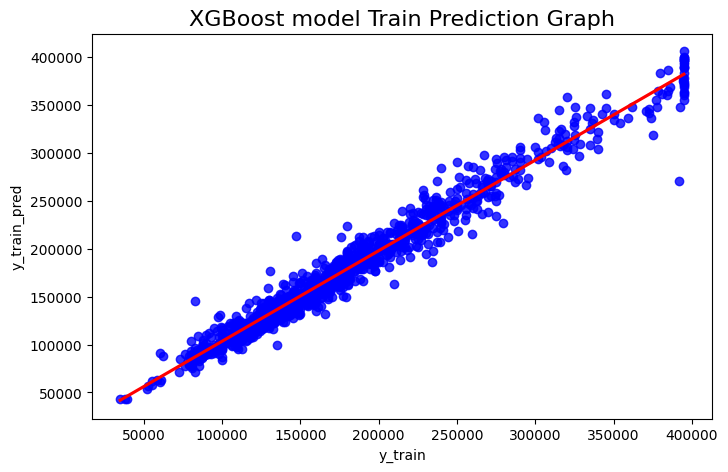

In [ ]:
#Regression plot
plt.figure(figsize=(8,5))
sns.regplot(x=np.expm1(y_train), y=y_pred_train_xgb, ci=68, fit_reg=True,scatter_kws={"color": "blue"}, line_kws={"color": "red"})

plt.title('XGBoost model Train Prediction Graph', fontsize=16)
plt.xlabel('y_train', fontsize=10)
plt.ylabel('y_train_pred', fontsize=10)
plt.show()

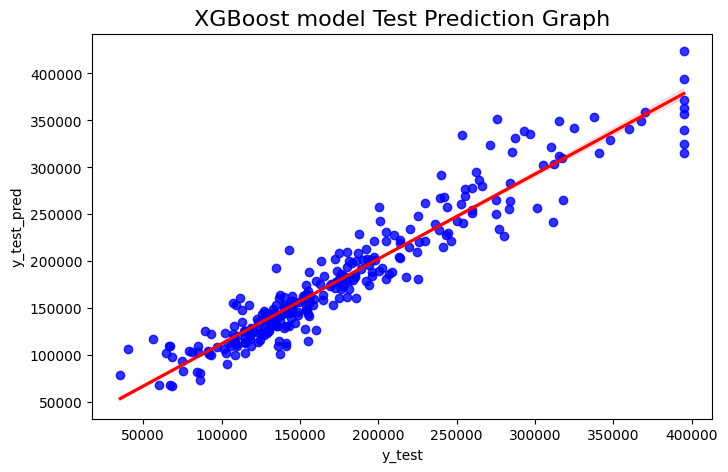

In [ ]:
#Regression plot
plt.figure(figsize=(8,5))
sns.regplot(x=np.expm1(y_test), y=y_pred_test_xgb, ci=68, fit_reg=True,scatter_kws={"color": "blue"}, line_kws={"color": "red"})

plt.title('XGBoost model Test Prediction Graph', fontsize=16)
plt.xlabel('y_test', fontsize=10)
plt.ylabel('y_test_pred', fontsize=10)
plt.show()

In [ ]:
df['SalePrice'].median()

163000.0

Results and Observation:

Random Forest Regressor and XGBoost had better predictability, the XGB model exhibits 96% r2 score on the training data and 90% r2 score on the testing data, indicating certain overfitting.

The models wasn't excessively tuned to learn up the data noise for overfitting, however the dataset's limited size of 1,168 rows made it unsuitable for training a non-parametric model.

- The model was expected to have an error of $9,062 from the actual value.

- Whereas the testing data shows an error of $16,682 from the actual value.
  
- Despite the errors, the results still seems significant especially considering the median house prices of approximately $163,000.

Future Scope to improve the model

- Training the model on more data records.

- Bussiness understanding to perform feature engineering to add more relevant columns